In [1]:
# I used this notebook to generate images for this blog post:
# https://medium.com/swlh/visualizing-the-geometric-and-harmonic-means-e8b9c5a818ae

In [2]:
from itertools import chain, repeat
import re
from math import floor, tan, pi
import os
import glob

import numpy as np
from scipy.stats import hmean
from matplotlib import rcParams, colors, pyplot as plt
import imageio
import tqdm

In [3]:
for subdir in (
    'special_case_plots',
    'animation_frame_plots',
    'animations'
):
    if not os.path.exists(subdir):
        os.mkdir(subdir)

In [4]:
def values_grid(funk, range):
    '''Returns a 2D grid of values from given function when fed all 2-tuples of numbers in given range'''
    x_vals, y_vals = list(range), list(range)

    grid = []
    for x in x_vals:
        row = []
        for y in y_vals:
            row.append(funk(x, y))
        grid.append(row)
    return grid

In [5]:
# 
def plot_funk(
    funk,
    _range=np.arange(10**-4, 4, 0.01),
    p_label='',
    continuous=False,
    all_ticks=False,
    save_file=False    
):
    '''
        Plots the result of a function taking two numerical arguments.
        x and y are the two arguments, the color is the result (lighter is higher).
    '''
    values = values_grid(funk, _range)
    
    rcParams['figure.dpi'] = 80
    rcParams['font.family'] = 'sans-serif'
    figure, ax = plt.subplots(figsize=(6, 4.8))
    plt.subplots_adjust(top=1, bottom=0, left=0.15, right=0.95)
    if continuous:
        kwargs= {
            'cmap': 'gray'
        }
    else:
        kwargs= {
            'cmap': 'gray',
            'norm': colors.BoundaryNorm(
                boundaries=np.arange(-0.125, 4.25, 0.25),
                ncolors=250
            )
        }

    im = plt.imshow(values, **kwargs)
    ax.invert_yaxis()
    if all_ticks and not continuous:
        cbar = plt.colorbar(
            fraction=0.03,
            aspect=24,
            pad=0.1
        )
    else:
        cbar = plt.colorbar(
            fraction=0.03,
            aspect=12,
            pad=0.1
        )
    ax.tick_params(axis='x', labelsize=14, width=1, length=5, pad=6)
    ax.tick_params(axis='y', labelsize=14, width=1, length=4.5, pad=4)
    if all_ticks:
        ax.set_xticks(np.arange(0, 5) * 100)
        ax.set_yticks(np.arange(0, 5) * 100)
        ax.set_xticklabels(range(0, 5), rotation=0)
        ax.set_yticklabels(range(0, 5))
        if continuous:
            cbar.set_ticks([0, 1, 2, 3, 3.99])
            cbar.ax.set_yticklabels(range(0, 5))
        else:
            cbar.set_ticks(np.arange(0, 4.25, 0.25))
            cbar.ax.set_yticklabels(np.arange(0, 4.25, 0.25))
    else:
        ax.set_xticks([-0.5, 400]) # set ticks to zero instead of middle of first color square
        ax.set_yticks([-0.5, 400])
        ax.set_xticklabels(['0', ''], rotation=0)
        ax.set_yticklabels(['0', ''])
        ax.figure.text(0.107, 0.922, '𝑥', family='serif', fontsize=16) # hack in tick labels in different font
        ax.figure.text(0.838, 0.01, '𝑥', family='serif', fontsize=16) # "
        cbar.set_ticks([0, 4])
        cbar.ax.set_yticklabels(['0', ''], fontsize=14)
        ax.figure.text(0.965, 0.655, '𝑥', family='serif', fontsize=16) # hack in colorbar labels in different font

    ax.figure.text(0.17, 0.95, p_label, family='monospace', fontsize=18) # label with p value
    if save_file:
        ax.figure.savefig(save_file, transparent=True)
    plt.show()
    plt.close(figure)

In [6]:
def arithmetic_mean(a, b):
    return (a + b) / 2

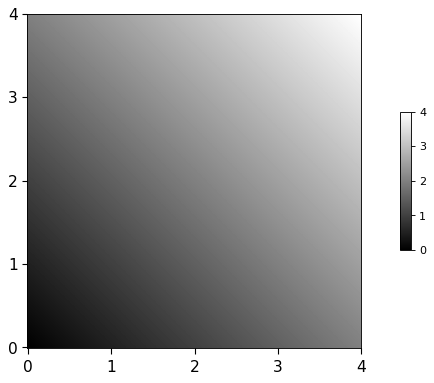

In [7]:
plot_funk(
    arithmetic_mean,
    continuous=True,
    all_ticks=True,
    save_file='special_case_plots/continuous_all_labels.png'
)

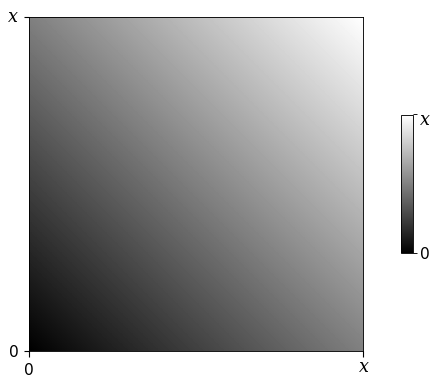

In [8]:
plot_funk(
    arithmetic_mean,
    continuous=True,
    save_file='special_case_plots/continuous_one_label.png'
)

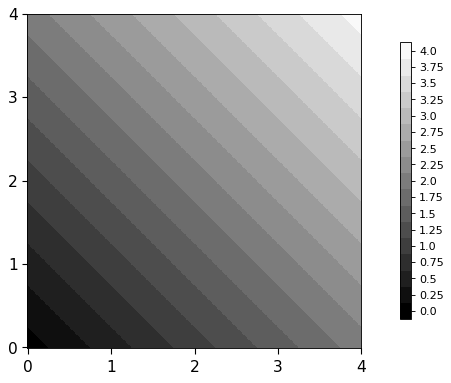

In [9]:
plot_funk(
    arithmetic_mean,
    all_ticks=True,
    save_file='special_case_plots/all_labels.png'
)

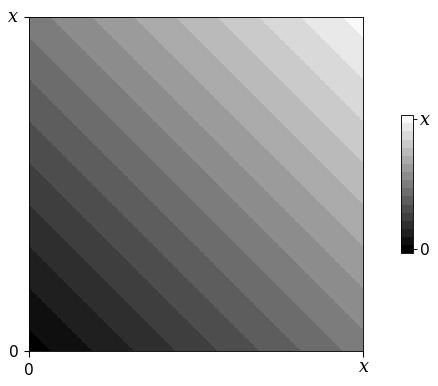

In [10]:
plot_funk(
    arithmetic_mean,
    save_file='special_case_plots/arithmetic_mean.png'
)

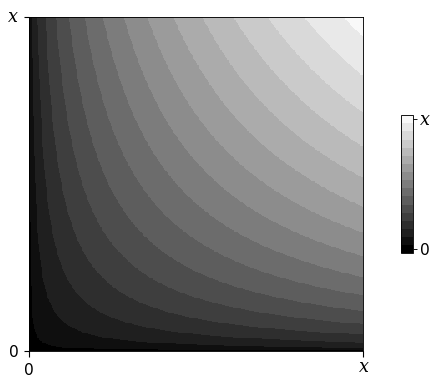

In [11]:
def geometric_mean(a, b):
#     return (a * b)**2 # not working
    tiny = 10**-10
    huge = 1/tiny
    return ((a**tiny + b**tiny) / 2)**(huge) # approximation

plot_funk(
    geometric_mean,
    save_file='special_case_plots/geometric_mean.png'
)

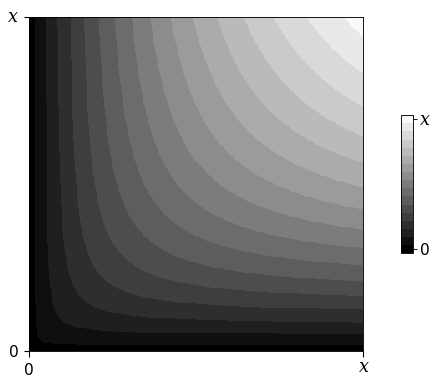

In [12]:
def harmonic_mean(a, b):
    return hmean([a, b])

plot_funk(
    harmonic_mean,
    save_file='special_case_plots/harmonic_mean.png'
)

In [13]:
def create_p_mean(p):
    def p_mean(a, b):
        return ((a**p + b**p)/2)**(1/p)
    return p_mean

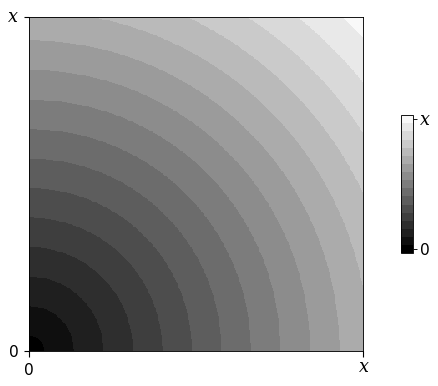

In [14]:
# quadratic mean
plot_funk(
    create_p_mean(2),
    save_file='special_case_plots/quadratic_mean.png'
)

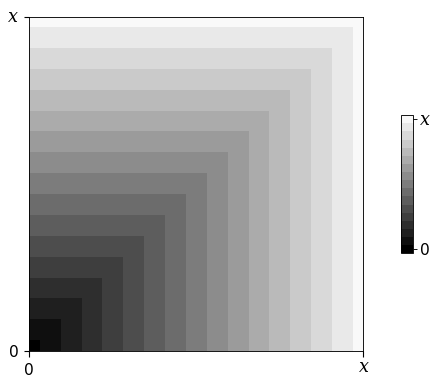

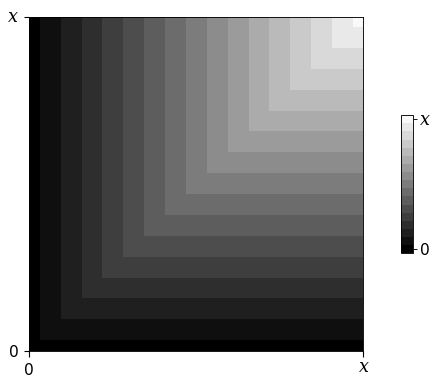

In [15]:
plot_funk(
    max,
    save_file=f'special_case_plots/pos_infinity.png'
)

plot_funk(
    min,
    save_file=f'special_case_plots/neg_infinity.png'
)


In [16]:
# create animations
# 'ps' = plural of p, value defining a mean

In [17]:
WHOLE_RANGE_PS = [
    tan(pi * 10**-2 * 2**-1 * 0.6 * x)**2 * abs(x)/x * 2**3 + 1
    for x
    in np.arange(-151, 153, 2)    
]

# animations names and frames' p values
# p must never be zero
ANIMATIONS = {
    'pos_one_to_neg_one': {
        'frame_ps': np.arange(-1, 1 + 2/99, 2/99)[::-1],
        'durations': list(chain(
            [1/2],
            repeat(
                1/60,
                len(np.arange(-1, 1 + 2/99, 2/99)) - 2
            ),
            [1/2]
        ))
    },
    'neg_one_to_neg_inf': {
        'frame_ps': [
            -(x**3 / (2**15)) - 1
            for x
            in np.arange(0, 120)
        ],
        'durations': list(chain(
            [1/2],
            repeat(
                1/60,
                len(np.arange(0, 120)) - 1
            )
        ))
    },
    'pos_one_to_two': {
        'frame_ps': np.arange(1, 2.008, 0.008),
        'durations': list(chain(
            [1/2],
            repeat(
                1/60,
                len(np.arange(1, 2.008, 0.008)) - 3
            ),
            [1/2]
        ))
    },
    'two_to_pos_inf': {
        'frame_ps': [
            (x**3 / (2**15)) + 2
            for x
            in np.arange(0, 120)
        ],
        'durations': list(chain(
            [1/2],
            repeat(
                1/60,
                len(np.arange(0, 120)) - 1
            )
        ))
    },
    'all': {
        'frame_ps': WHOLE_RANGE_PS + WHOLE_RANGE_PS[-2:0:-1], # loop it
        'durations': list(repeat(
            1/60,
            len(WHOLE_RANGE_PS) * 2 - 2
        ))
    }
}

In [18]:
# plot frames across p

([], <a list of 0 Text xticklabel objects>)

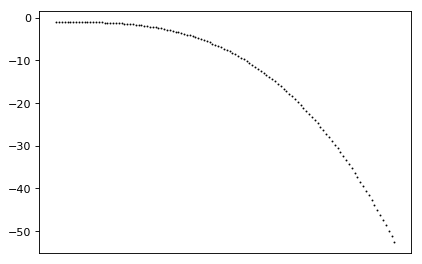

In [19]:
fig = plt.scatter(
    range(0, len(ANIMATIONS['neg_one_to_neg_inf']['frame_ps'])),
    ANIMATIONS['neg_one_to_neg_inf']['frame_ps'],
    color='black',
    s=1/2
)
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

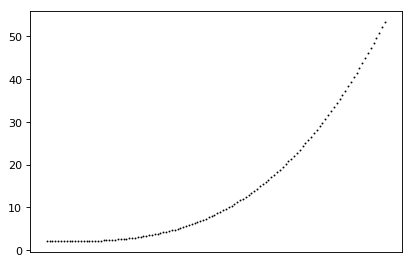

In [20]:
fig = plt.scatter(
    range(0, len(ANIMATIONS['two_to_pos_inf']['frame_ps'])),
    ANIMATIONS['two_to_pos_inf']['frame_ps'],
    color='black',
    s=1/2
)
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

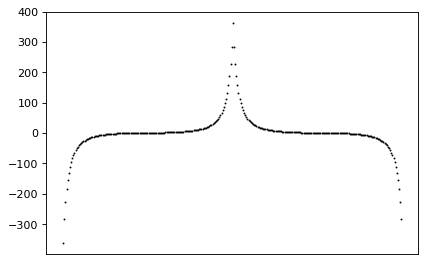

In [21]:
fig = plt.scatter(
    range(0, len(ANIMATIONS['all']['frame_ps'])),
    ANIMATIONS['all']['frame_ps'],
    color='black',
    s=1/2
)
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

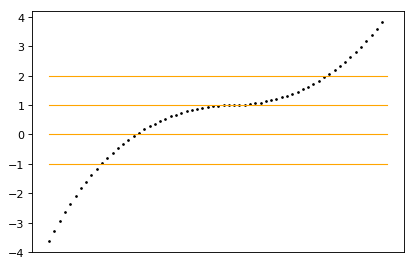

In [22]:
# zoom
small_ps = [p for p in WHOLE_RANGE_PS if abs(p) < 4]
plt.scatter(
    range(0, len(small_ps)),
    small_ps,
    color='black',
    s=2
)
plt.plot([0, len(small_ps)], [2, 2], c='orange', lw=1)
plt.plot([0, len(small_ps)], [1, 1], c='orange', lw=1)
plt.plot([0, len(small_ps)], [0, 0], c='orange', lw=1)
plt.plot([0, len(small_ps)], [-1, -1], c='orange', lw=1)
plt.xticks([])

In [23]:
def frame_file(p):
    without_decimal = re.sub('\.', '_', '{0:+.6f}'.format(p))
    return f'animation_frame_plots/{without_decimal}.png'

def generate_frames(ps):
    for p_ind, p in enumerate(ps):
        one_decimal = '{0:+.1f}'.format(p)
        plot_funk(
            create_p_mean(p),
            p_label=f'p = {one_decimal}',
            save_file=frame_file(p)
        )


  0%|          | 0/617 [00:00<?, ?it/s]

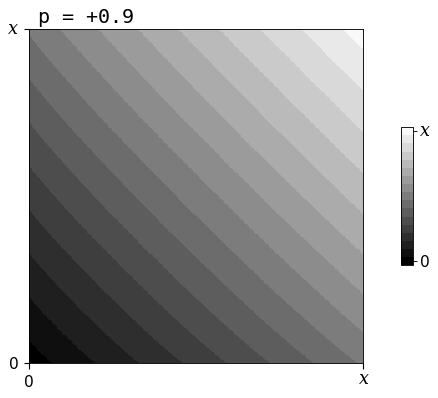


  0%|          | 1/617 [00:00<04:59,  2.06it/s]

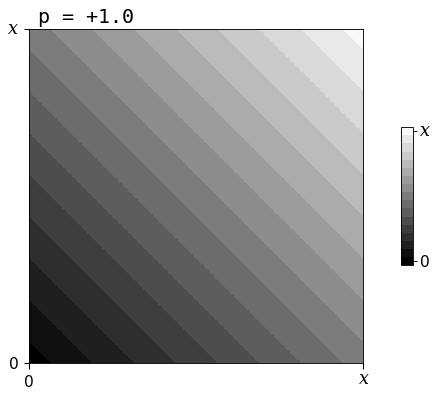


  0%|          | 2/617 [00:00<04:57,  2.07it/s]

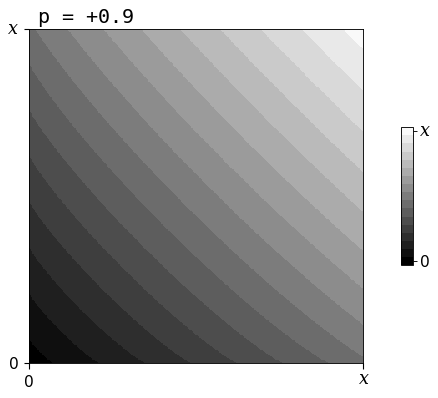


  0%|          | 3/617 [00:01<04:56,  2.07it/s]

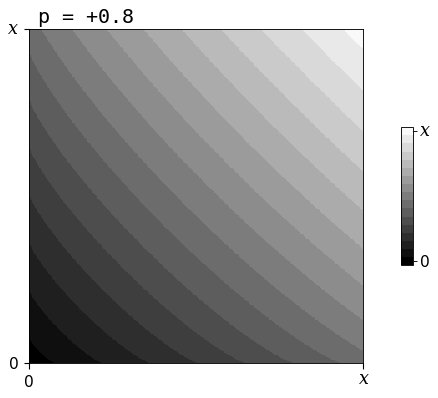


  1%|          | 4/617 [00:01<04:55,  2.08it/s]

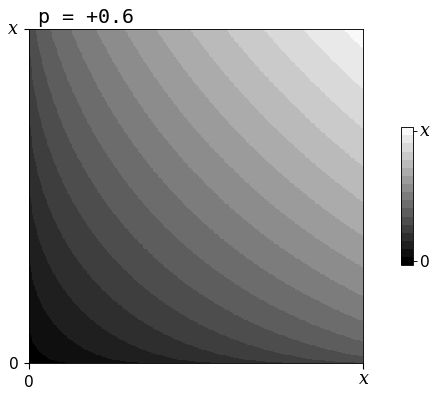


  1%|          | 5/617 [00:02<04:56,  2.06it/s]

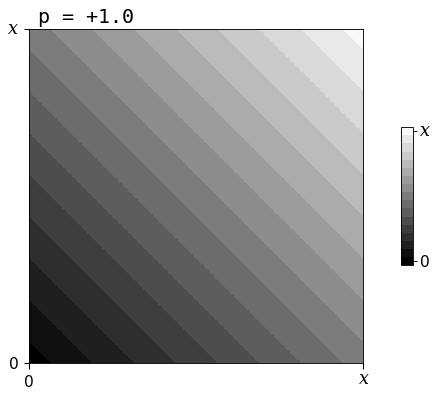


  1%|          | 6/617 [00:02<04:57,  2.06it/s]

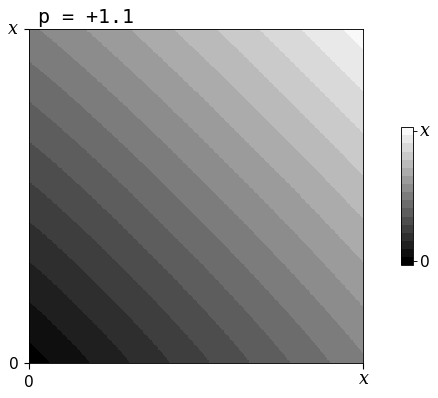


  1%|          | 7/617 [00:03<04:56,  2.06it/s]

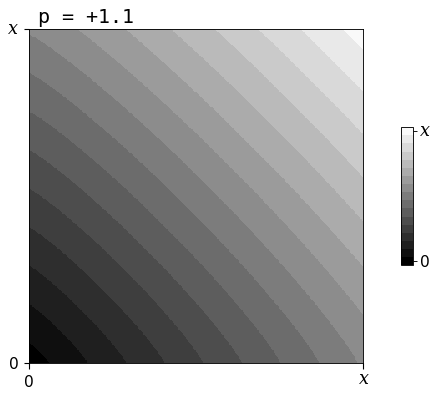


  1%|▏         | 8/617 [00:03<05:00,  2.02it/s]

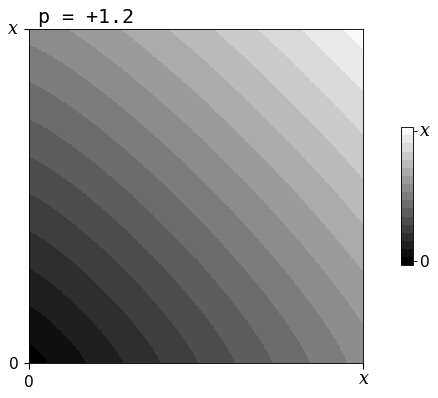


  1%|▏         | 9/617 [00:04<04:55,  2.05it/s]

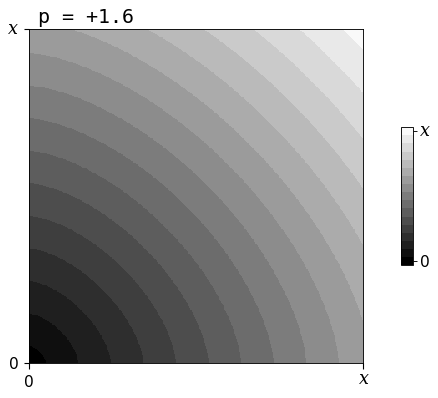


  2%|▏         | 10/617 [00:04<04:50,  2.09it/s]

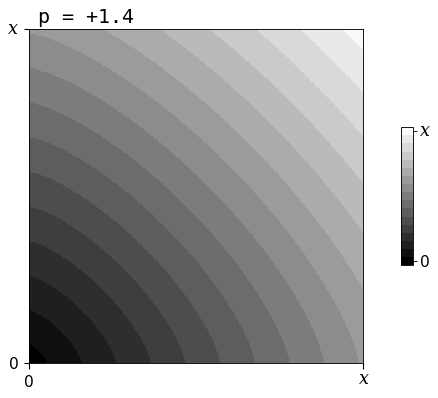


  2%|▏         | 11/617 [00:05<04:48,  2.10it/s]

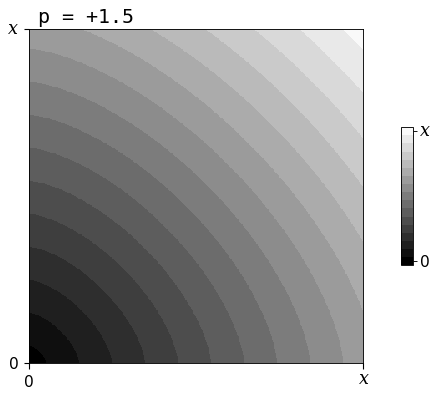


  2%|▏         | 12/617 [00:05<04:46,  2.11it/s]

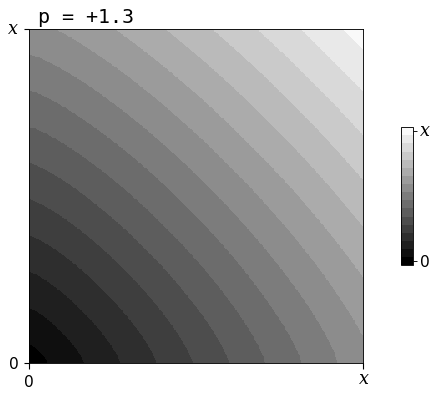


  2%|▏         | 13/617 [00:06<04:44,  2.12it/s]

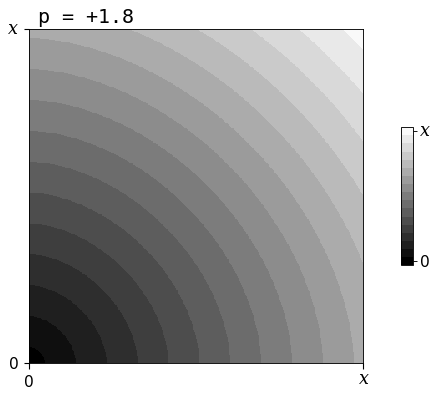


  2%|▏         | 14/617 [00:06<04:43,  2.13it/s]

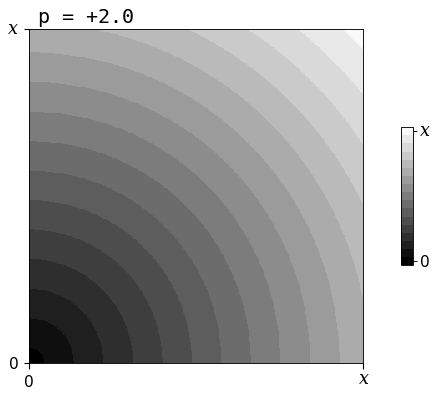


  2%|▏         | 15/617 [00:07<04:42,  2.13it/s]

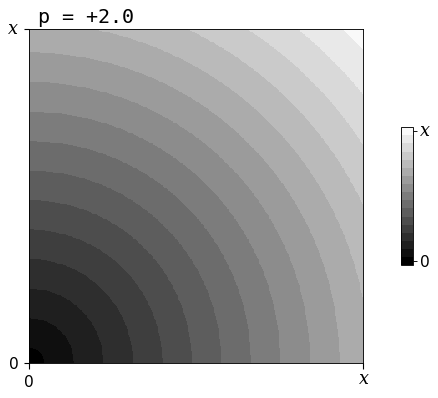


  3%|▎         | 16/617 [00:07<04:41,  2.13it/s]

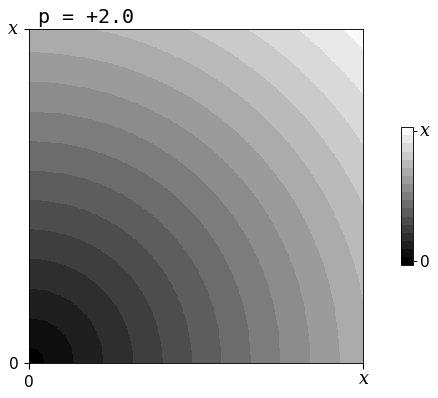


  3%|▎         | 17/617 [00:08<04:41,  2.13it/s]

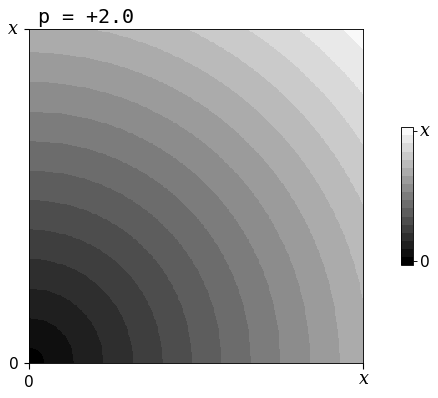


  3%|▎         | 18/617 [00:08<04:40,  2.14it/s]

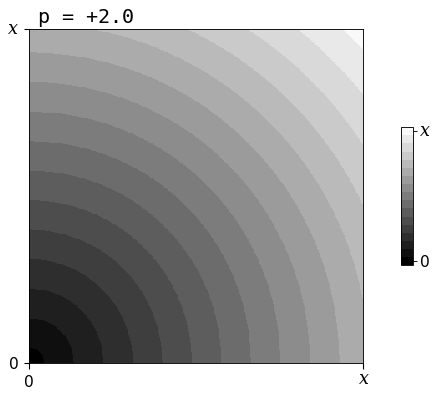


  3%|▎         | 19/617 [00:09<04:48,  2.08it/s]

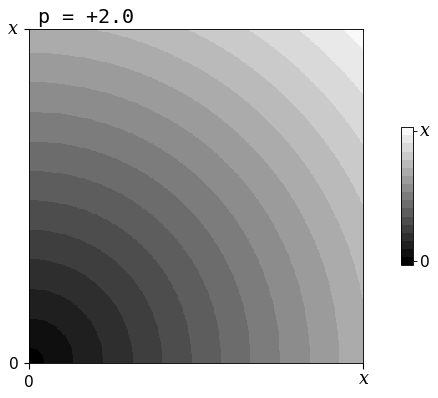


  3%|▎         | 20/617 [00:09<04:43,  2.10it/s]

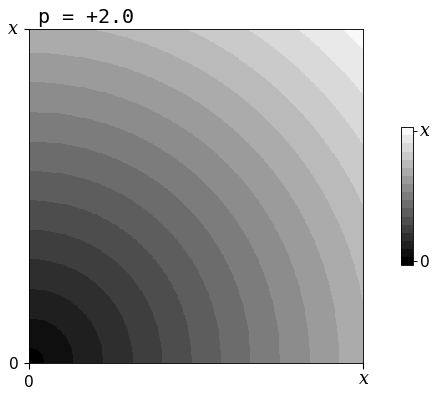


  3%|▎         | 21/617 [00:10<04:42,  2.11it/s]

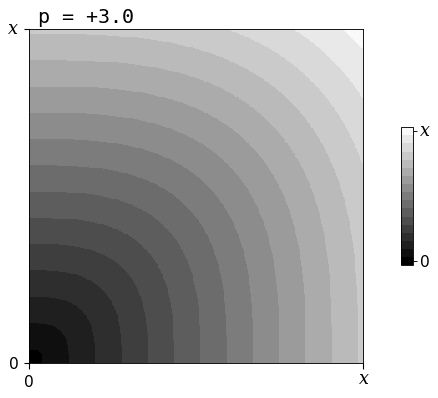


  4%|▎         | 22/617 [00:10<04:40,  2.12it/s]

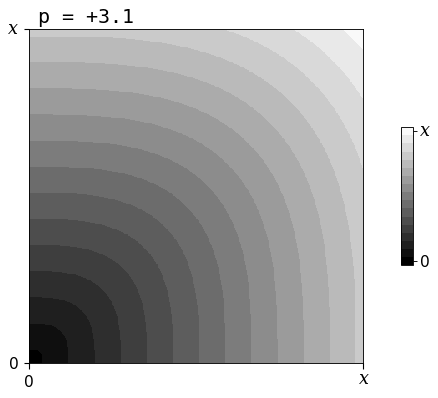


  4%|▎         | 23/617 [00:10<04:39,  2.12it/s]

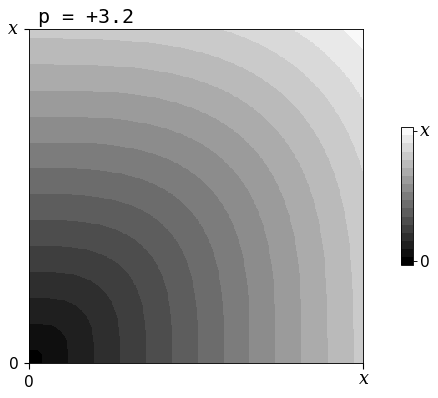


  4%|▍         | 24/617 [00:11<04:38,  2.13it/s]

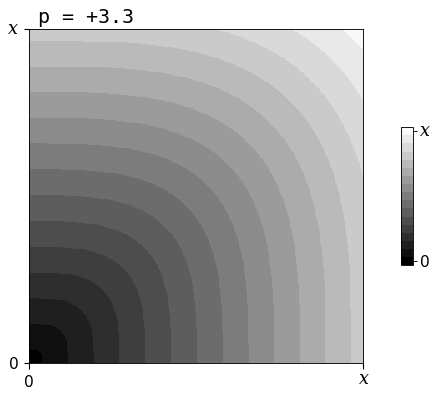


  4%|▍         | 25/617 [00:11<04:38,  2.12it/s]

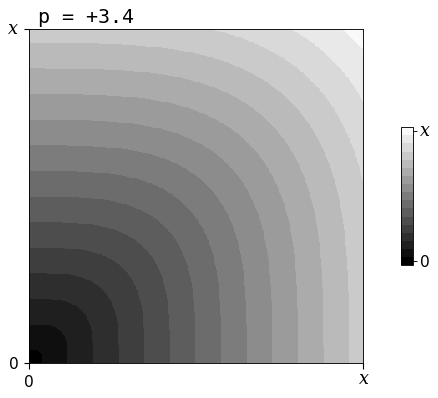


  4%|▍         | 26/617 [00:12<04:37,  2.13it/s]

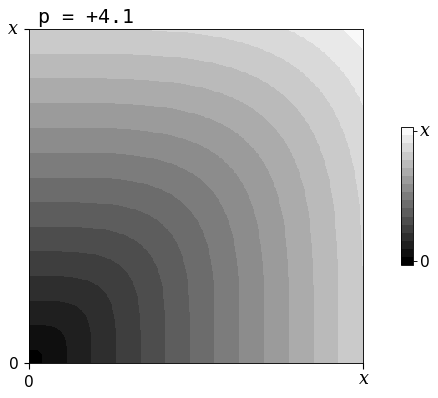


  4%|▍         | 27/617 [00:12<04:36,  2.13it/s]

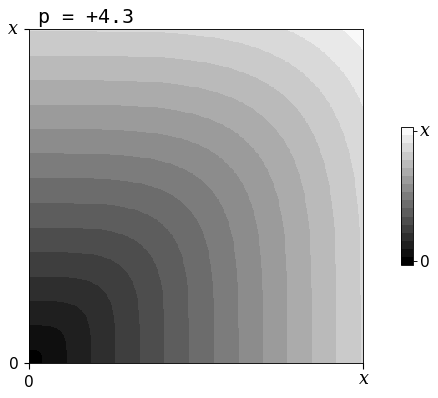


  5%|▍         | 28/617 [00:13<04:36,  2.13it/s]

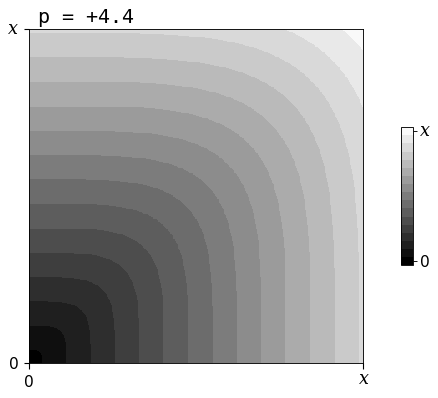


  5%|▍         | 29/617 [00:13<04:35,  2.14it/s]

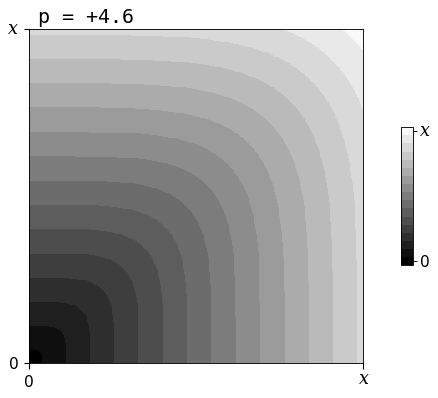


  5%|▍         | 30/617 [00:14<04:44,  2.06it/s]

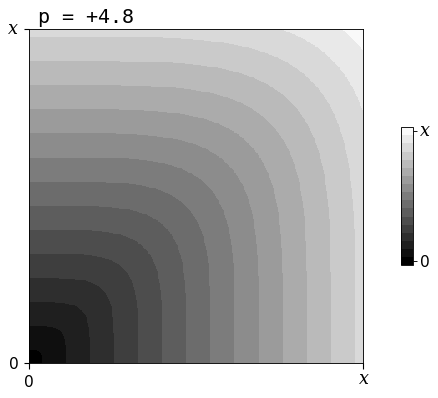


  5%|▌         | 31/617 [00:14<04:41,  2.08it/s]

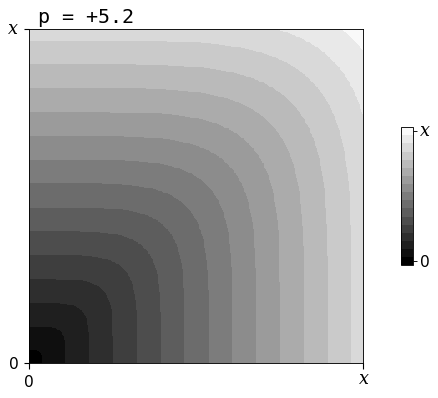


  5%|▌         | 32/617 [00:15<04:38,  2.10it/s]

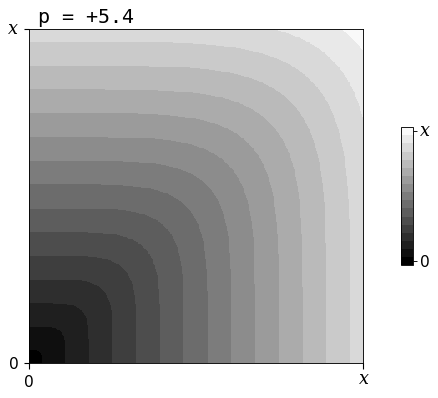


  5%|▌         | 33/617 [00:15<04:35,  2.12it/s]

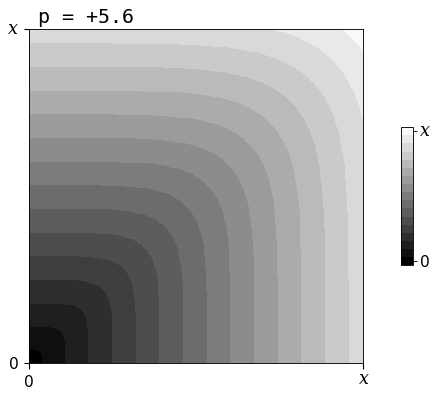


  6%|▌         | 34/617 [00:16<04:34,  2.12it/s]

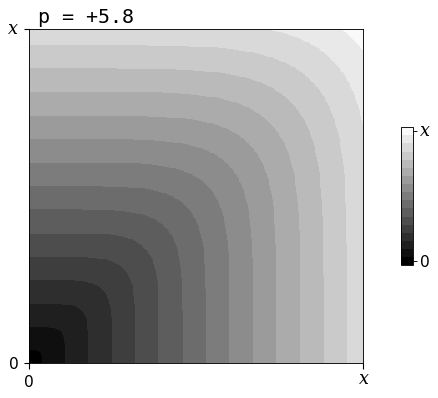


  6%|▌         | 35/617 [00:16<04:32,  2.13it/s]

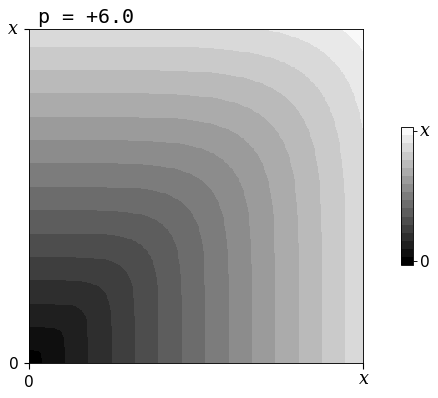


  6%|▌         | 36/617 [00:17<04:32,  2.14it/s]

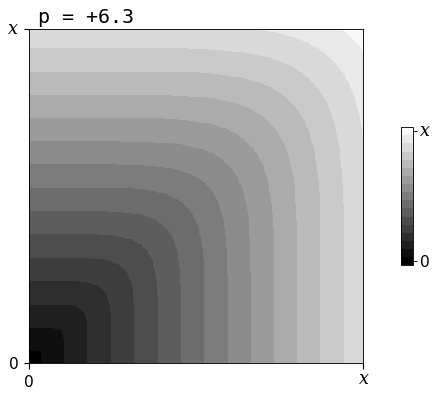


  6%|▌         | 37/617 [00:17<04:32,  2.13it/s]

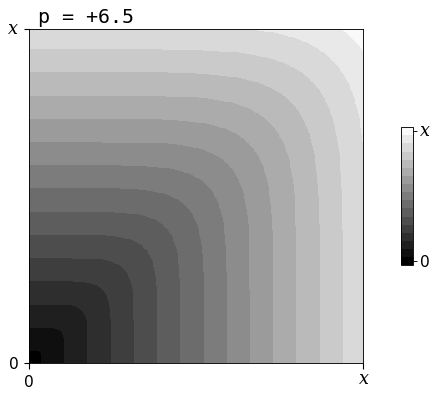


  6%|▌         | 38/617 [00:18<04:31,  2.13it/s]

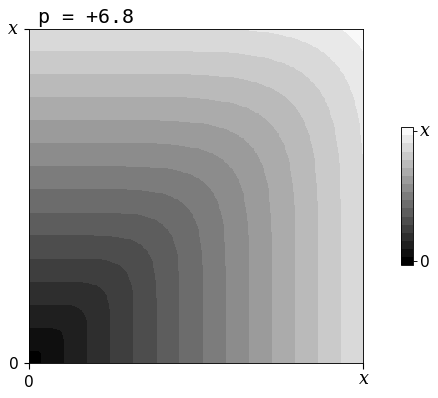


  6%|▋         | 39/617 [00:18<04:30,  2.14it/s]

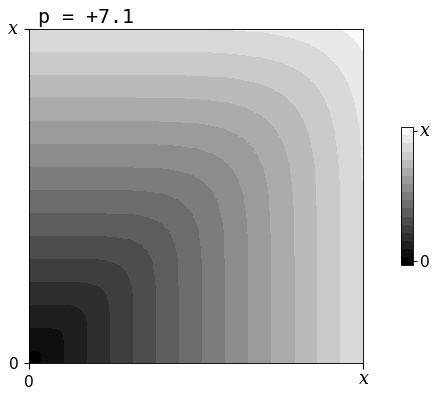


  6%|▋         | 40/617 [00:18<04:29,  2.14it/s]

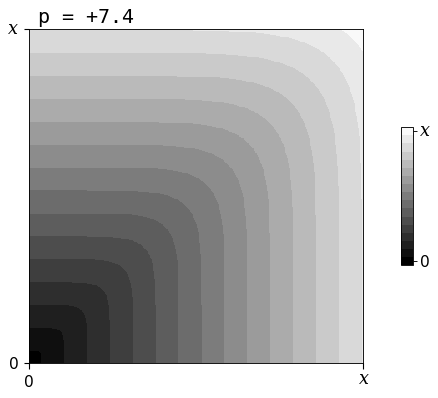


  7%|▋         | 41/617 [00:19<04:38,  2.07it/s]

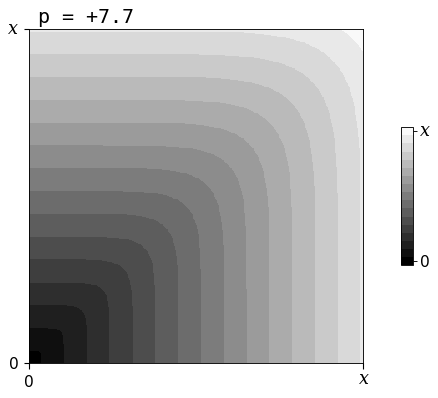


  7%|▋         | 42/617 [00:19<04:35,  2.08it/s]

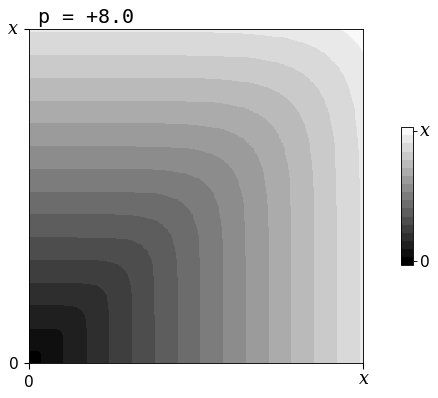


  7%|▋         | 43/617 [00:20<04:33,  2.10it/s]

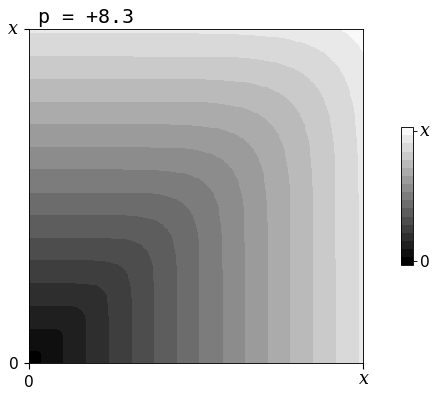


  7%|▋         | 44/617 [00:20<04:31,  2.11it/s]

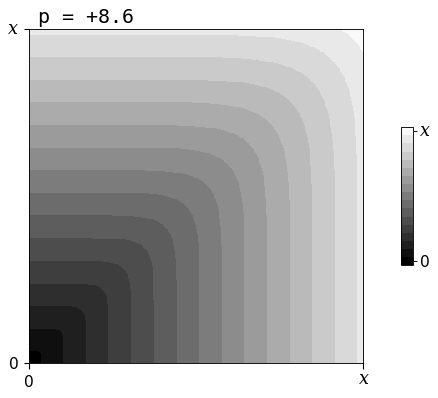


  7%|▋         | 45/617 [00:21<04:31,  2.10it/s]

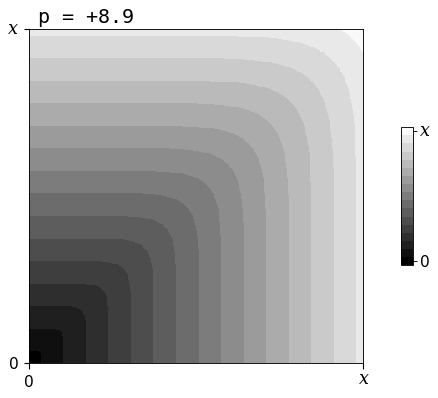


  7%|▋         | 46/617 [00:21<04:29,  2.12it/s]

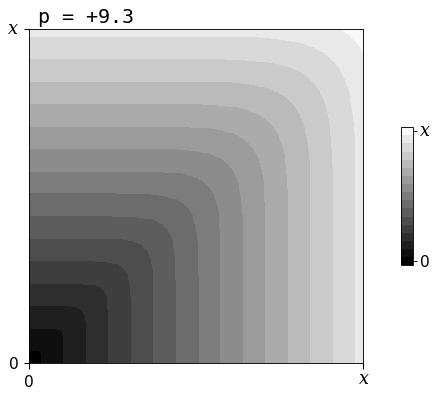


  8%|▊         | 47/617 [00:22<04:29,  2.12it/s]

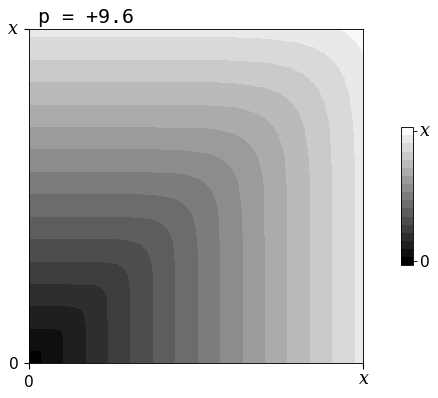


  8%|▊         | 48/617 [00:22<04:31,  2.09it/s]

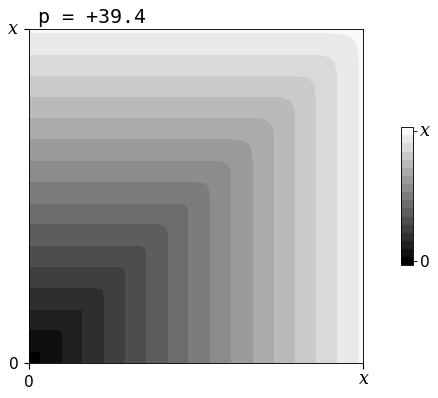


  8%|▊         | 49/617 [00:23<04:29,  2.10it/s]

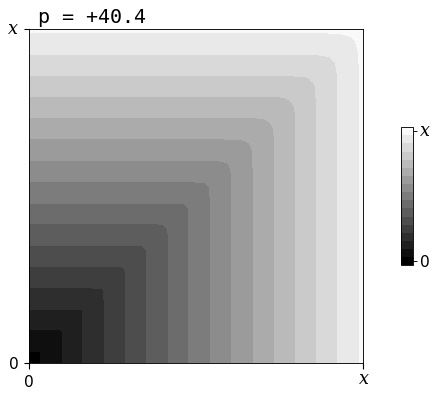


  8%|▊         | 50/617 [00:23<04:28,  2.11it/s]

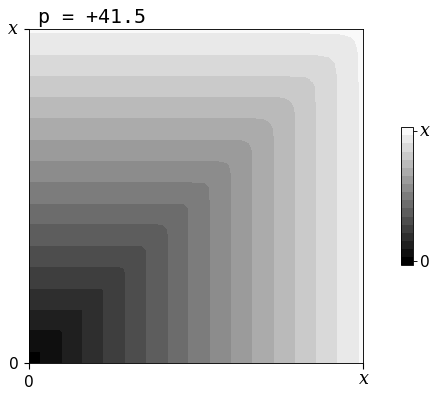


  8%|▊         | 51/617 [00:24<04:27,  2.11it/s]

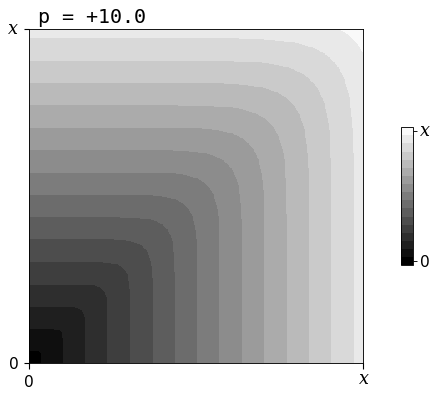


  8%|▊         | 52/617 [00:24<04:36,  2.04it/s]

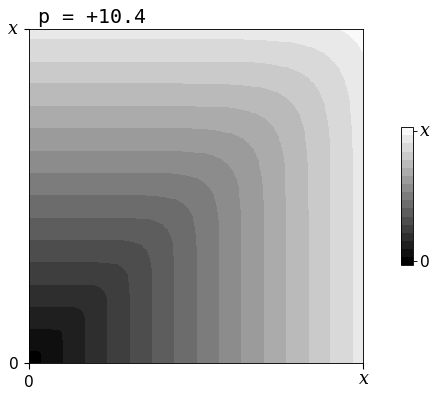


  9%|▊         | 53/617 [00:25<04:32,  2.07it/s]

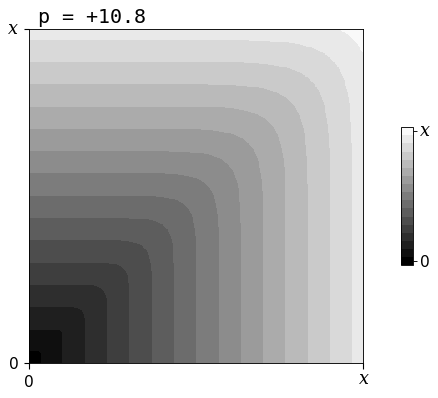


  9%|▉         | 54/617 [00:25<04:28,  2.09it/s]

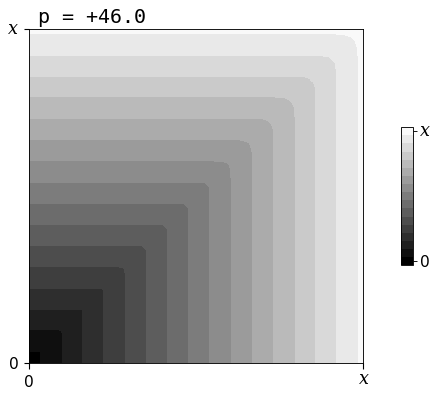


  9%|▉         | 55/617 [00:26<04:27,  2.10it/s]

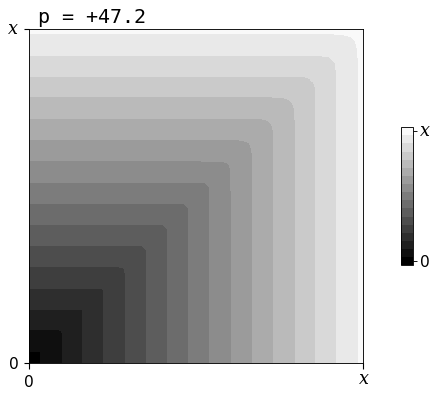


  9%|▉         | 56/617 [00:26<04:25,  2.11it/s]

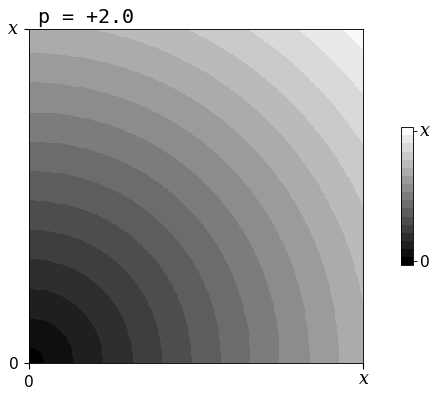


  9%|▉         | 57/617 [00:27<04:24,  2.12it/s]

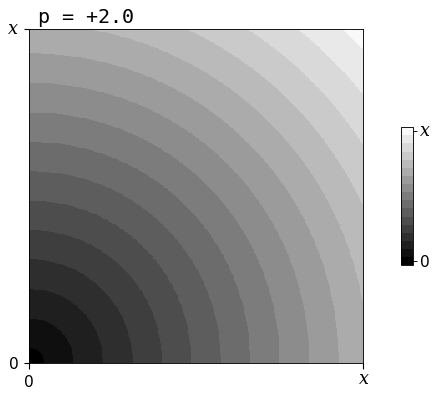


  9%|▉         | 58/617 [00:27<04:23,  2.12it/s]

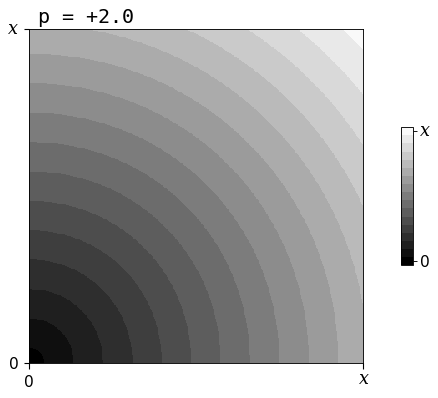


 10%|▉         | 59/617 [00:28<04:21,  2.13it/s]

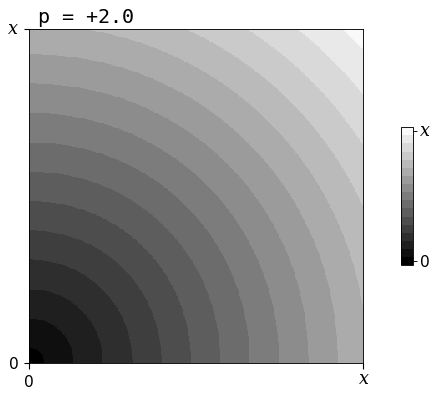


 10%|▉         | 60/617 [00:28<04:20,  2.14it/s]

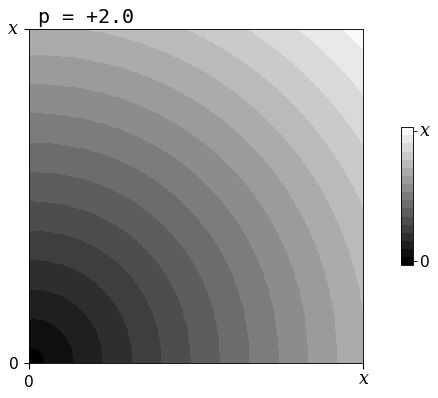


 10%|▉         | 61/617 [00:28<04:19,  2.14it/s]

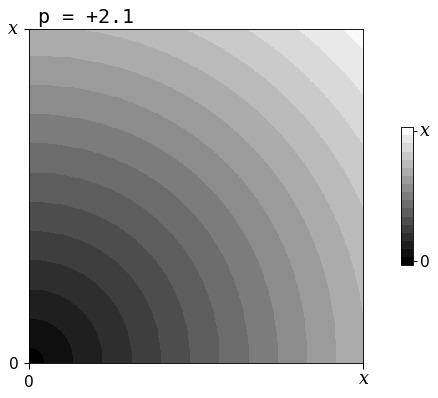


 10%|█         | 62/617 [00:29<04:18,  2.15it/s]

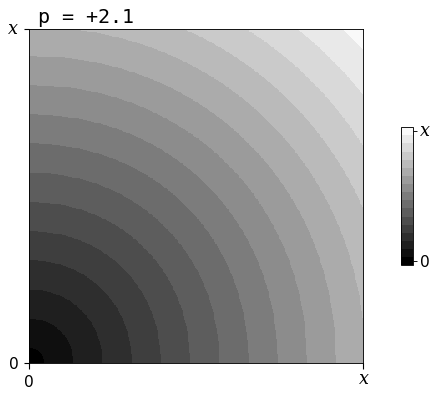


 10%|█         | 63/617 [00:29<04:27,  2.07it/s]

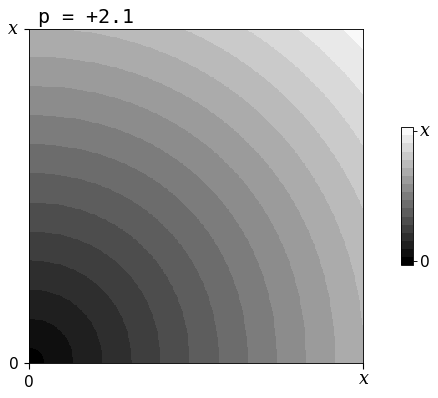


 10%|█         | 64/617 [00:30<04:23,  2.10it/s]

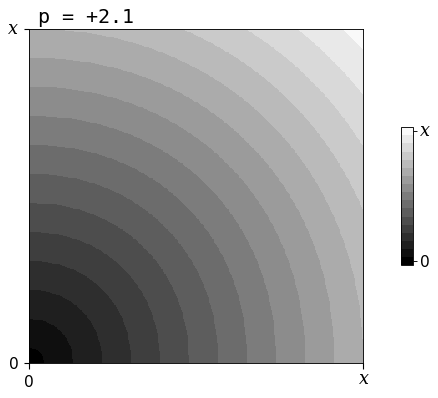


 11%|█         | 65/617 [00:30<04:21,  2.11it/s]

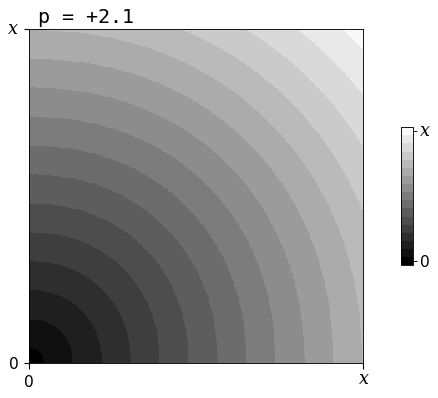


 11%|█         | 66/617 [00:31<04:20,  2.12it/s]

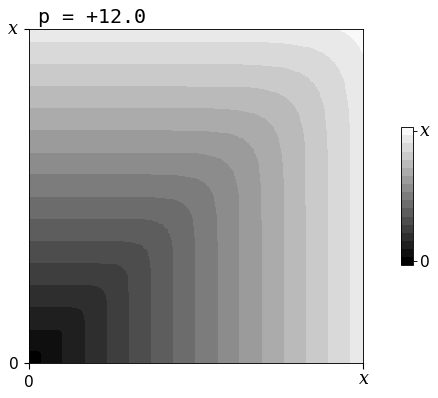


 11%|█         | 67/617 [00:31<04:20,  2.12it/s]

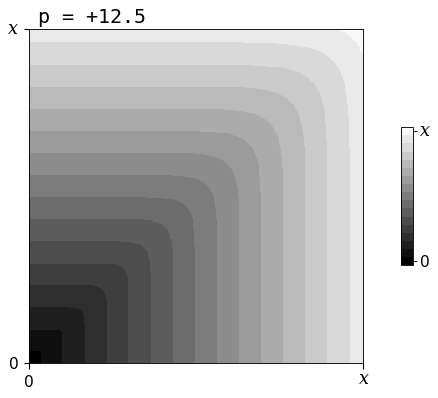


 11%|█         | 68/617 [00:32<04:19,  2.12it/s]

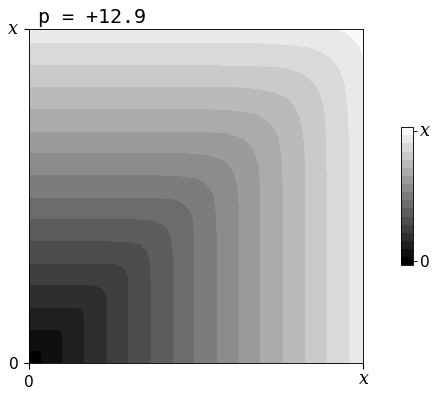


 11%|█         | 69/617 [00:32<04:17,  2.13it/s]

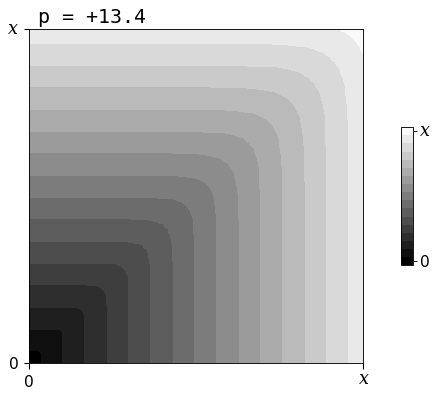


 11%|█▏        | 70/617 [00:33<04:16,  2.13it/s]

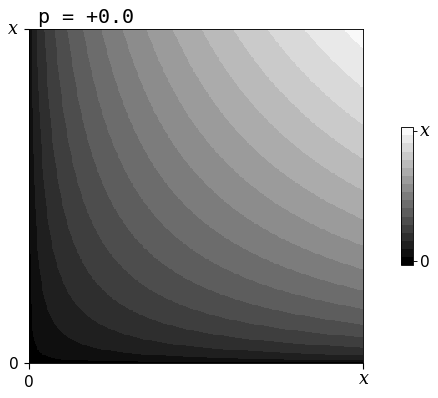


 12%|█▏        | 71/617 [00:33<04:15,  2.14it/s]

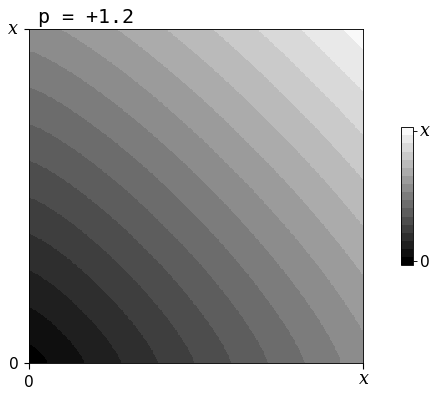


 12%|█▏        | 72/617 [00:34<04:14,  2.14it/s]

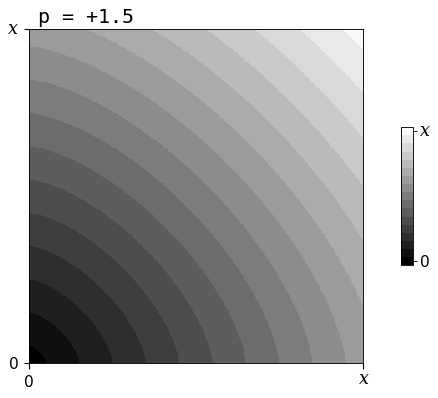


 12%|█▏        | 73/617 [00:34<04:12,  2.15it/s]

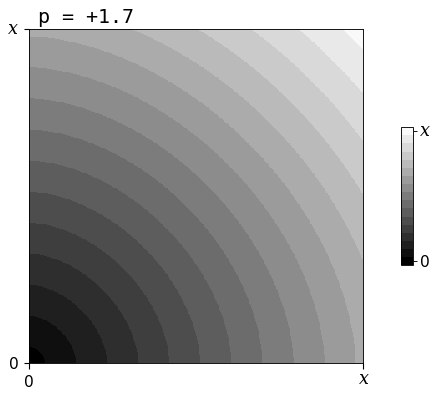


 12%|█▏        | 74/617 [00:35<04:22,  2.07it/s]

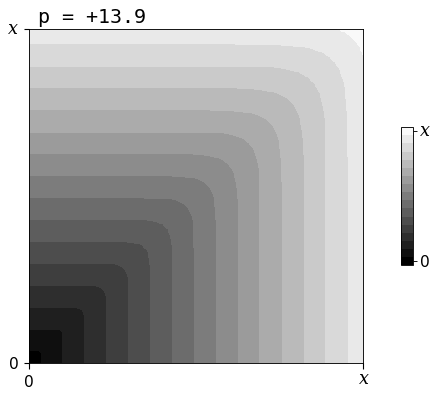


 12%|█▏        | 75/617 [00:35<04:20,  2.08it/s]

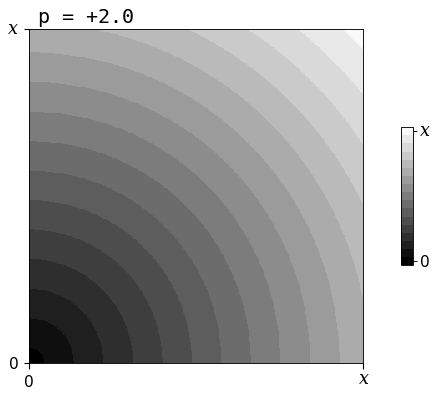


 12%|█▏        | 76/617 [00:36<04:17,  2.10it/s]

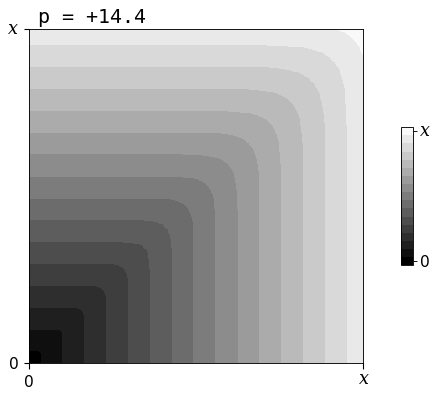


 12%|█▏        | 77/617 [00:36<04:15,  2.11it/s]

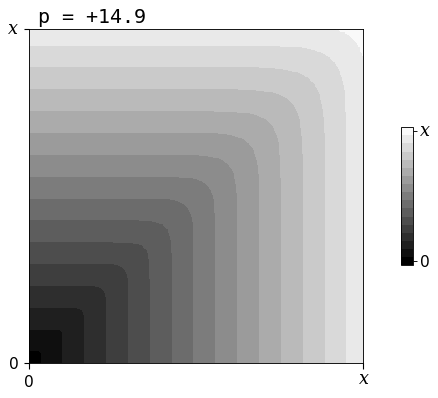


 13%|█▎        | 78/617 [00:36<04:14,  2.12it/s]

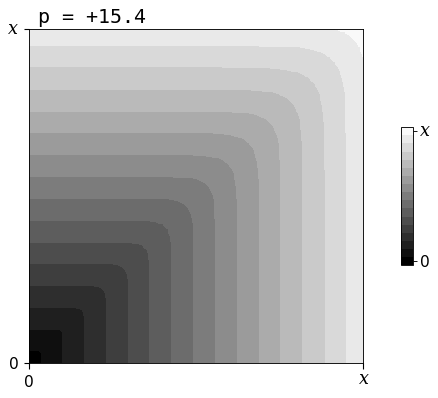


 13%|█▎        | 79/617 [00:37<04:13,  2.12it/s]

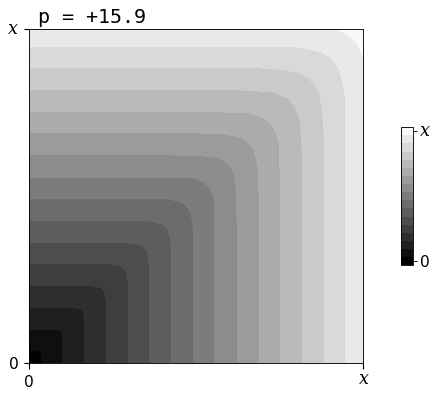


 13%|█▎        | 80/617 [00:37<04:12,  2.13it/s]

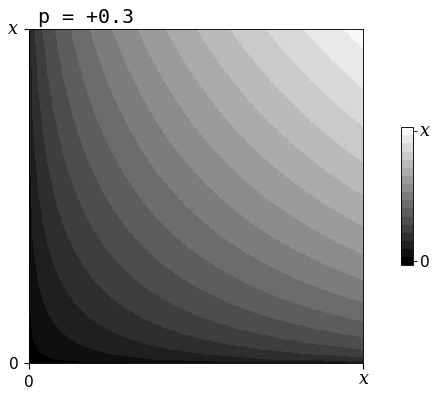


 13%|█▎        | 81/617 [00:38<04:12,  2.12it/s]

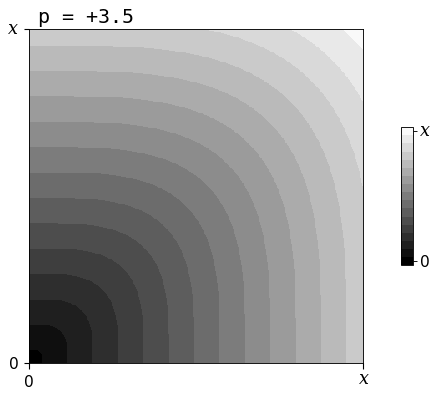


 13%|█▎        | 82/617 [00:38<04:11,  2.12it/s]

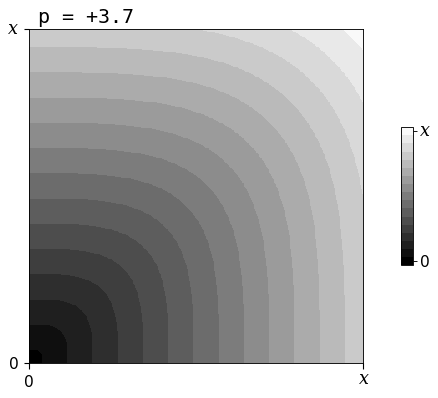


 13%|█▎        | 83/617 [00:39<04:09,  2.14it/s]

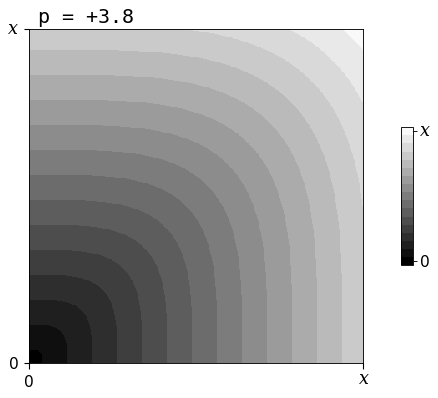


 14%|█▎        | 84/617 [00:39<04:08,  2.14it/s]

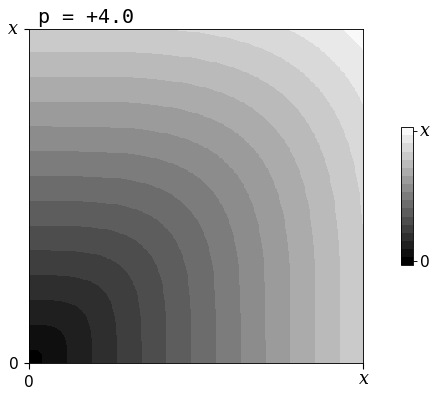


 14%|█▍        | 85/617 [00:40<04:15,  2.08it/s]

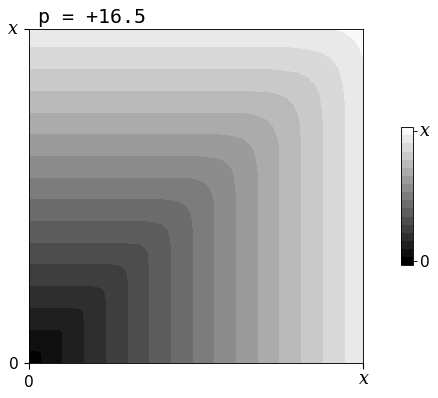


 14%|█▍        | 86/617 [00:40<04:13,  2.09it/s]

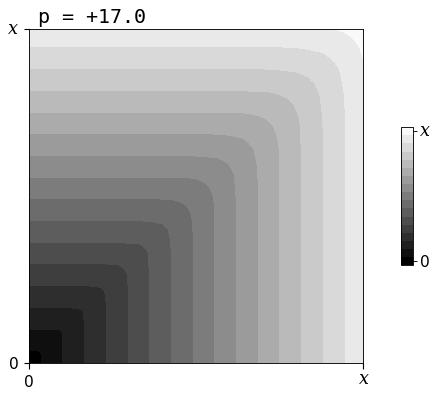


 14%|█▍        | 87/617 [00:41<04:11,  2.11it/s]

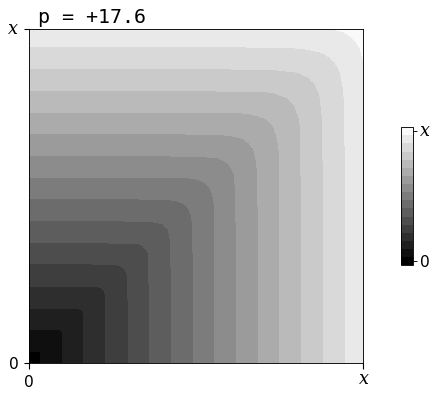


 14%|█▍        | 88/617 [00:41<04:10,  2.11it/s]

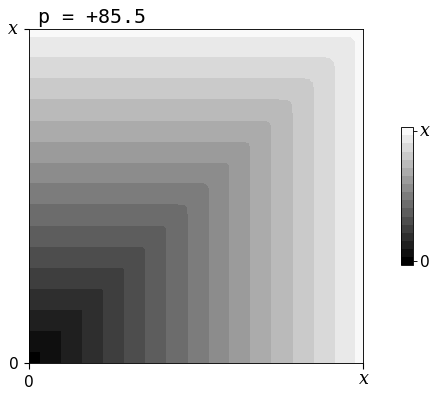


 14%|█▍        | 89/617 [00:42<04:10,  2.11it/s]

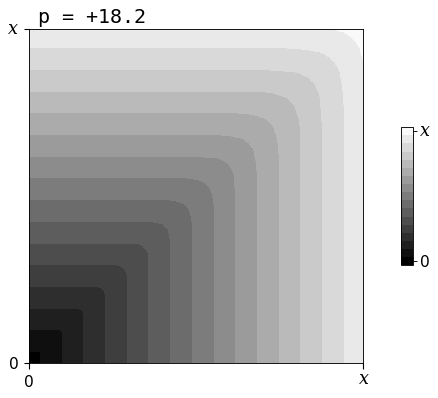


 15%|█▍        | 90/617 [00:42<04:09,  2.11it/s]

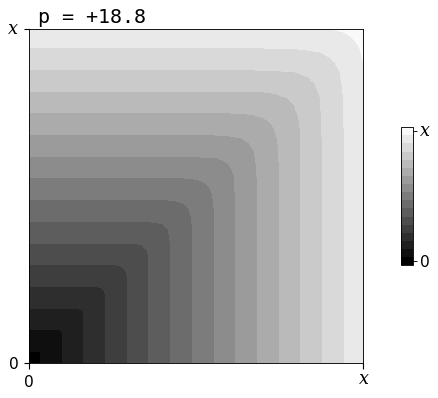


 15%|█▍        | 91/617 [00:43<04:08,  2.12it/s]

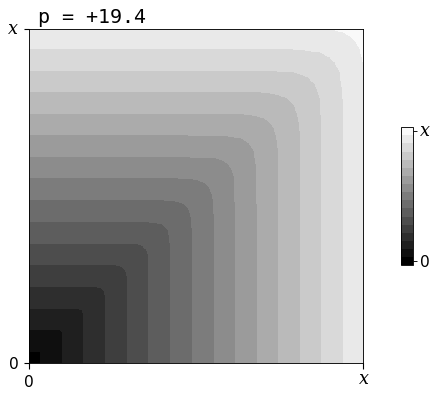


 15%|█▍        | 92/617 [00:43<04:07,  2.12it/s]

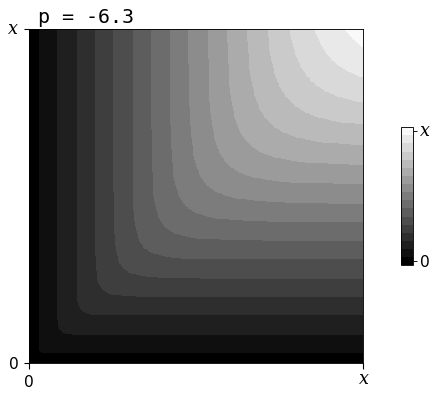


 15%|█▌        | 93/617 [00:44<04:06,  2.13it/s]

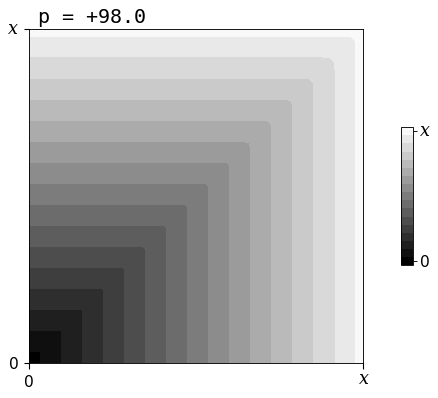


 15%|█▌        | 94/617 [00:44<04:06,  2.12it/s]

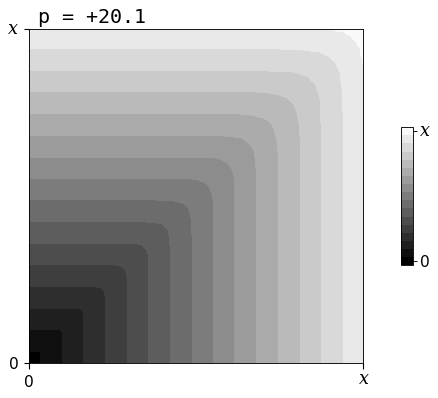


 15%|█▌        | 95/617 [00:45<04:04,  2.13it/s]

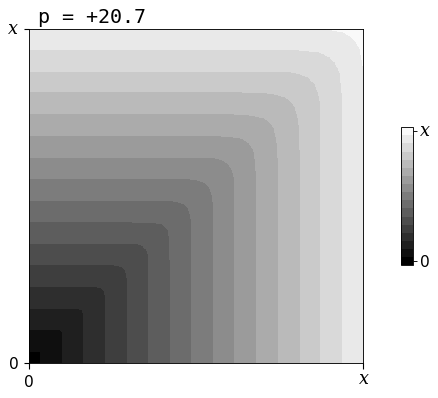


 16%|█▌        | 96/617 [00:45<04:12,  2.07it/s]

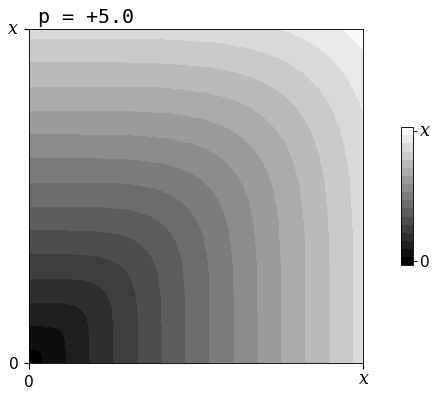


 16%|█▌        | 97/617 [00:45<04:09,  2.08it/s]

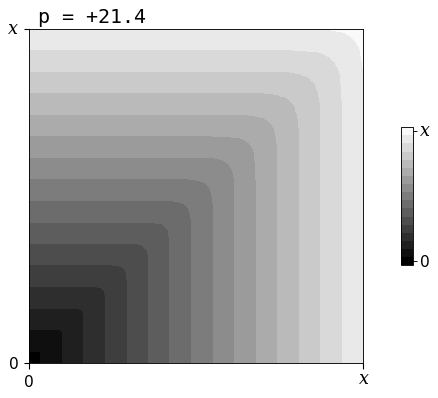


 16%|█▌        | 98/617 [00:46<04:09,  2.08it/s]

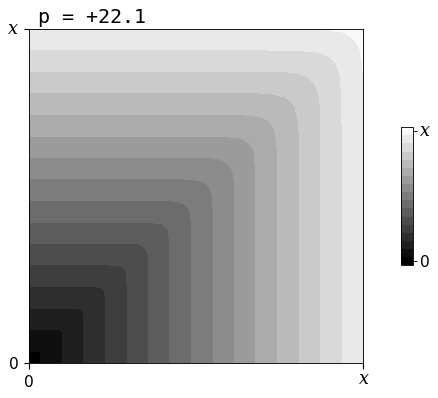


 16%|█▌        | 99/617 [00:46<04:08,  2.08it/s]

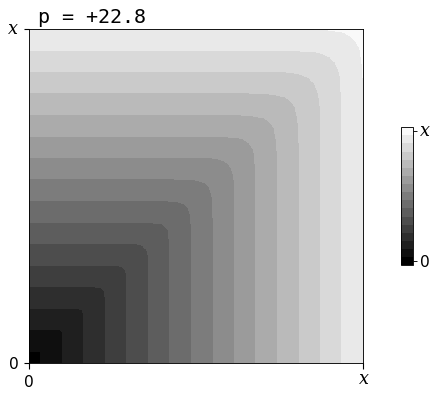


 16%|█▌        | 100/617 [00:47<04:07,  2.09it/s]

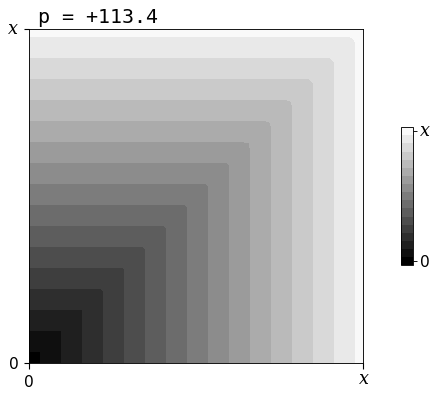


 16%|█▋        | 101/617 [00:47<04:06,  2.10it/s]

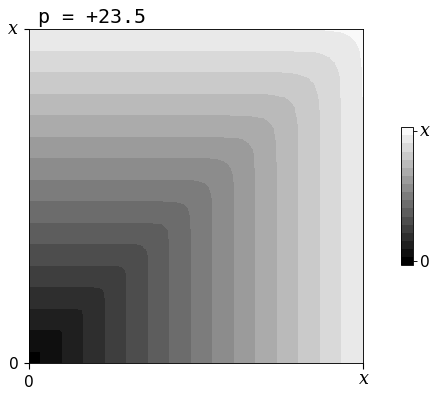


 17%|█▋        | 102/617 [00:48<04:05,  2.09it/s]

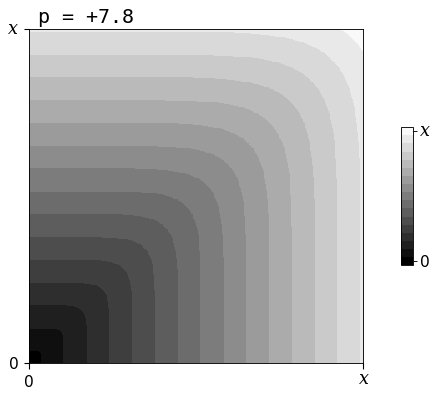


 17%|█▋        | 103/617 [00:48<04:04,  2.10it/s]

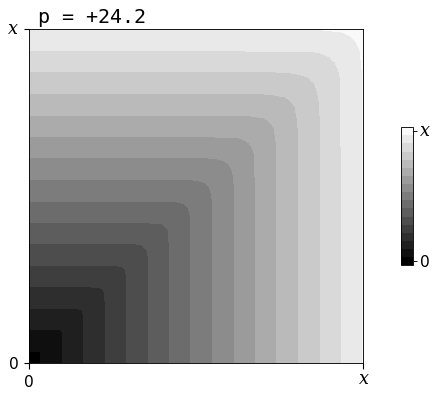


 17%|█▋        | 104/617 [00:49<04:02,  2.11it/s]

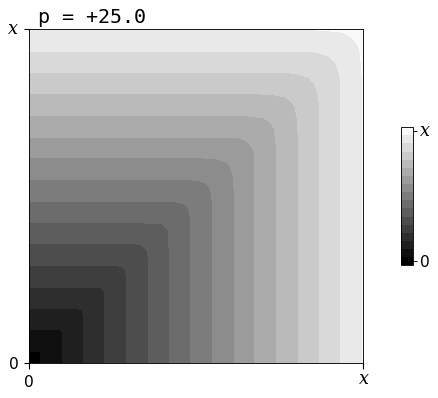


 17%|█▋        | 105/617 [00:49<04:01,  2.12it/s]

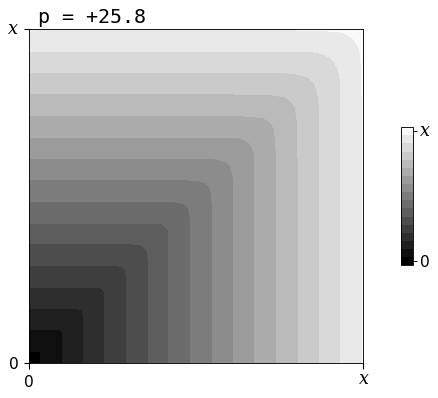


 17%|█▋        | 106/617 [00:50<04:01,  2.12it/s]

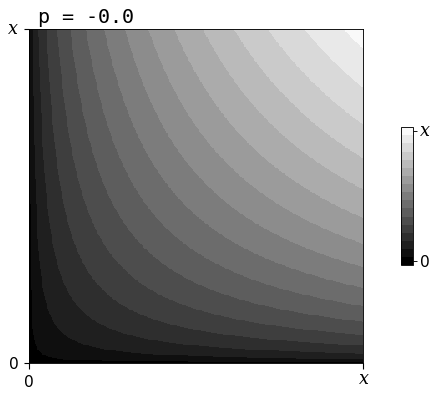


 17%|█▋        | 107/617 [00:50<04:09,  2.04it/s]

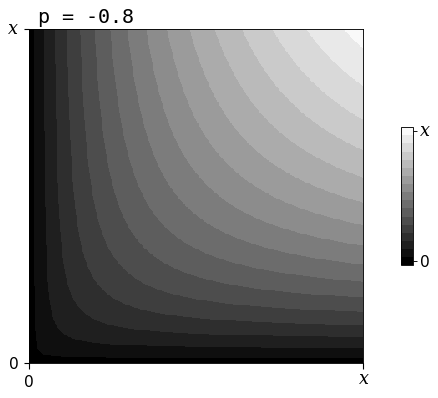


 18%|█▊        | 108/617 [00:51<04:05,  2.07it/s]

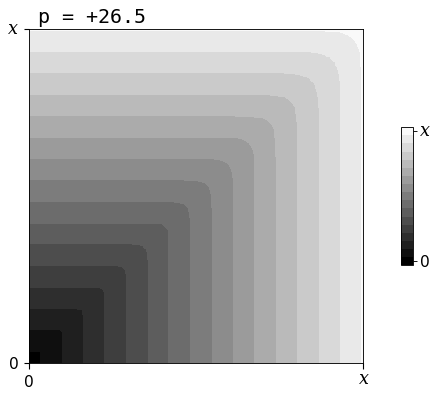


 18%|█▊        | 109/617 [00:51<04:03,  2.08it/s]

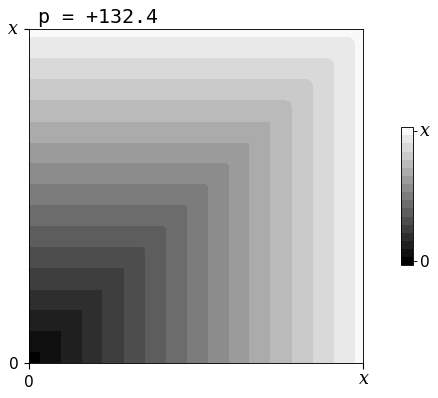


 18%|█▊        | 110/617 [00:52<04:01,  2.10it/s]

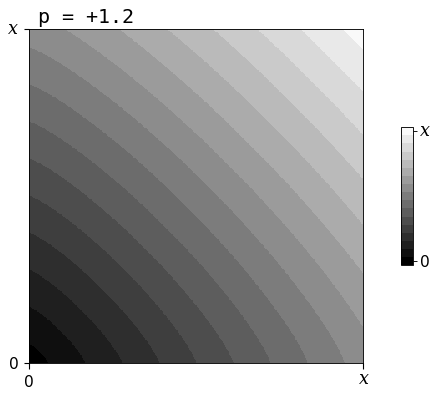


 18%|█▊        | 111/617 [00:52<03:58,  2.12it/s]

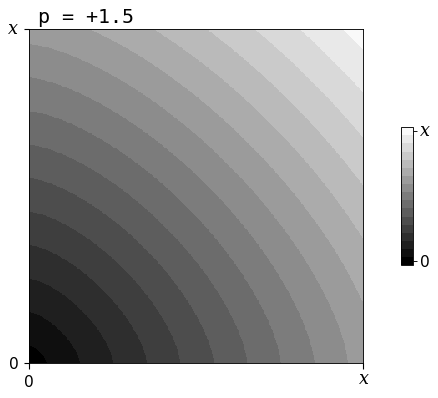


 18%|█▊        | 112/617 [00:53<03:58,  2.12it/s]

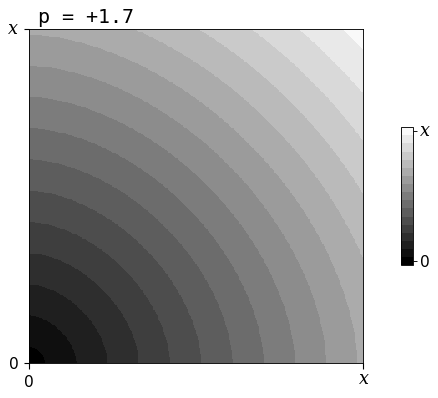


 18%|█▊        | 113/617 [00:53<03:56,  2.13it/s]

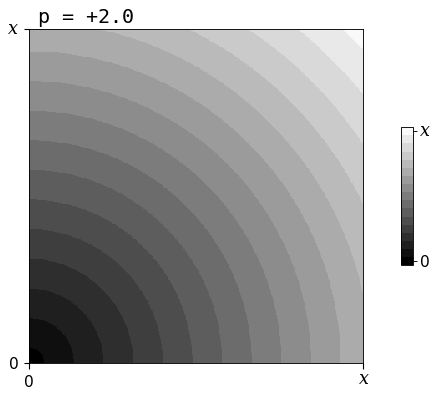


 18%|█▊        | 114/617 [00:54<03:55,  2.13it/s]

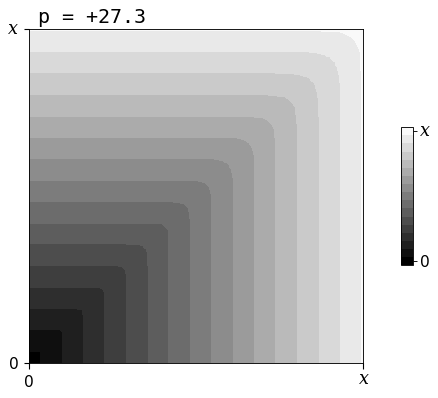


 19%|█▊        | 115/617 [00:54<03:55,  2.14it/s]

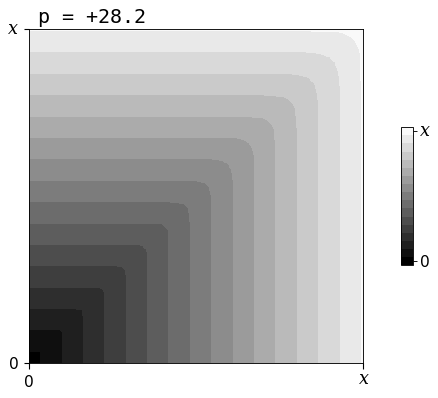


 19%|█▉        | 116/617 [00:55<03:54,  2.14it/s]

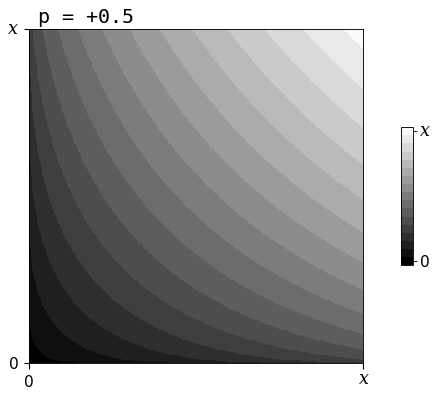


 19%|█▉        | 117/617 [00:55<03:53,  2.14it/s]

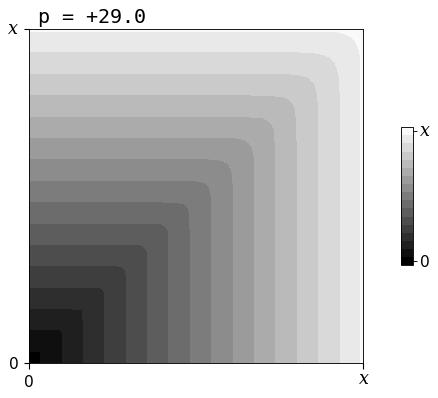


 19%|█▉        | 118/617 [00:55<04:03,  2.05it/s]

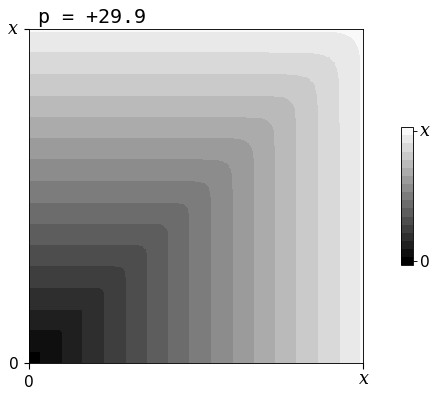


 19%|█▉        | 119/617 [00:56<04:00,  2.07it/s]

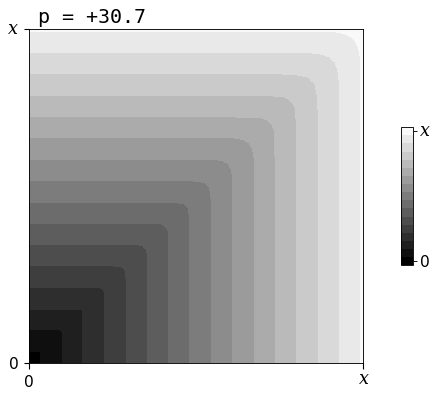


 19%|█▉        | 120/617 [00:56<03:58,  2.09it/s]

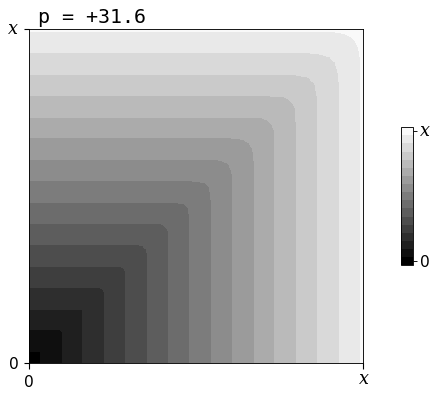


 20%|█▉        | 121/617 [00:57<03:56,  2.10it/s]

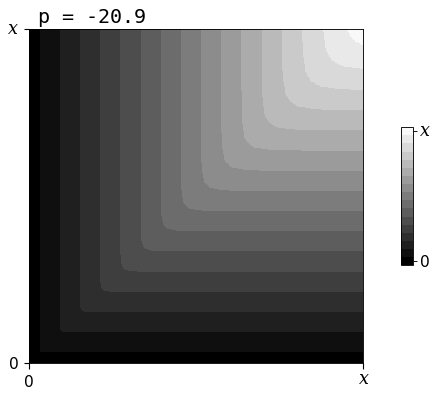


 20%|█▉        | 122/617 [00:57<03:54,  2.11it/s]

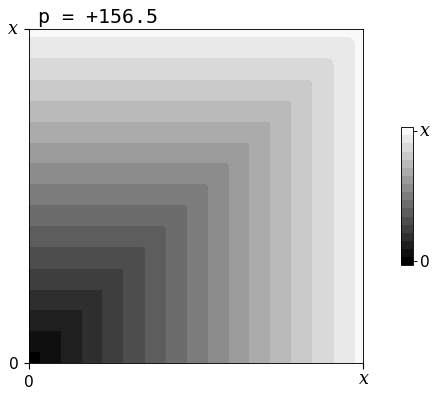


 20%|█▉        | 123/617 [00:58<03:53,  2.11it/s]

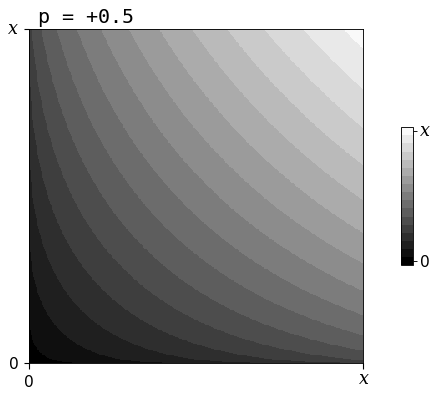


 20%|██        | 124/617 [00:58<03:53,  2.11it/s]

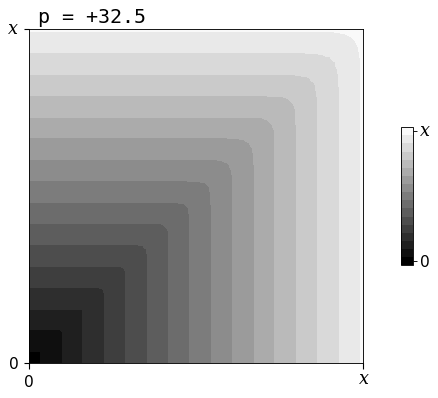


 20%|██        | 125/617 [00:59<03:52,  2.11it/s]

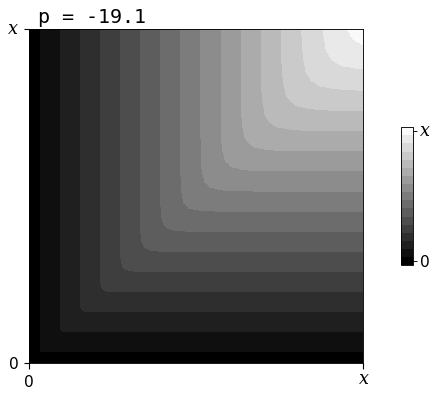


 20%|██        | 126/617 [00:59<03:50,  2.13it/s]

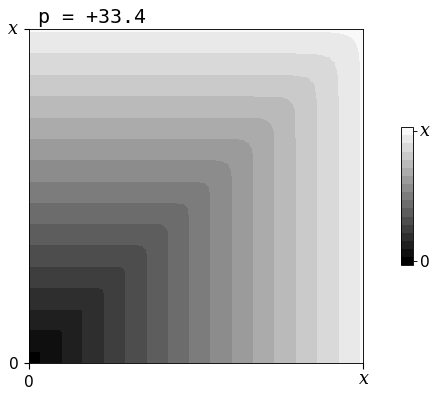


 21%|██        | 127/617 [01:00<03:49,  2.13it/s]

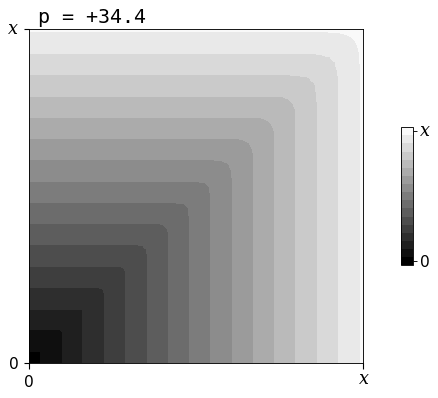


 21%|██        | 128/617 [01:00<03:50,  2.12it/s]

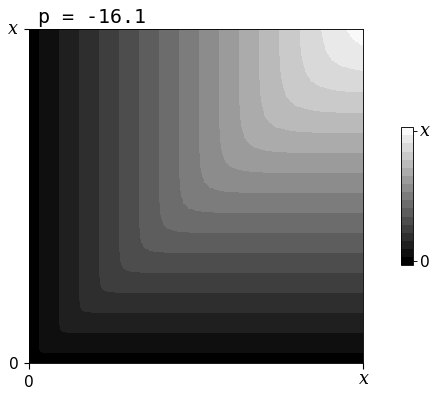


 21%|██        | 129/617 [01:01<03:56,  2.07it/s]

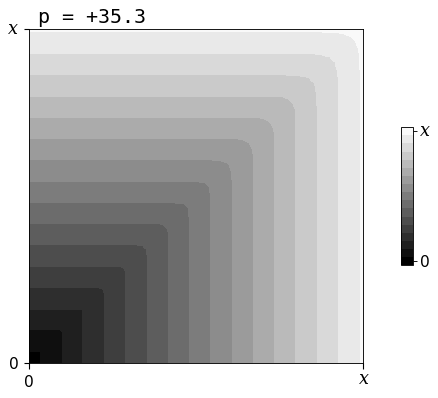


 21%|██        | 130/617 [01:01<03:53,  2.08it/s]

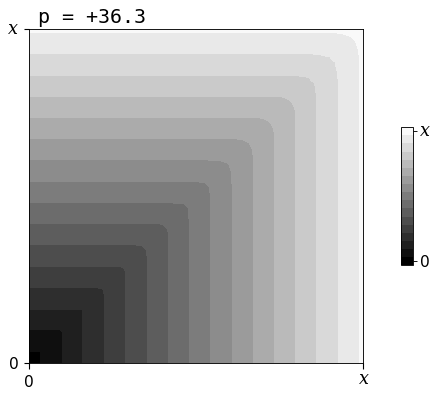


 21%|██        | 131/617 [01:02<03:51,  2.10it/s]

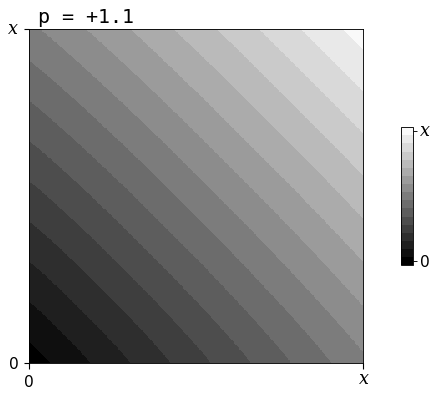


 21%|██▏       | 132/617 [01:02<03:48,  2.12it/s]

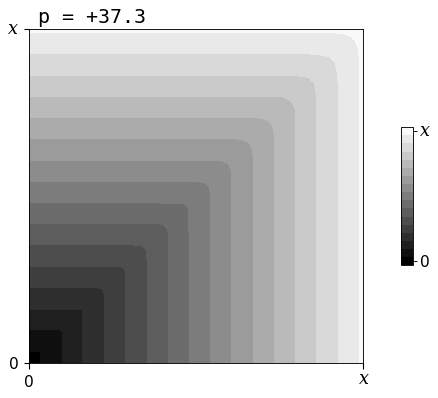


 22%|██▏       | 133/617 [01:03<03:49,  2.11it/s]

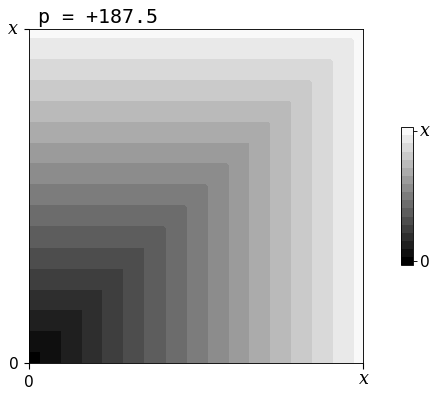


 22%|██▏       | 134/617 [01:03<03:50,  2.09it/s]

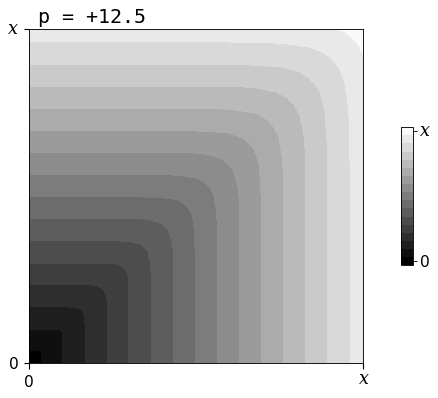


 22%|██▏       | 135/617 [01:04<03:49,  2.10it/s]

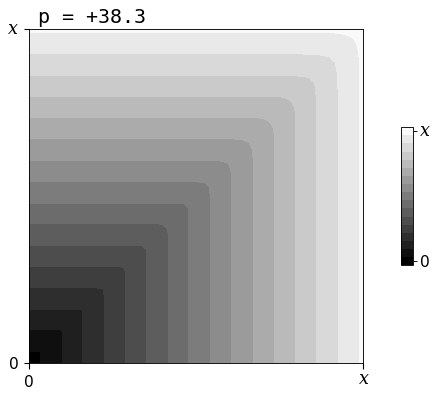


 22%|██▏       | 136/617 [01:04<03:49,  2.10it/s]

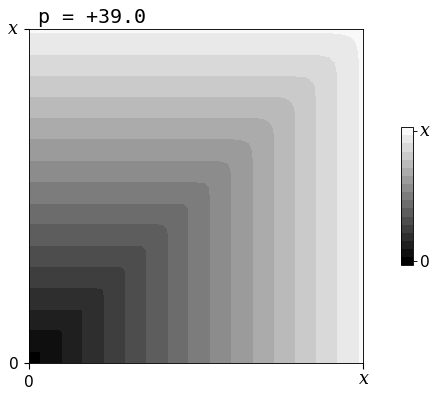


 22%|██▏       | 137/617 [01:05<03:49,  2.10it/s]

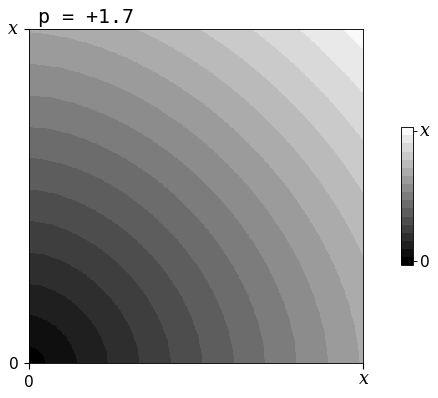


 22%|██▏       | 138/617 [01:05<03:49,  2.08it/s]

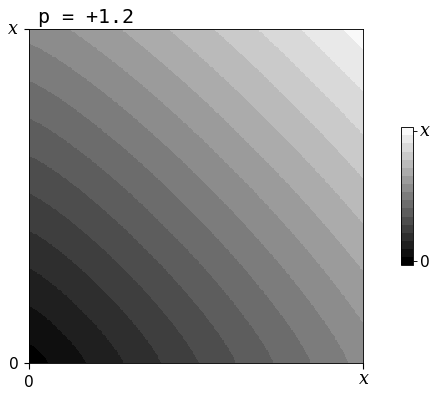


 23%|██▎       | 139/617 [01:05<03:48,  2.09it/s]

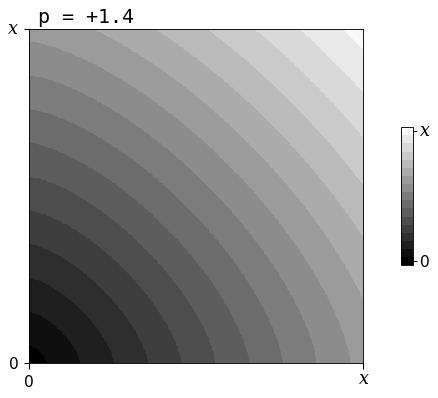


 23%|██▎       | 140/617 [01:06<03:53,  2.04it/s]

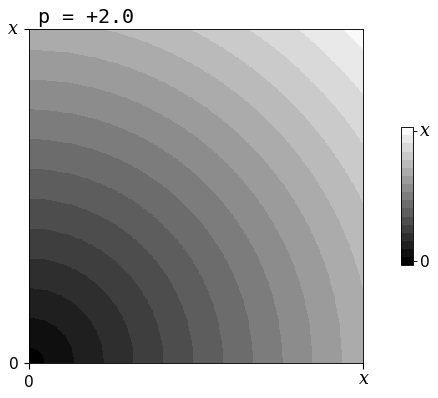


 23%|██▎       | 141/617 [01:06<03:50,  2.06it/s]

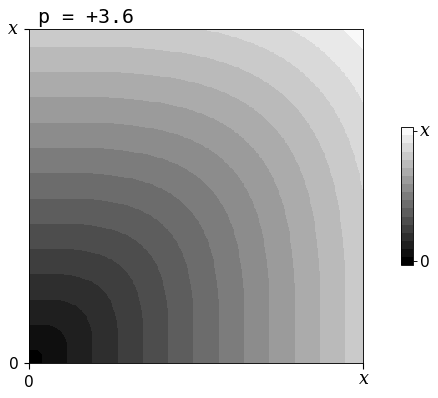


 23%|██▎       | 142/617 [01:07<03:49,  2.07it/s]

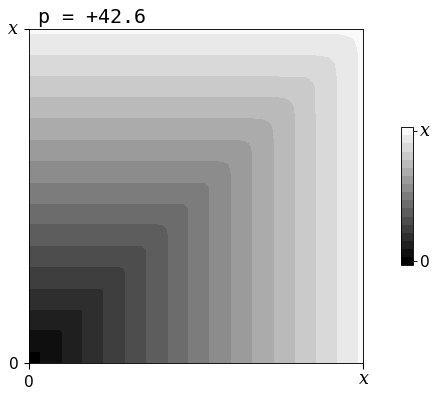


 23%|██▎       | 143/617 [01:07<03:48,  2.07it/s]

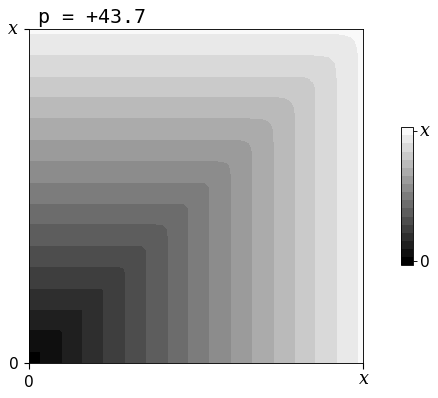


 23%|██▎       | 144/617 [01:08<03:46,  2.09it/s]

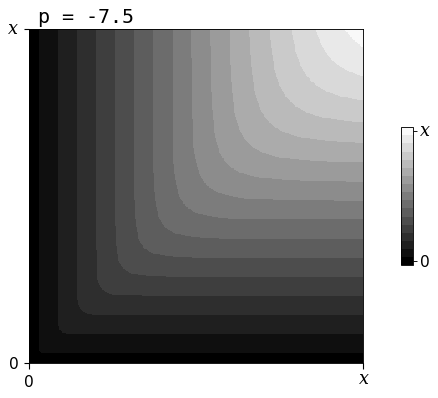


 24%|██▎       | 145/617 [01:08<03:44,  2.11it/s]

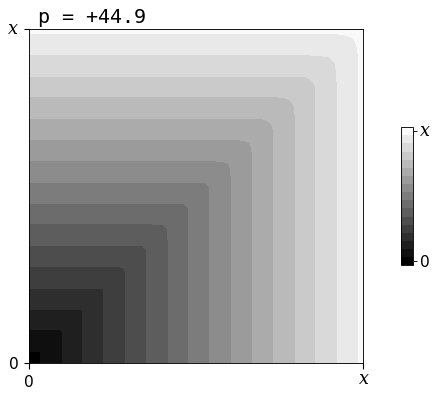


 24%|██▎       | 146/617 [01:09<03:42,  2.12it/s]

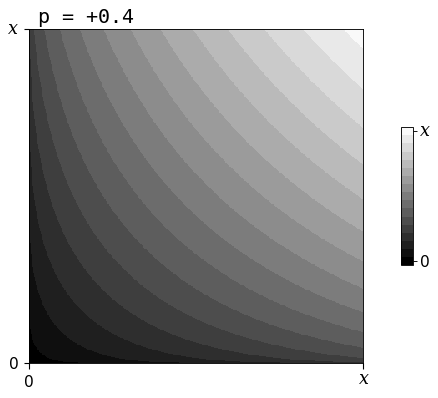


 24%|██▍       | 147/617 [01:09<03:40,  2.13it/s]

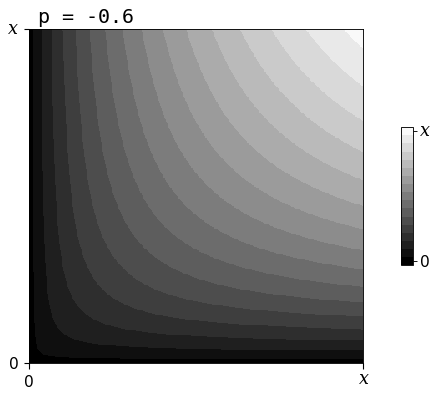


 24%|██▍       | 148/617 [01:10<03:40,  2.13it/s]

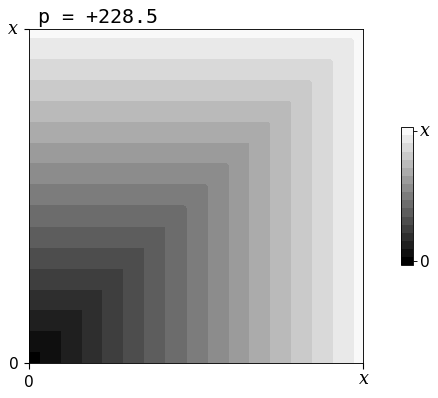


 24%|██▍       | 149/617 [01:10<03:40,  2.12it/s]

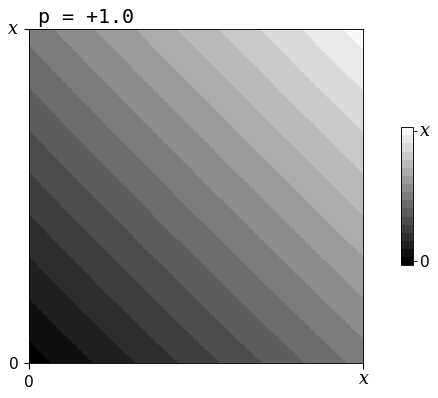


 24%|██▍       | 150/617 [01:11<03:38,  2.13it/s]

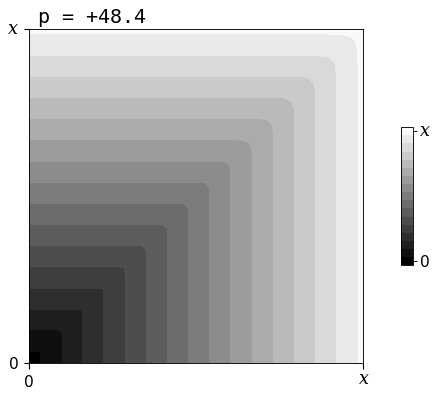


 24%|██▍       | 151/617 [01:11<03:46,  2.06it/s]

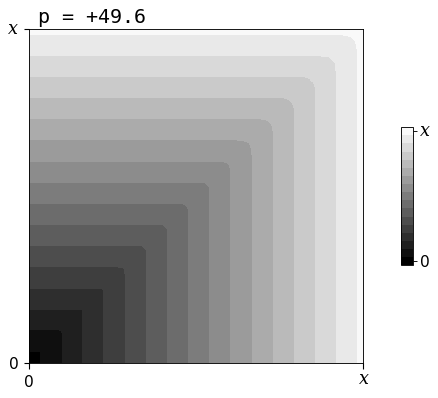


 25%|██▍       | 152/617 [01:12<03:43,  2.08it/s]

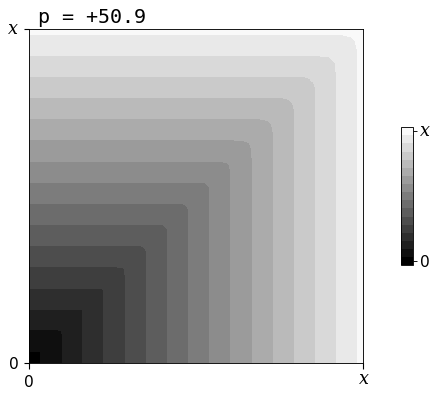


 25%|██▍       | 153/617 [01:12<03:41,  2.09it/s]

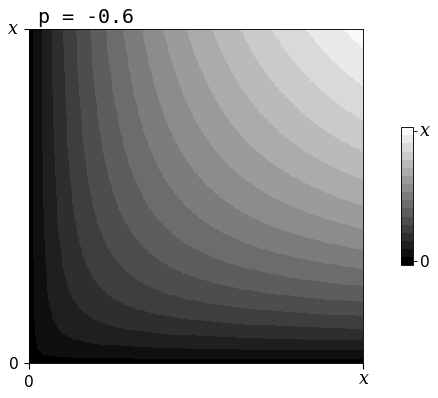


 25%|██▍       | 154/617 [01:13<03:40,  2.10it/s]

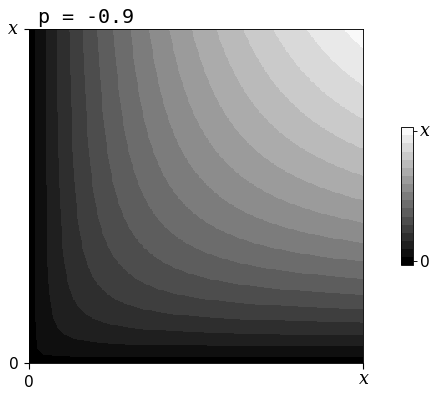


 25%|██▌       | 155/617 [01:13<03:38,  2.12it/s]

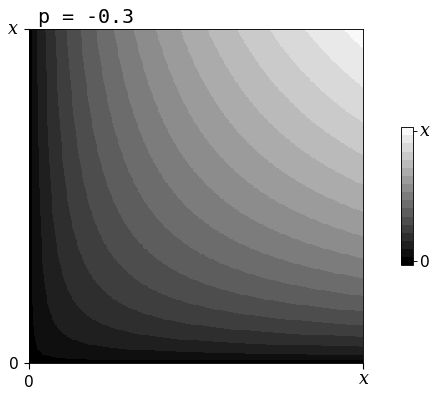


 25%|██▌       | 156/617 [01:14<03:36,  2.13it/s]

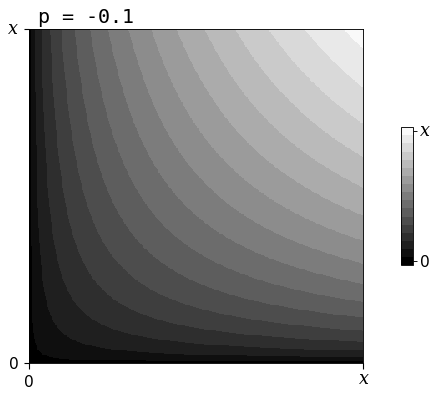


 25%|██▌       | 157/617 [01:14<03:35,  2.13it/s]

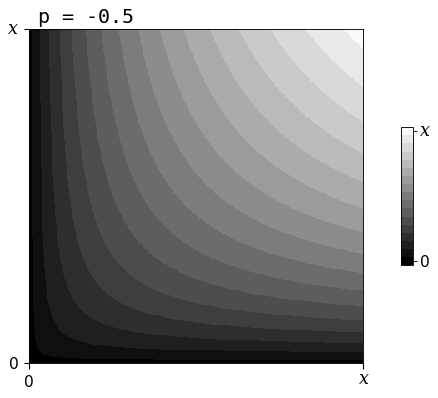


 26%|██▌       | 158/617 [01:14<03:35,  2.13it/s]

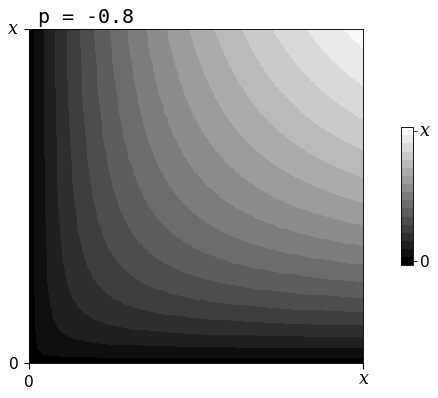


 26%|██▌       | 159/617 [01:15<03:35,  2.13it/s]

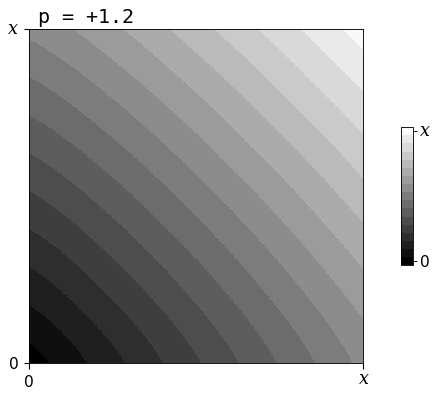


 26%|██▌       | 160/617 [01:15<03:35,  2.12it/s]

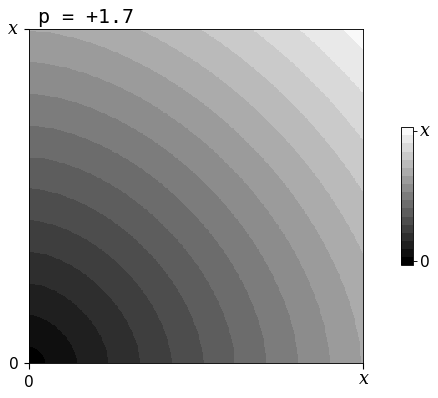


 26%|██▌       | 161/617 [01:16<03:36,  2.11it/s]

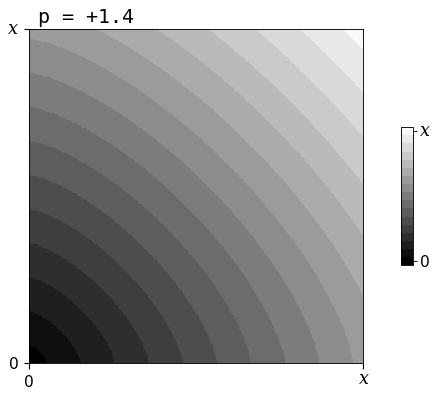


 26%|██▋       | 162/617 [01:16<03:41,  2.05it/s]

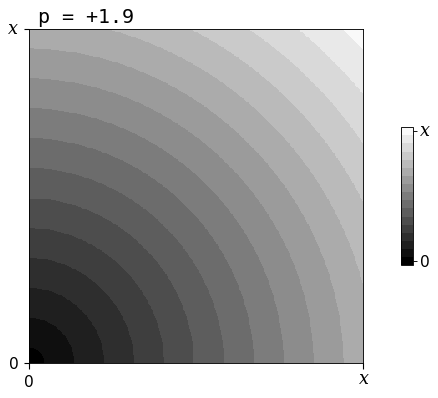


 26%|██▋       | 163/617 [01:17<03:40,  2.06it/s]

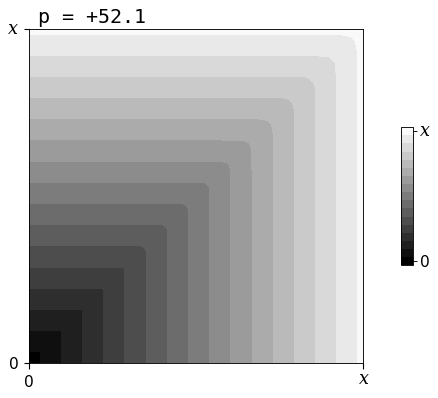


 27%|██▋       | 164/617 [01:17<03:37,  2.08it/s]

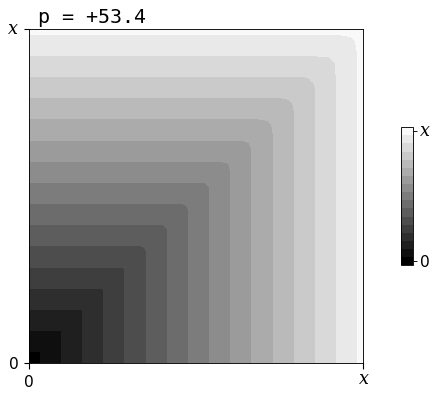


 27%|██▋       | 165/617 [01:18<03:37,  2.08it/s]

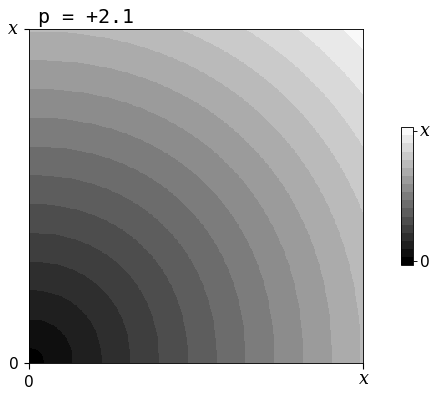


 27%|██▋       | 166/617 [01:18<03:35,  2.09it/s]

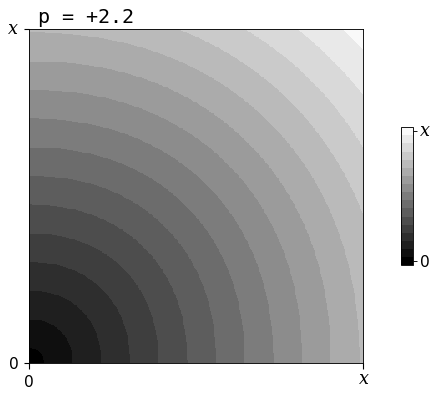


 27%|██▋       | 167/617 [01:19<03:35,  2.09it/s]

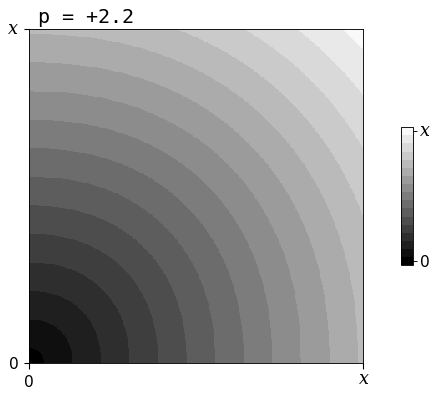


 27%|██▋       | 168/617 [01:19<03:40,  2.04it/s]

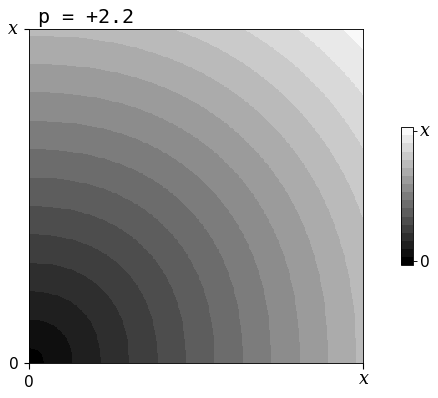


 27%|██▋       | 169/617 [01:20<03:38,  2.05it/s]

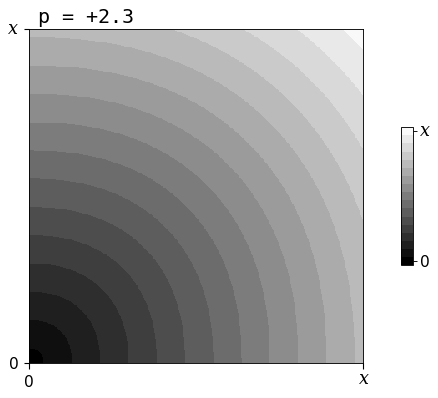


 28%|██▊       | 170/617 [01:20<03:35,  2.07it/s]

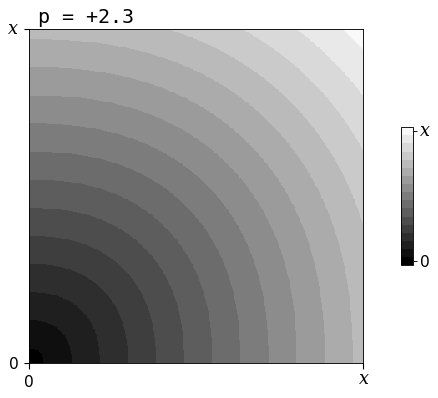


 28%|██▊       | 171/617 [01:21<03:33,  2.09it/s]

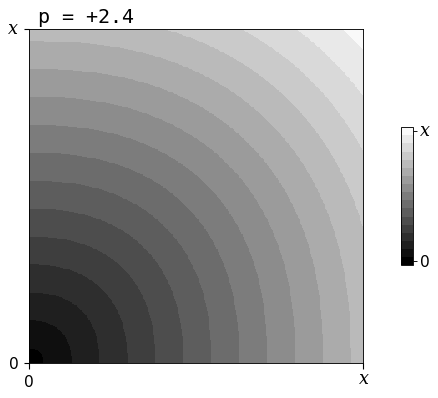


 28%|██▊       | 172/617 [01:21<03:31,  2.11it/s]

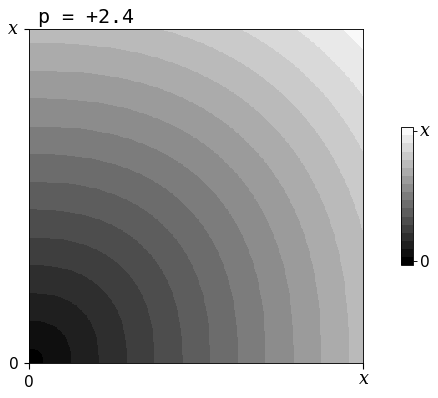


 28%|██▊       | 173/617 [01:22<03:37,  2.04it/s]

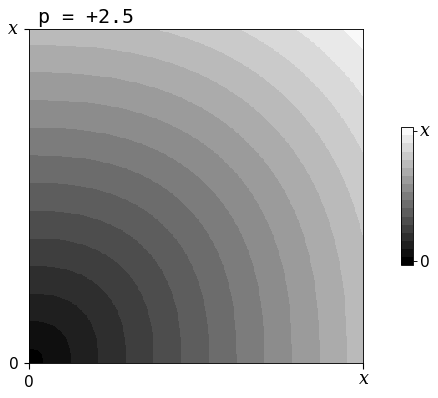


 28%|██▊       | 174/617 [01:22<03:33,  2.07it/s]

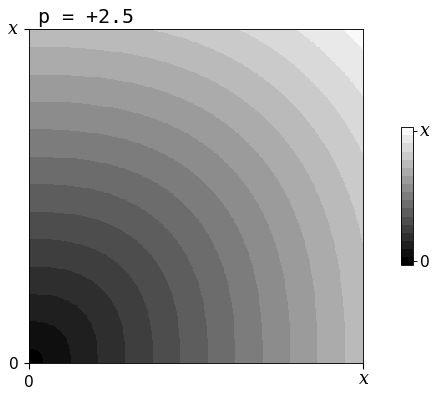


 28%|██▊       | 175/617 [01:23<03:30,  2.10it/s]

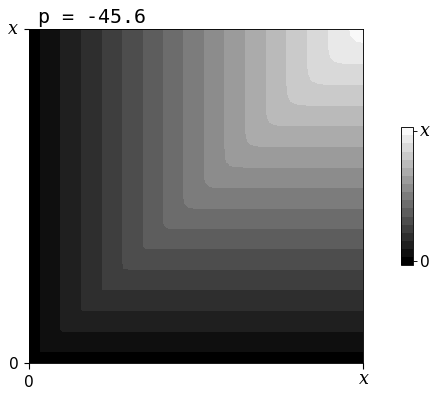


 29%|██▊       | 176/617 [01:23<03:29,  2.10it/s]

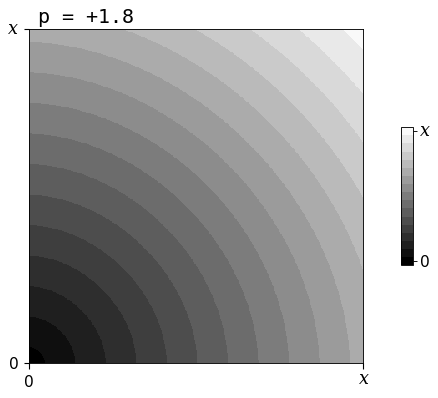


 29%|██▊       | 177/617 [01:24<03:27,  2.12it/s]

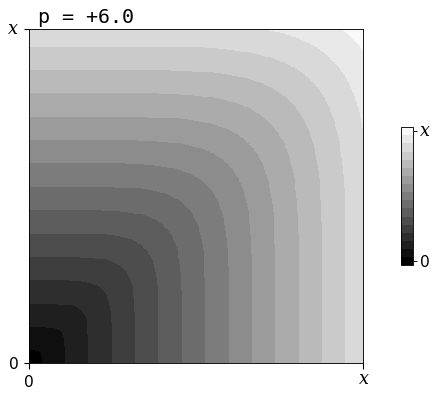


 29%|██▉       | 178/617 [01:24<03:26,  2.13it/s]

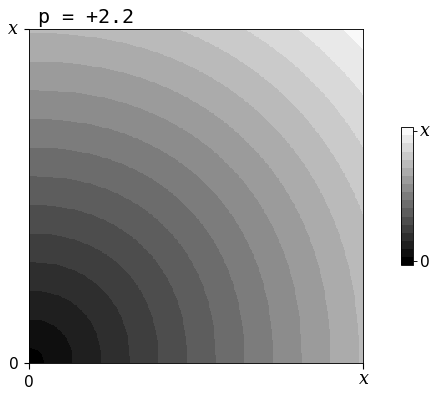


 29%|██▉       | 179/617 [01:25<03:25,  2.13it/s]

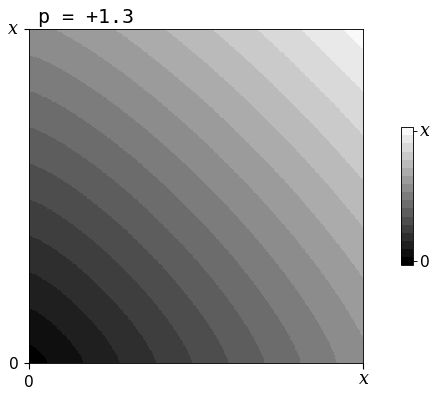


 29%|██▉       | 180/617 [01:25<03:25,  2.13it/s]

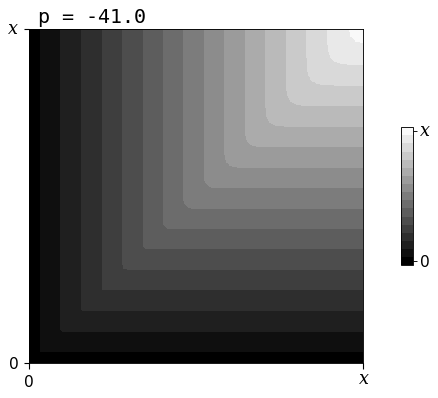


 29%|██▉       | 181/617 [01:25<03:24,  2.13it/s]

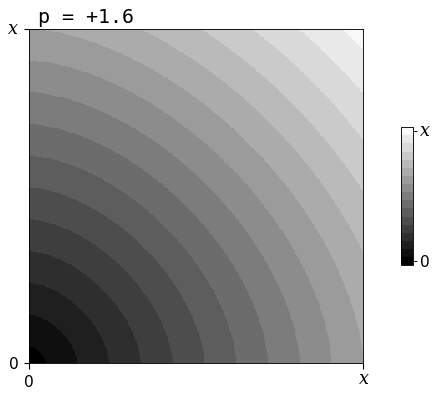


 29%|██▉       | 182/617 [01:26<03:25,  2.12it/s]

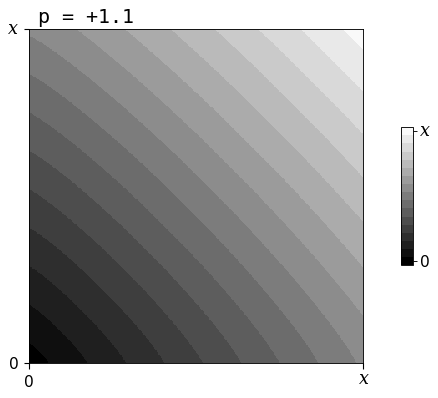


 30%|██▉       | 183/617 [01:26<03:23,  2.13it/s]

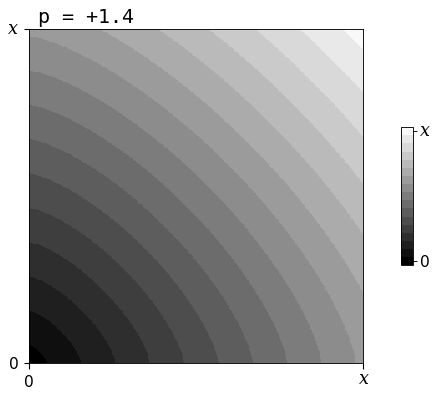


 30%|██▉       | 184/617 [01:27<03:31,  2.05it/s]

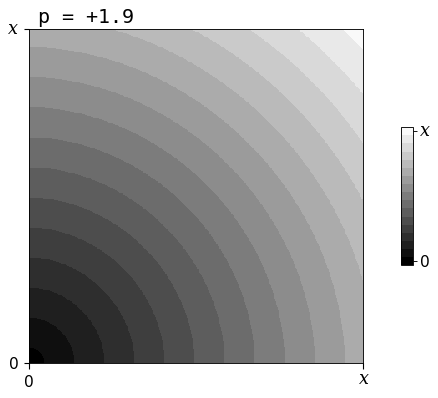


 30%|██▉       | 185/617 [01:27<03:29,  2.06it/s]

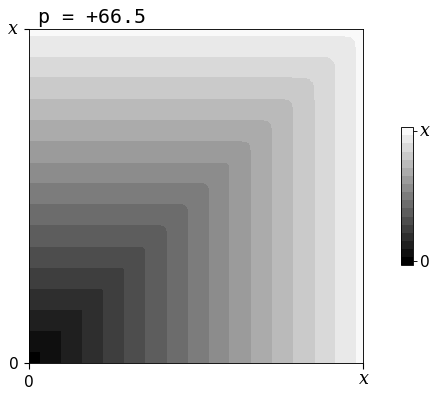


 30%|███       | 186/617 [01:28<03:26,  2.08it/s]

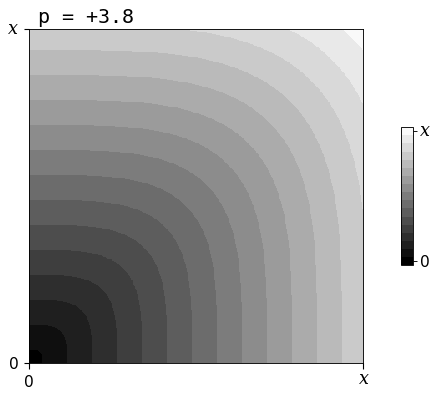


 30%|███       | 187/617 [01:28<03:26,  2.08it/s]

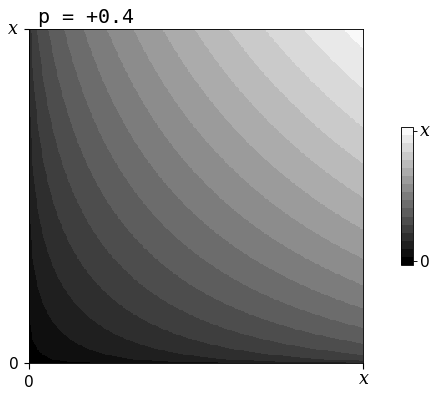


 30%|███       | 188/617 [01:29<03:24,  2.10it/s]

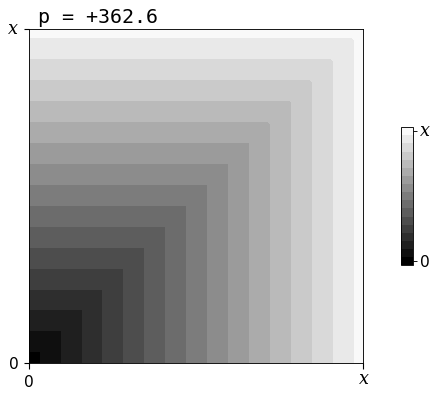


 31%|███       | 189/617 [01:29<03:23,  2.10it/s]

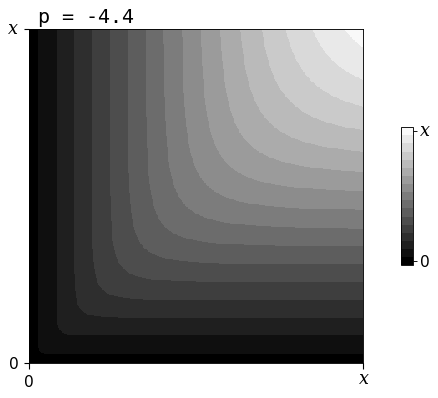


 31%|███       | 190/617 [01:30<03:22,  2.11it/s]

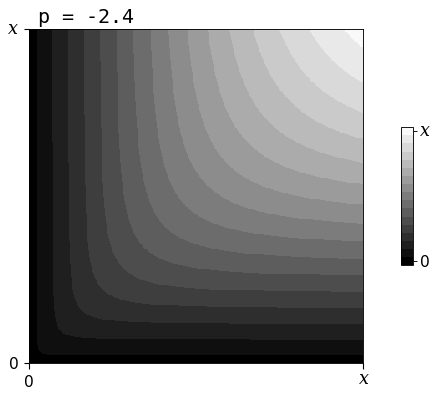


 31%|███       | 191/617 [01:30<03:21,  2.12it/s]

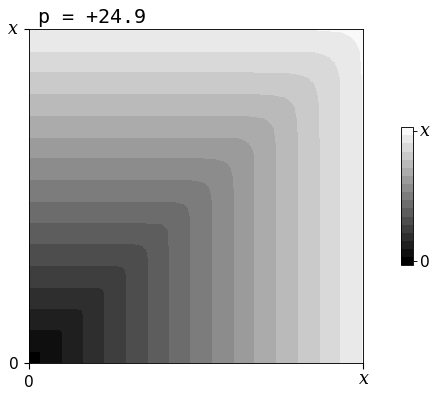


 31%|███       | 192/617 [01:31<03:19,  2.13it/s]

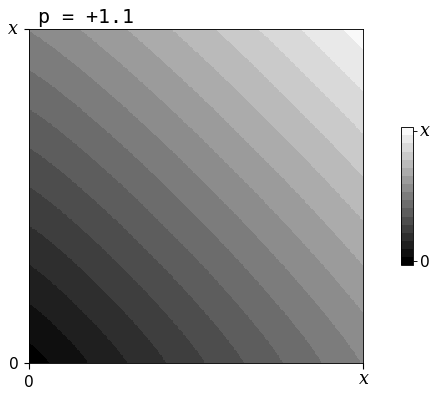


 31%|███▏      | 193/617 [01:31<03:18,  2.13it/s]

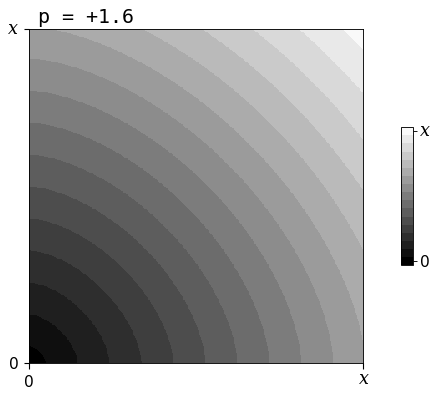


 31%|███▏      | 194/617 [01:32<03:17,  2.14it/s]

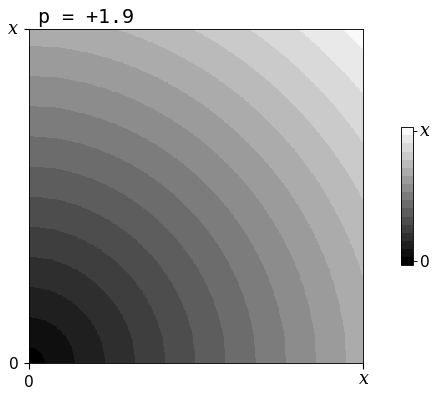


 32%|███▏      | 195/617 [01:32<03:23,  2.07it/s]

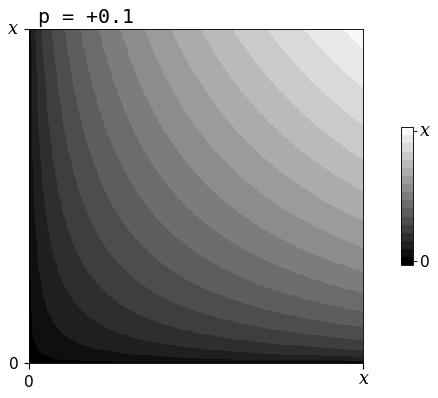


 32%|███▏      | 196/617 [01:33<03:21,  2.09it/s]

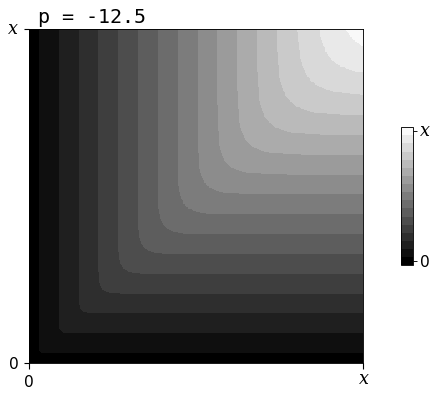


 32%|███▏      | 197/617 [01:33<03:19,  2.10it/s]

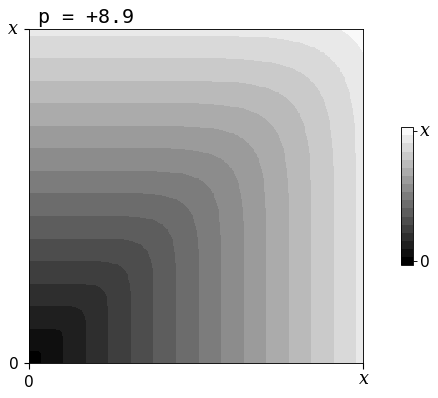


 32%|███▏      | 198/617 [01:34<03:18,  2.12it/s]

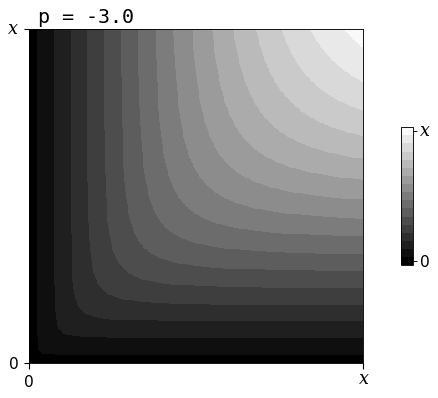


 32%|███▏      | 199/617 [01:34<03:18,  2.11it/s]

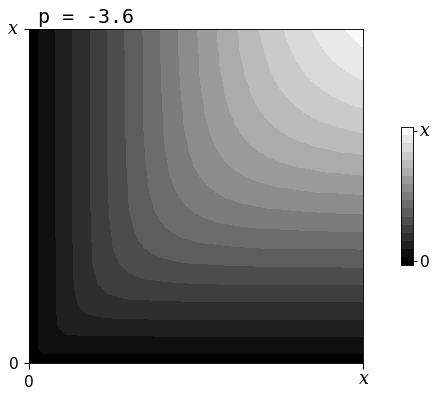


 32%|███▏      | 200/617 [01:35<03:16,  2.12it/s]

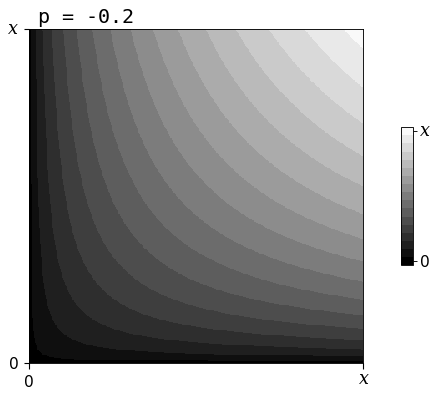


 33%|███▎      | 201/617 [01:35<03:15,  2.12it/s]

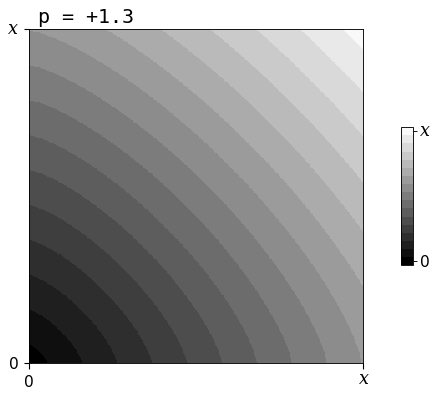


 33%|███▎      | 202/617 [01:35<03:15,  2.13it/s]

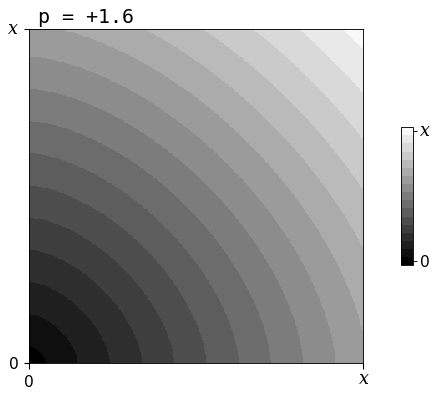


 33%|███▎      | 203/617 [01:36<03:13,  2.13it/s]

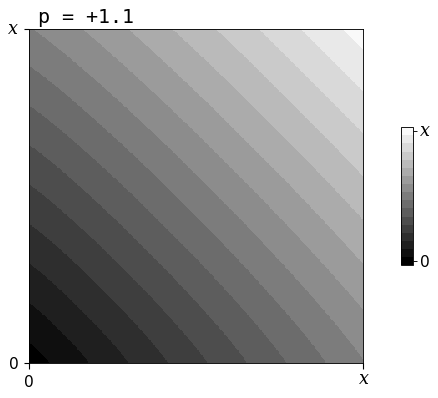


 33%|███▎      | 204/617 [01:36<03:13,  2.14it/s]

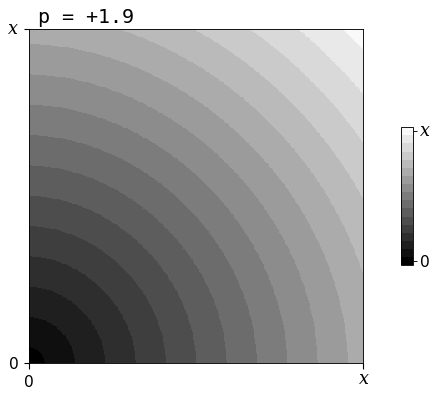


 33%|███▎      | 205/617 [01:37<03:13,  2.13it/s]

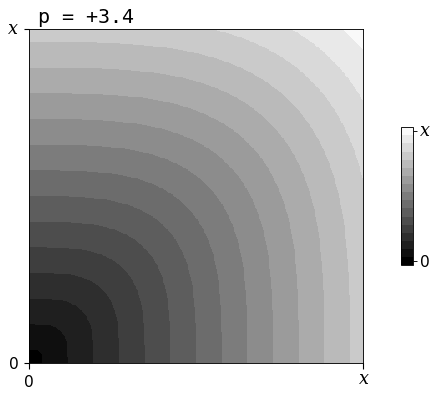


 33%|███▎      | 206/617 [01:37<03:18,  2.07it/s]

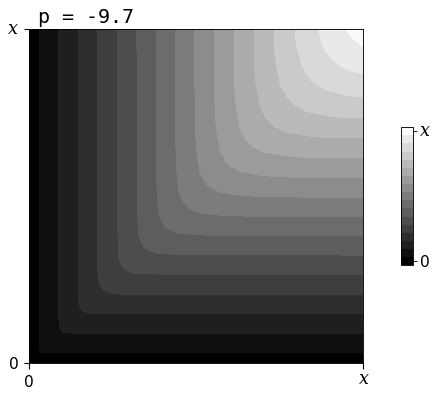


 34%|███▎      | 207/617 [01:38<03:16,  2.09it/s]

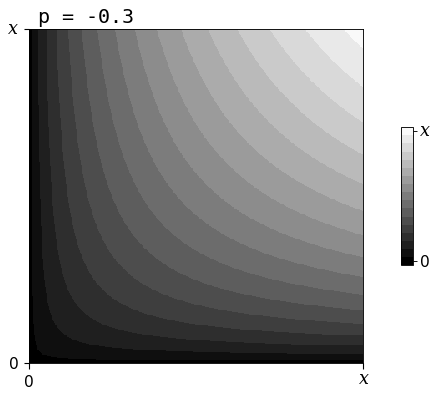


 34%|███▎      | 208/617 [01:38<03:14,  2.10it/s]

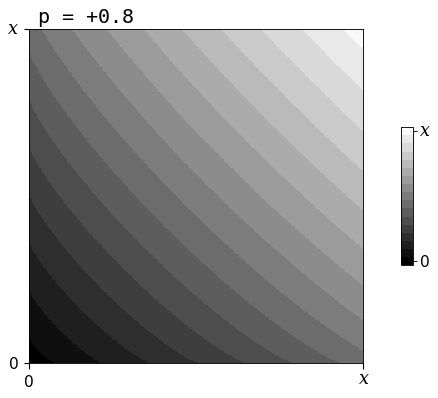


 34%|███▍      | 209/617 [01:39<03:12,  2.12it/s]

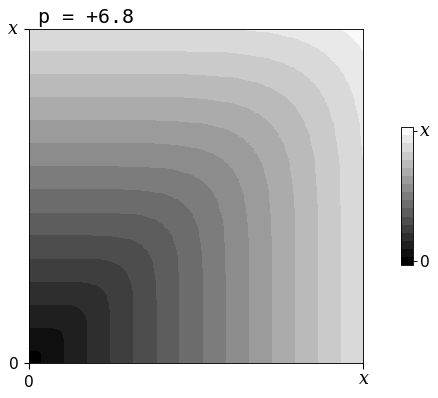


 34%|███▍      | 210/617 [01:39<03:11,  2.13it/s]

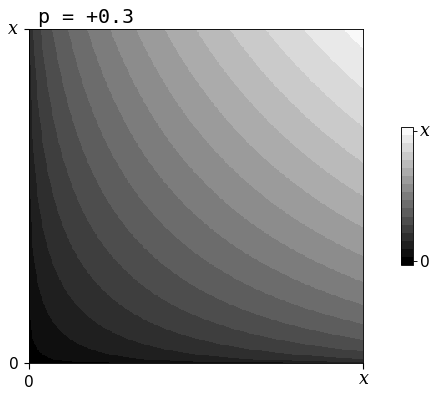


 34%|███▍      | 211/617 [01:40<03:10,  2.13it/s]

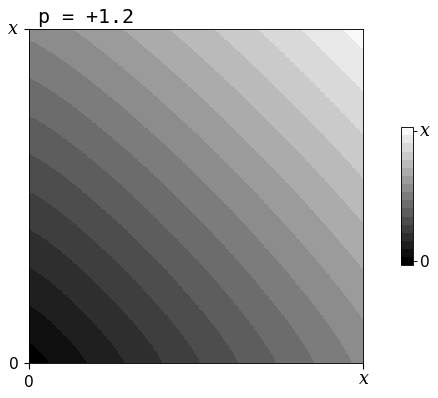


 34%|███▍      | 212/617 [01:40<03:09,  2.14it/s]

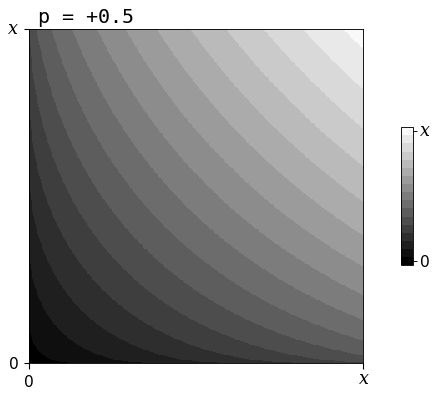


 35%|███▍      | 213/617 [01:41<03:08,  2.14it/s]

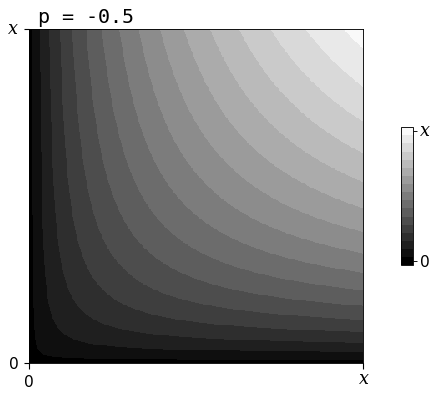


 35%|███▍      | 214/617 [01:41<03:08,  2.13it/s]

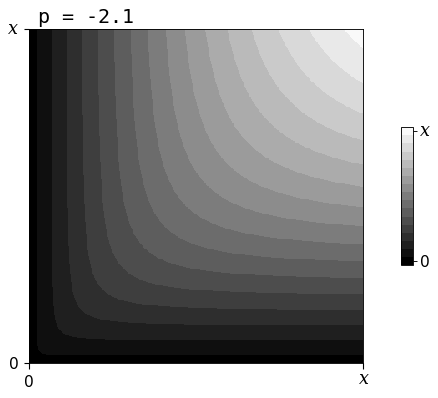


 35%|███▍      | 215/617 [01:42<03:08,  2.13it/s]

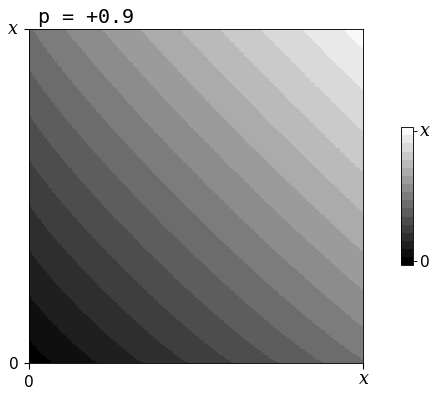


 35%|███▌      | 216/617 [01:42<03:08,  2.13it/s]

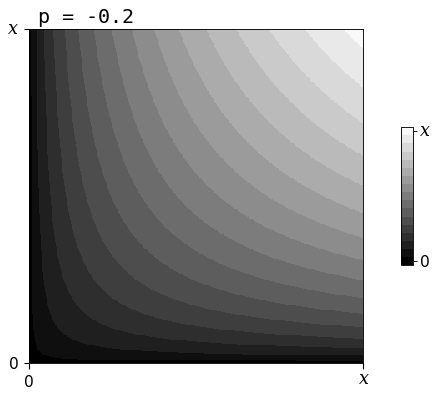


 35%|███▌      | 217/617 [01:43<03:13,  2.07it/s]

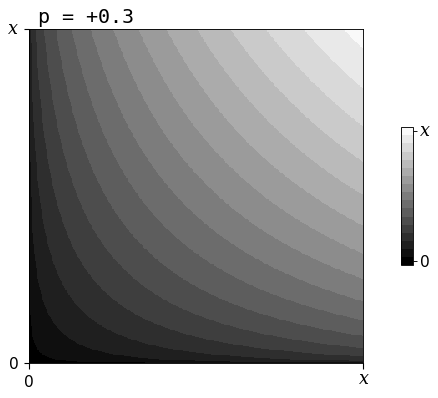


 35%|███▌      | 218/617 [01:43<03:11,  2.09it/s]

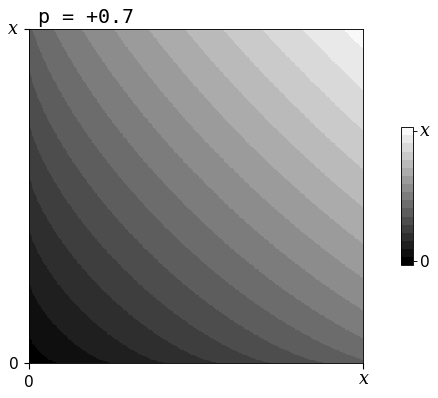


 35%|███▌      | 219/617 [01:44<03:09,  2.10it/s]

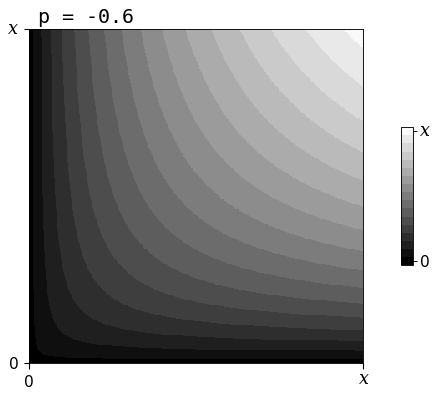


 36%|███▌      | 220/617 [01:44<03:07,  2.11it/s]

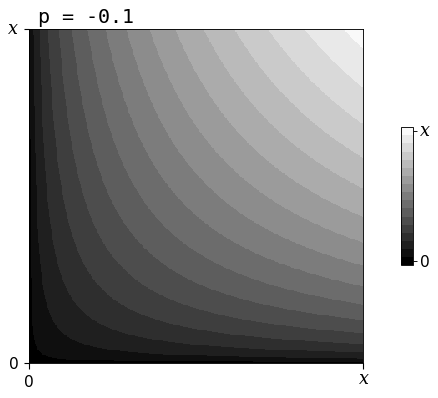


 36%|███▌      | 221/617 [01:44<03:07,  2.11it/s]

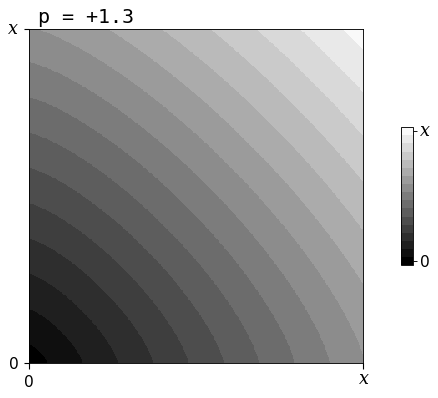


 36%|███▌      | 222/617 [01:45<03:05,  2.13it/s]

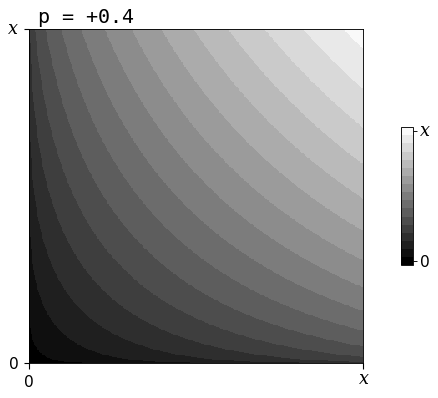


 36%|███▌      | 223/617 [01:45<03:05,  2.13it/s]

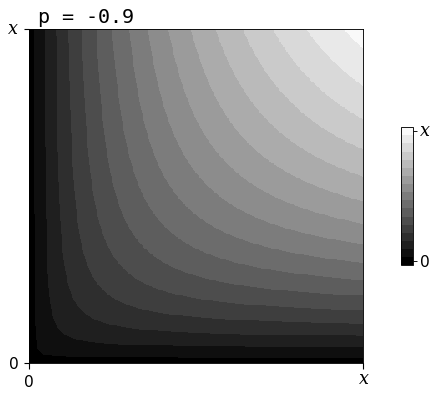


 36%|███▋      | 224/617 [01:46<03:05,  2.12it/s]

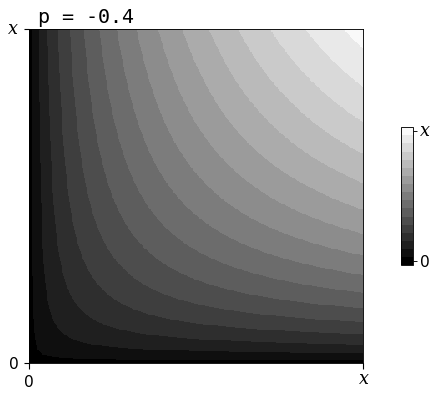


 36%|███▋      | 225/617 [01:46<03:04,  2.13it/s]

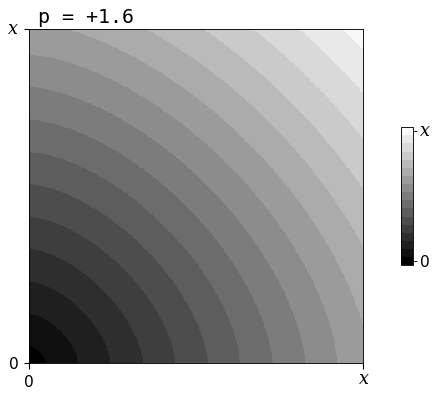


 37%|███▋      | 226/617 [01:47<03:03,  2.13it/s]

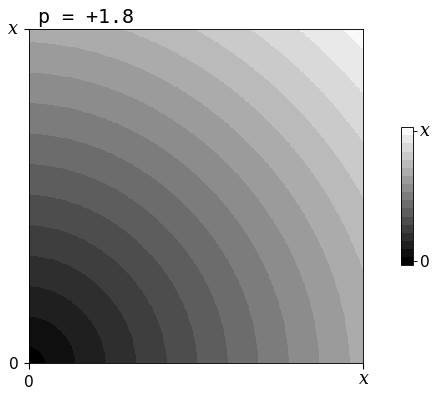


 37%|███▋      | 227/617 [01:47<03:03,  2.12it/s]

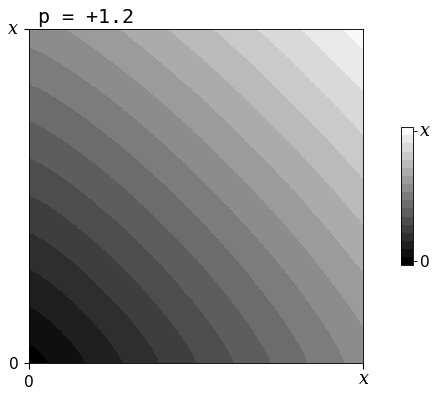


 37%|███▋      | 228/617 [01:48<03:09,  2.05it/s]

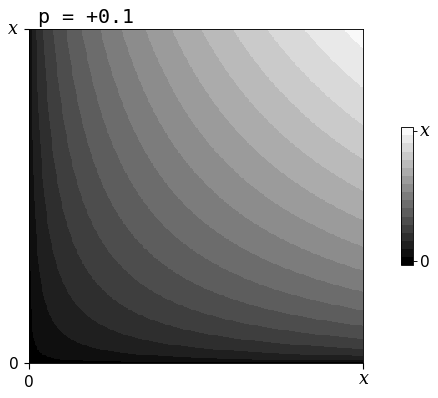


 37%|███▋      | 229/617 [01:48<03:07,  2.07it/s]

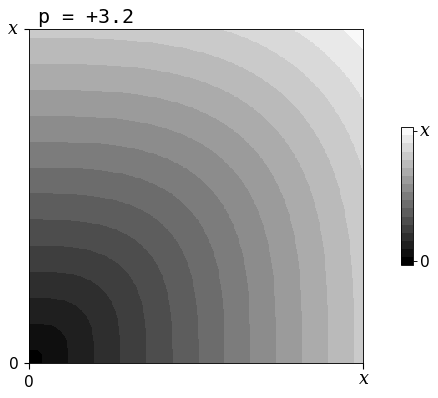


 37%|███▋      | 230/617 [01:49<03:05,  2.08it/s]

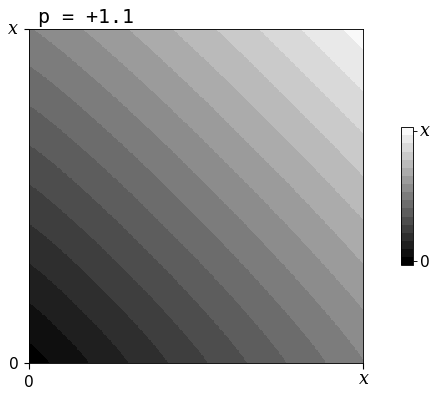


 37%|███▋      | 231/617 [01:49<03:03,  2.10it/s]

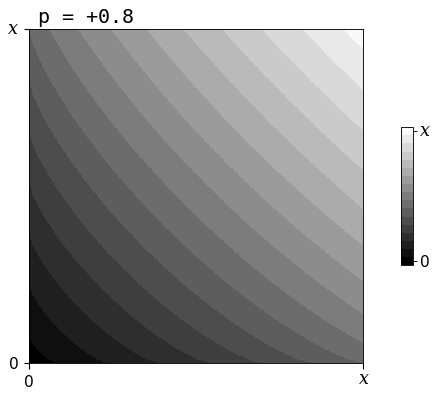


 38%|███▊      | 232/617 [01:50<03:02,  2.11it/s]

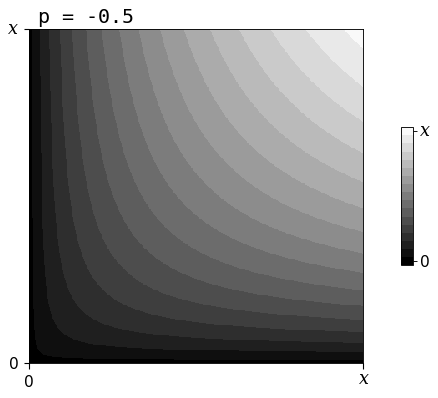


 38%|███▊      | 233/617 [01:50<03:01,  2.11it/s]

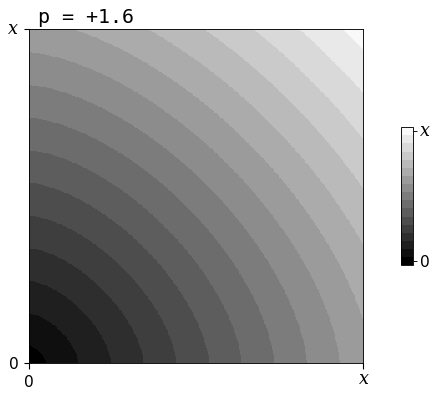


 38%|███▊      | 234/617 [01:51<03:01,  2.11it/s]

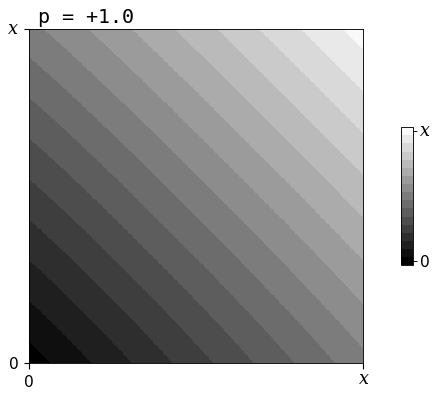


 38%|███▊      | 235/617 [01:51<03:01,  2.11it/s]

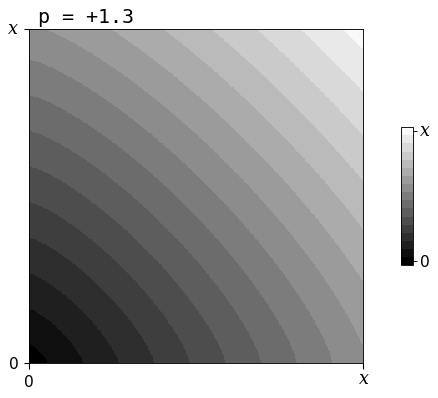


 38%|███▊      | 236/617 [01:52<02:59,  2.12it/s]

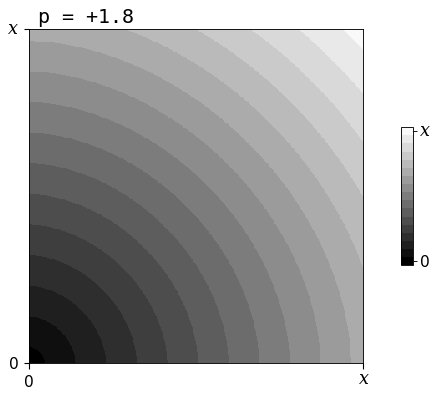


 38%|███▊      | 237/617 [01:52<02:58,  2.13it/s]

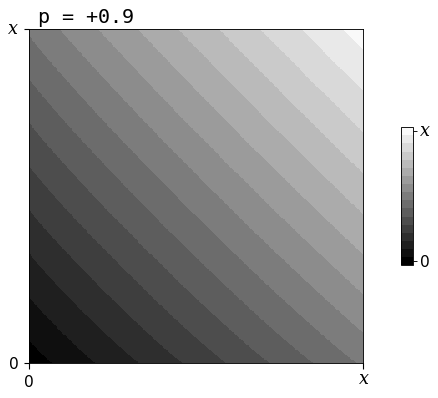


 39%|███▊      | 238/617 [01:53<02:57,  2.14it/s]

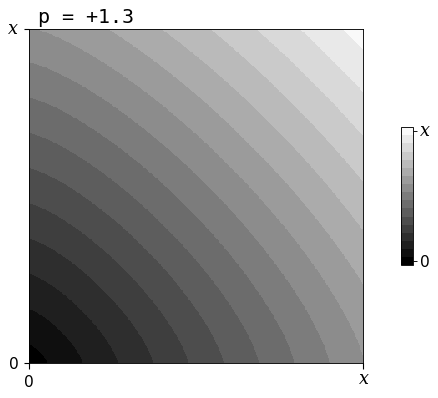


 39%|███▊      | 239/617 [01:53<03:02,  2.07it/s]

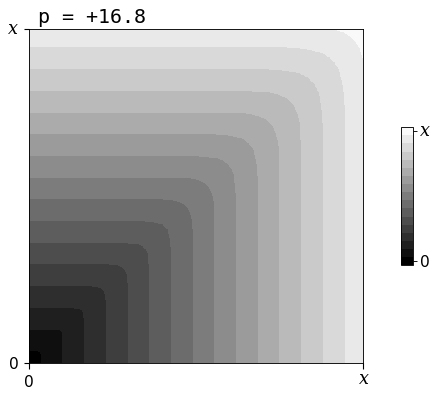


 39%|███▉      | 240/617 [01:53<03:00,  2.09it/s]

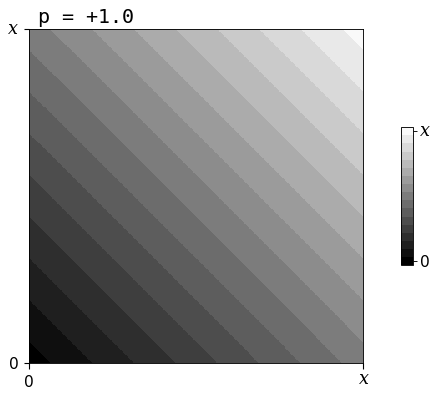


 39%|███▉      | 241/617 [01:54<02:57,  2.11it/s]

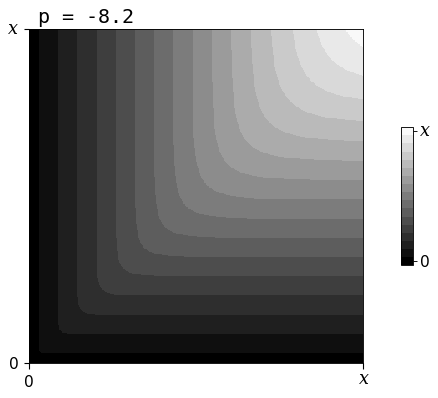


 39%|███▉      | 242/617 [01:54<02:56,  2.13it/s]

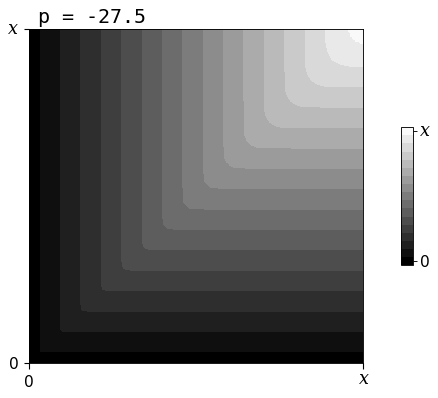


 39%|███▉      | 243/617 [01:55<02:55,  2.13it/s]

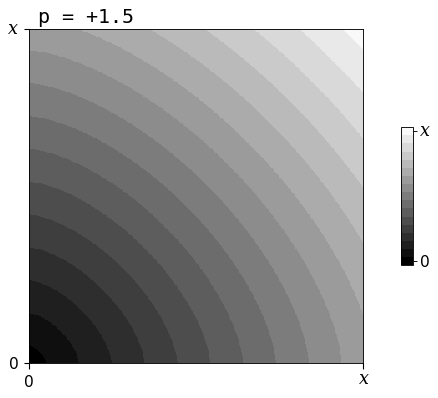


 40%|███▉      | 244/617 [01:55<02:54,  2.14it/s]

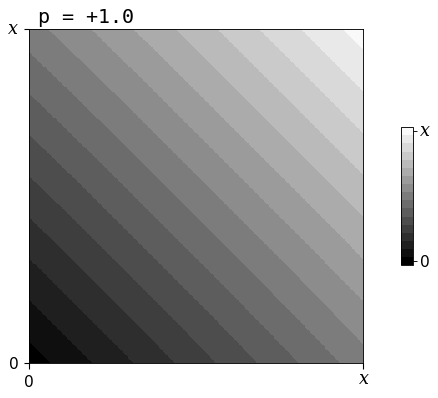


 40%|███▉      | 245/617 [01:56<02:53,  2.15it/s]

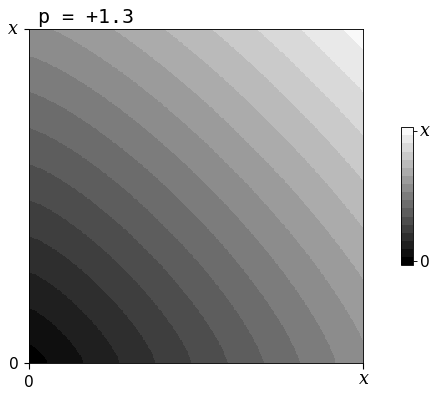


 40%|███▉      | 246/617 [01:56<02:52,  2.15it/s]

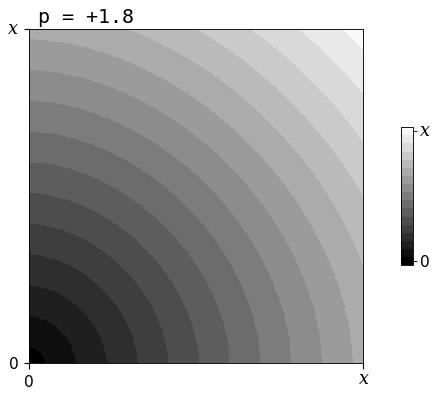


 40%|████      | 247/617 [01:57<02:52,  2.15it/s]

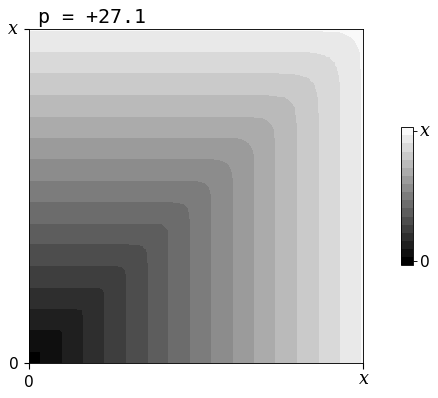


 40%|████      | 248/617 [01:57<02:52,  2.14it/s]

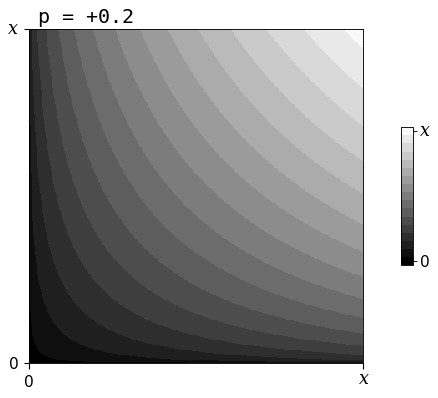


 40%|████      | 249/617 [01:58<02:51,  2.14it/s]

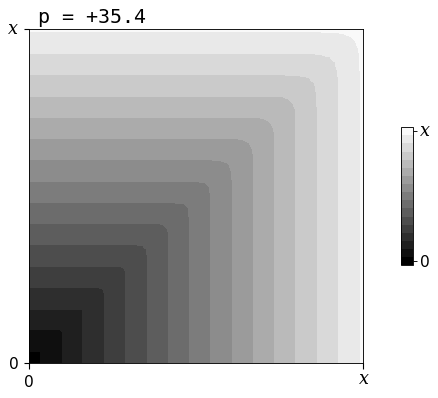


 41%|████      | 250/617 [01:58<02:57,  2.07it/s]

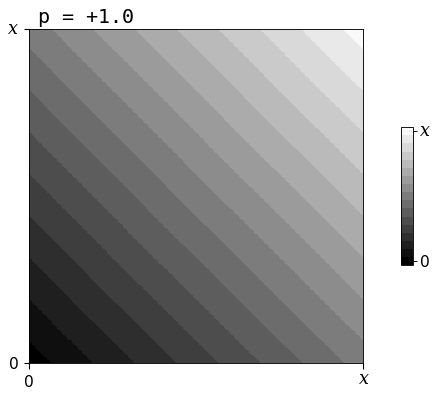


 41%|████      | 251/617 [01:59<02:54,  2.10it/s]

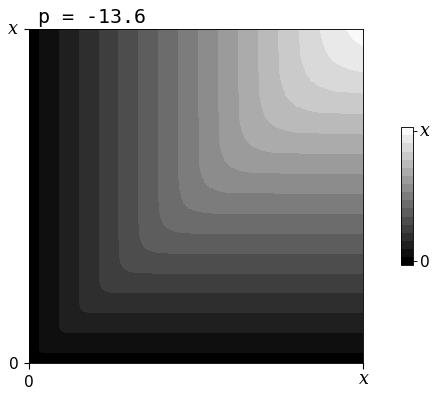


 41%|████      | 252/617 [01:59<02:53,  2.11it/s]

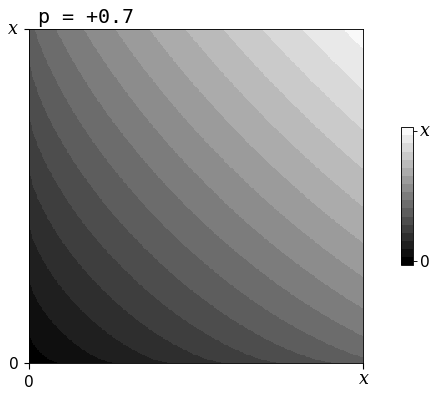


 41%|████      | 253/617 [02:00<02:51,  2.12it/s]

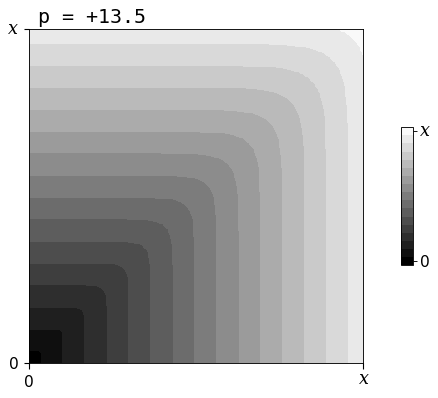


 41%|████      | 254/617 [02:00<02:50,  2.12it/s]

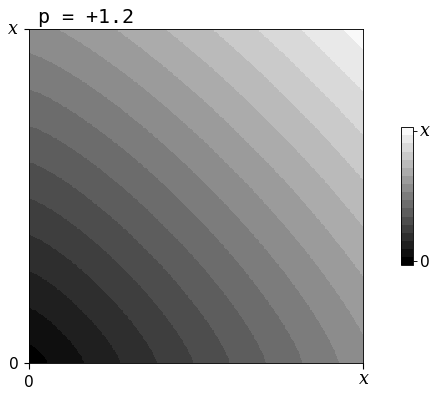


 41%|████▏     | 255/617 [02:01<02:50,  2.13it/s]

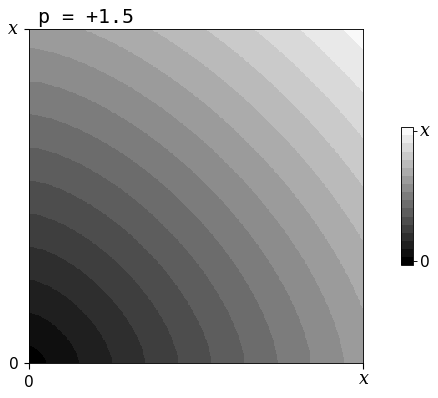


 41%|████▏     | 256/617 [02:01<02:49,  2.13it/s]

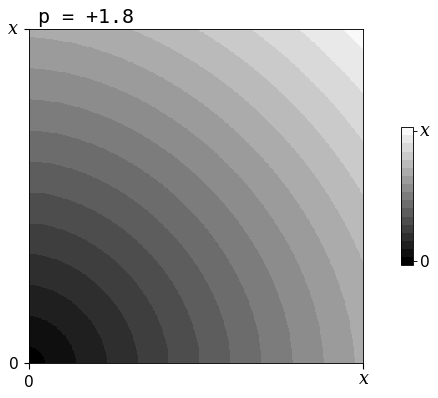


 42%|████▏     | 257/617 [02:01<02:48,  2.14it/s]

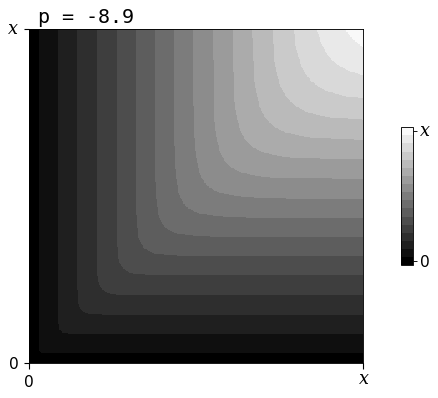


 42%|████▏     | 258/617 [02:02<02:48,  2.13it/s]

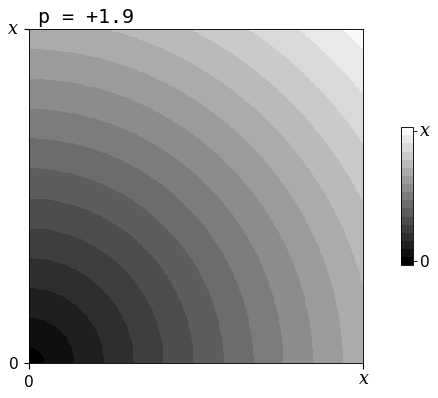


 42%|████▏     | 259/617 [02:02<02:47,  2.13it/s]

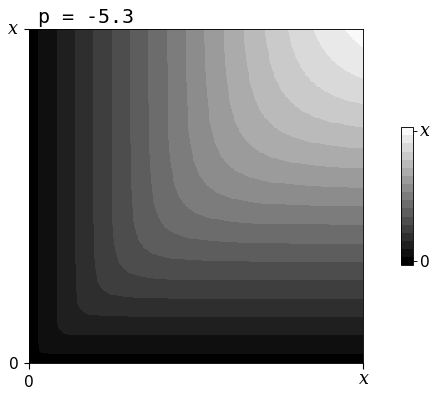


 42%|████▏     | 260/617 [02:03<02:48,  2.11it/s]

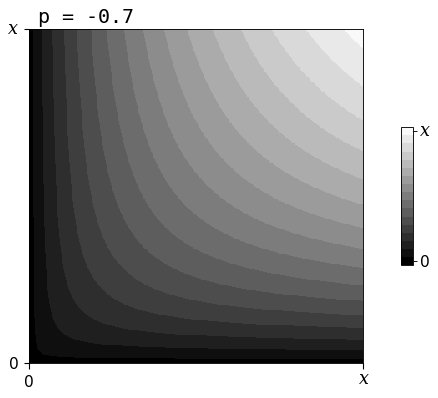


 42%|████▏     | 261/617 [02:03<02:54,  2.04it/s]

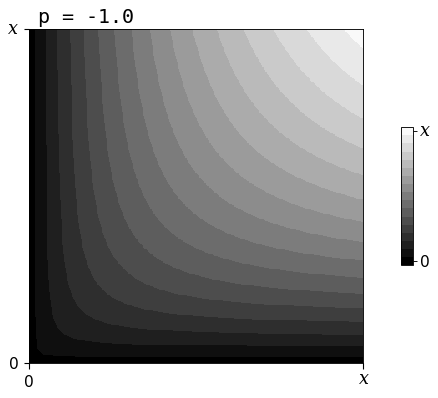


 42%|████▏     | 262/617 [02:04<02:52,  2.06it/s]

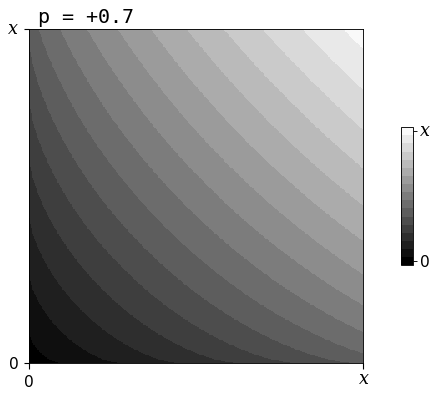


 43%|████▎     | 263/617 [02:04<02:50,  2.08it/s]

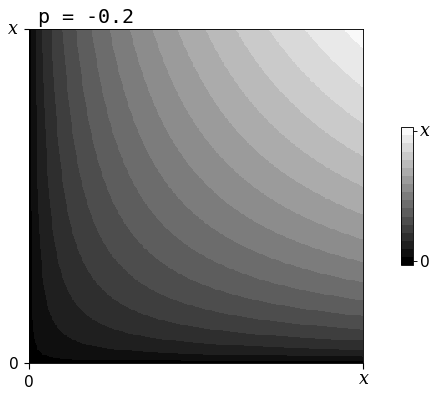


 43%|████▎     | 264/617 [02:05<02:48,  2.10it/s]

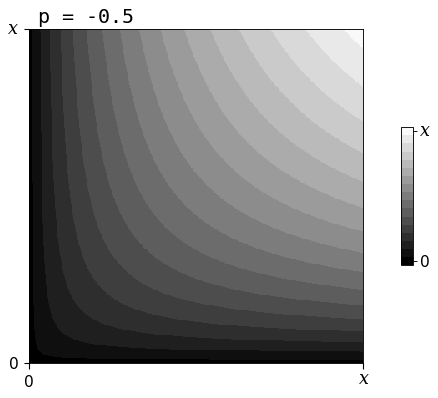


 43%|████▎     | 265/617 [02:05<02:47,  2.10it/s]

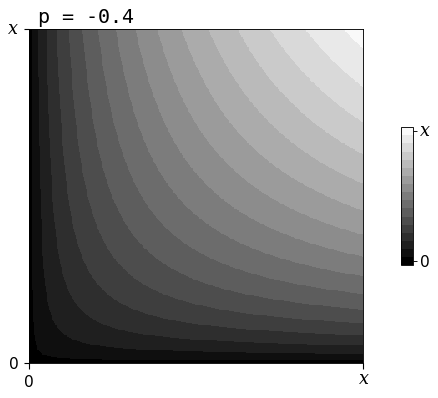


 43%|████▎     | 266/617 [02:06<02:46,  2.11it/s]

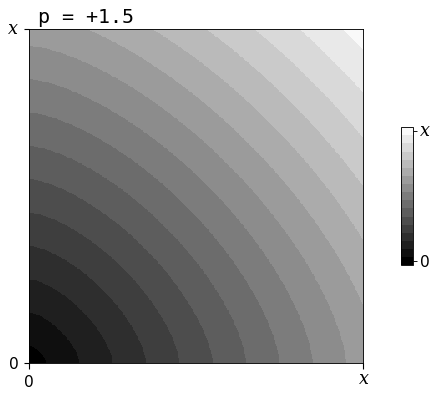


 43%|████▎     | 267/617 [02:06<02:45,  2.12it/s]

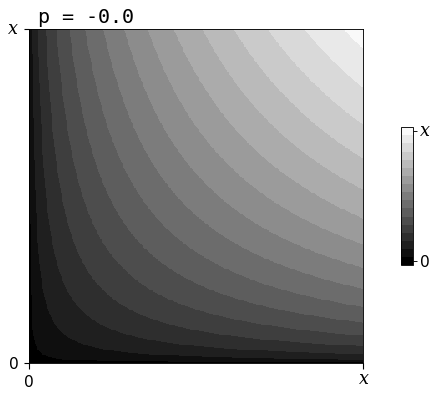


 43%|████▎     | 268/617 [02:07<02:44,  2.12it/s]

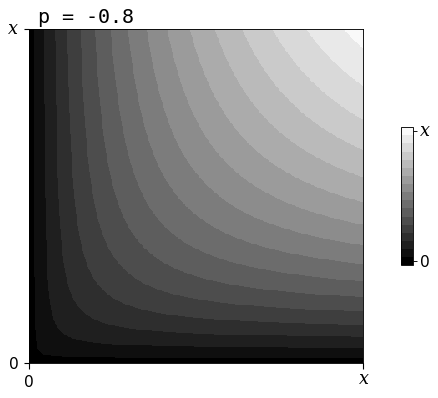


 44%|████▎     | 269/617 [02:07<02:44,  2.12it/s]

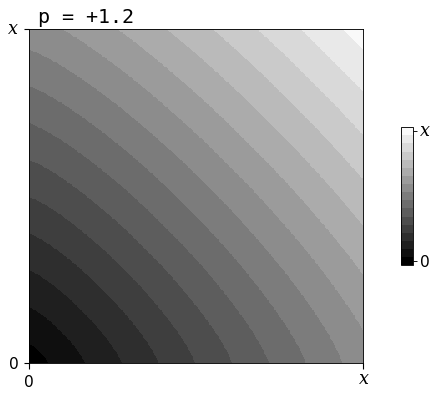


 44%|████▍     | 270/617 [02:08<02:45,  2.10it/s]

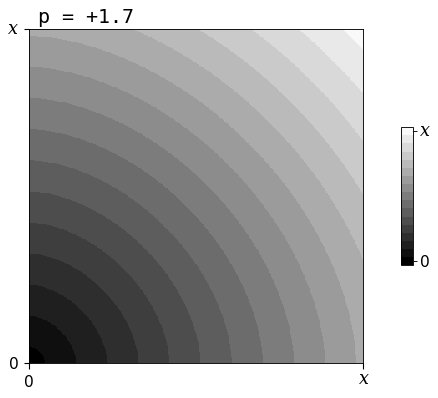


 44%|████▍     | 271/617 [02:08<02:46,  2.08it/s]

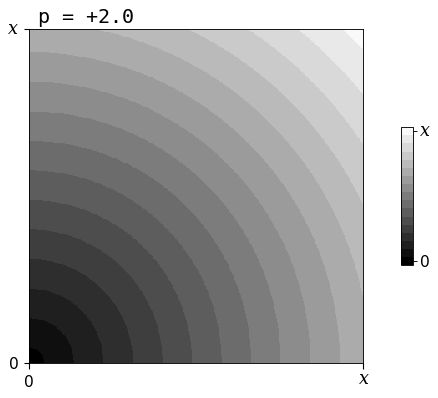


 44%|████▍     | 272/617 [02:09<02:53,  1.99it/s]

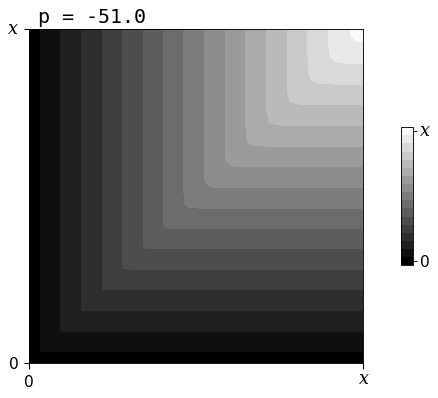


 44%|████▍     | 273/617 [02:09<03:06,  1.84it/s]

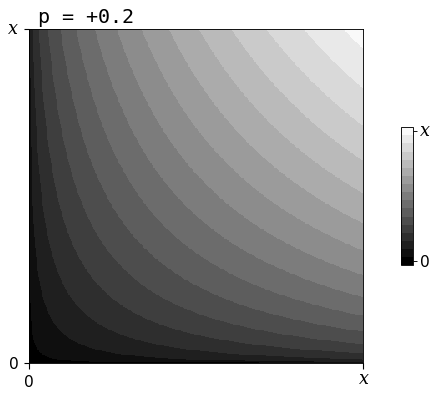


 44%|████▍     | 274/617 [02:10<03:03,  1.87it/s]

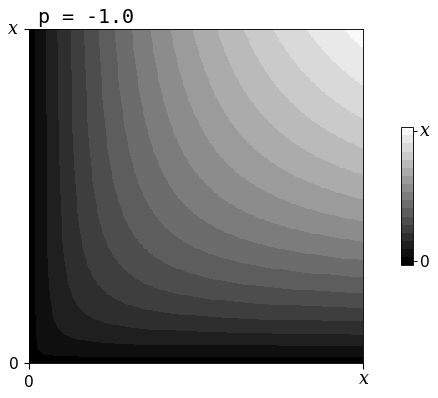


 45%|████▍     | 275/617 [02:10<02:57,  1.92it/s]

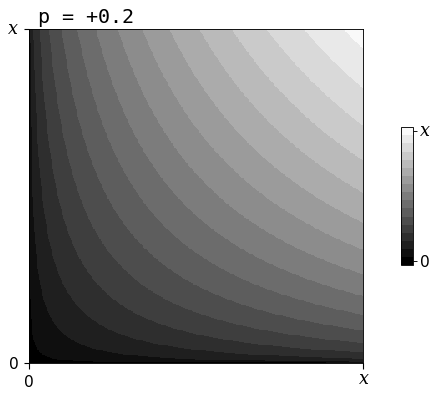


 45%|████▍     | 276/617 [02:11<02:52,  1.98it/s]

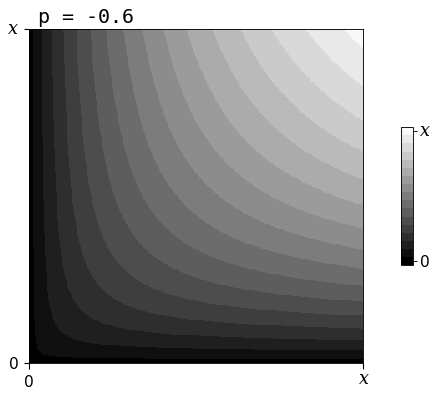


 45%|████▍     | 277/617 [02:11<02:47,  2.03it/s]

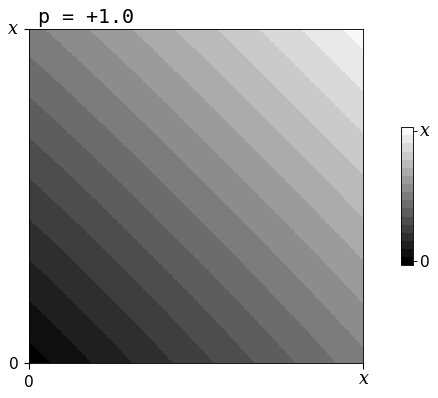


 45%|████▌     | 278/617 [02:12<02:44,  2.06it/s]

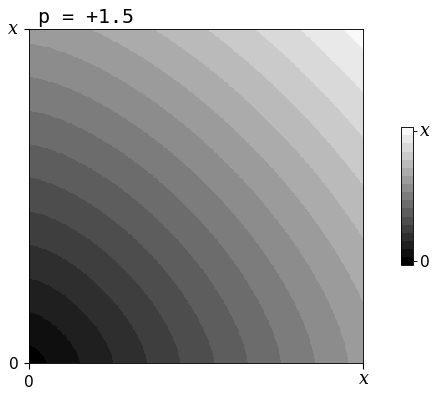


 45%|████▌     | 279/617 [02:12<02:43,  2.07it/s]

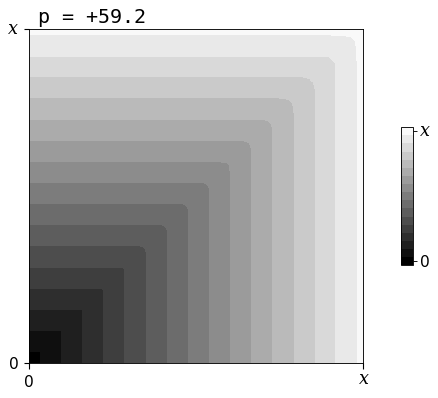


 45%|████▌     | 280/617 [02:13<02:43,  2.07it/s]

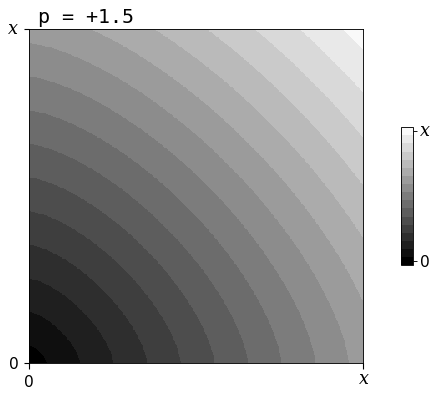


 46%|████▌     | 281/617 [02:13<02:41,  2.09it/s]

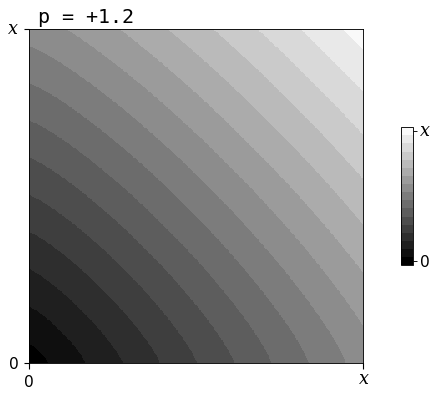


 46%|████▌     | 282/617 [02:14<02:38,  2.11it/s]

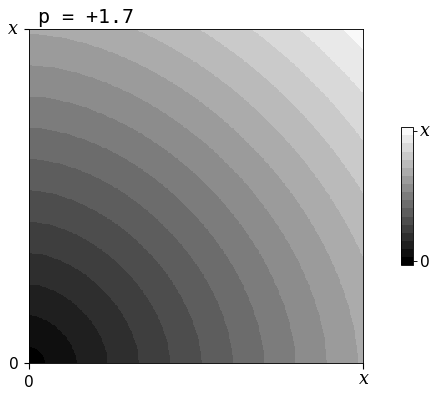


 46%|████▌     | 283/617 [02:14<02:43,  2.05it/s]

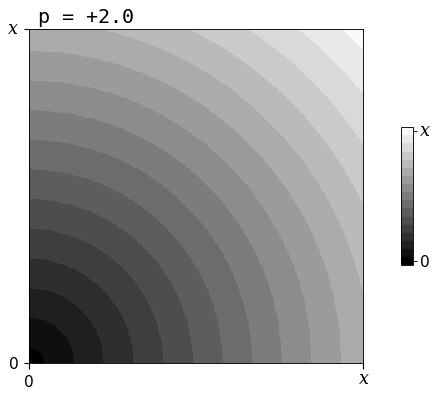


 46%|████▌     | 284/617 [02:15<02:40,  2.07it/s]

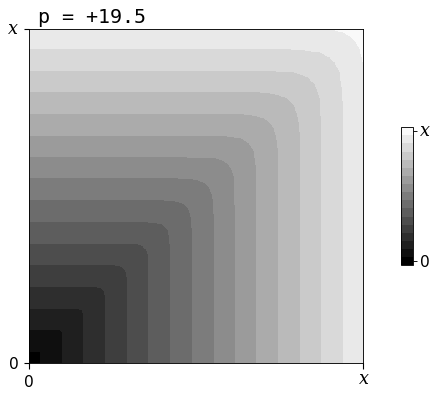


 46%|████▌     | 285/617 [02:15<02:38,  2.10it/s]

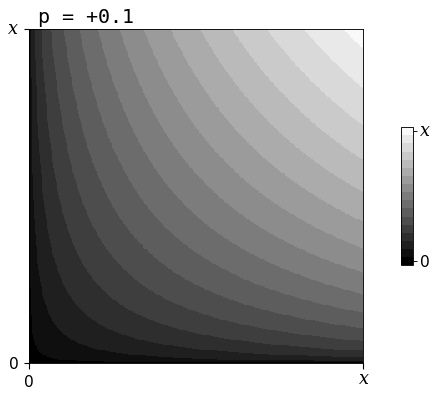


 46%|████▋     | 286/617 [02:16<02:37,  2.11it/s]

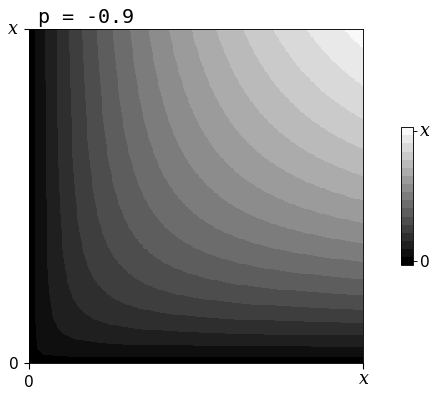


 47%|████▋     | 287/617 [02:16<02:35,  2.12it/s]

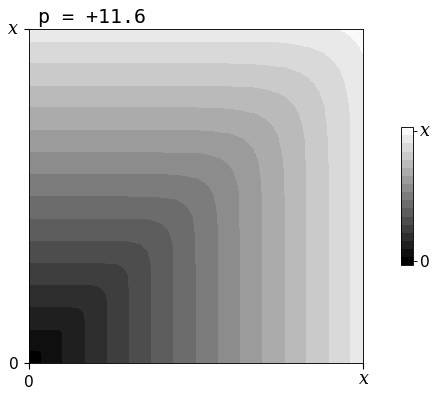


 47%|████▋     | 288/617 [02:17<02:35,  2.12it/s]

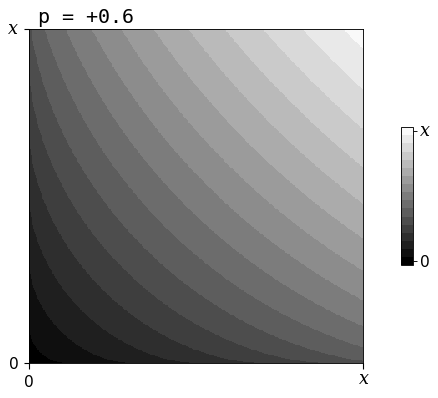


 47%|████▋     | 289/617 [02:17<02:35,  2.11it/s]

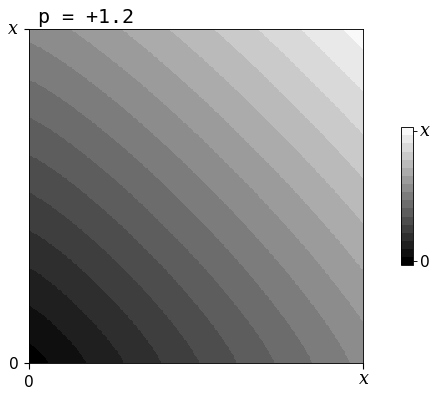


 47%|████▋     | 290/617 [02:17<02:34,  2.12it/s]

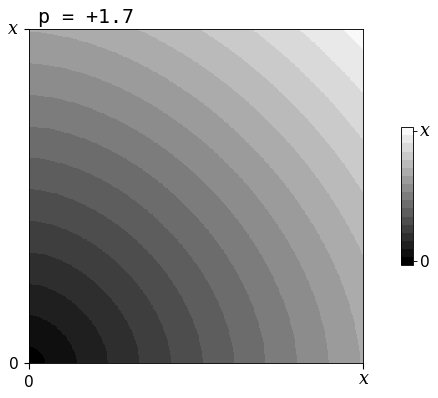


 47%|████▋     | 291/617 [02:18<02:33,  2.13it/s]

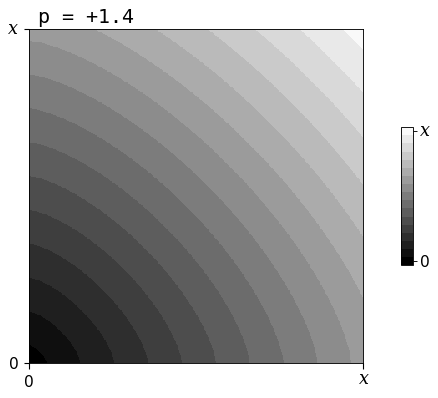


 47%|████▋     | 292/617 [02:18<02:32,  2.13it/s]

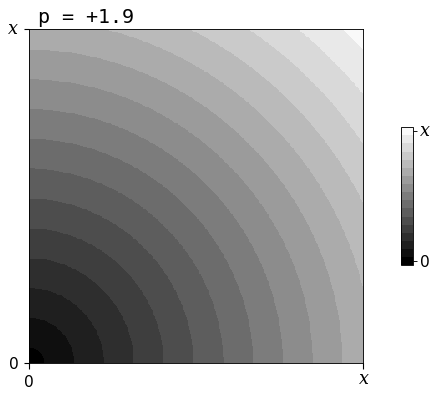


 47%|████▋     | 293/617 [02:19<02:31,  2.14it/s]

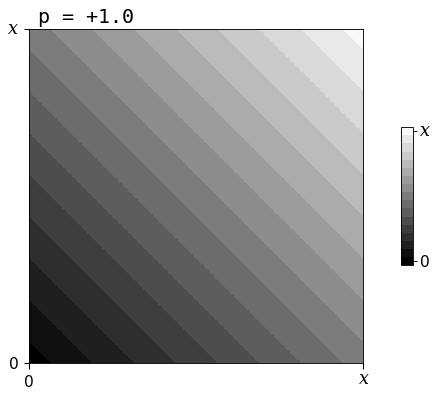


 48%|████▊     | 294/617 [02:19<02:35,  2.08it/s]

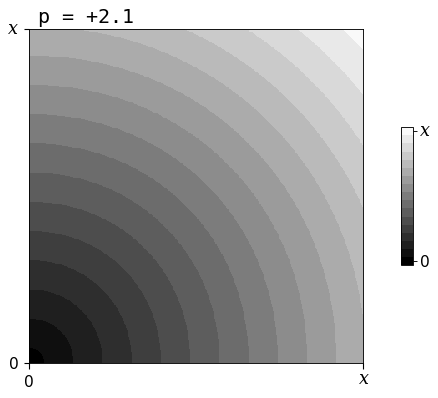


 48%|████▊     | 295/617 [02:20<02:33,  2.10it/s]

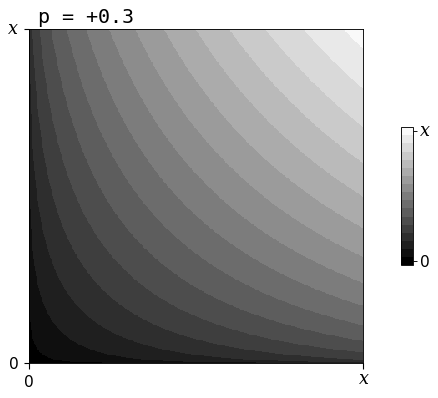


 48%|████▊     | 296/617 [02:20<02:32,  2.11it/s]

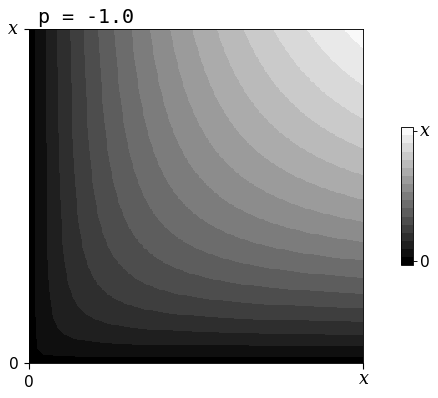


 48%|████▊     | 297/617 [02:21<02:31,  2.11it/s]

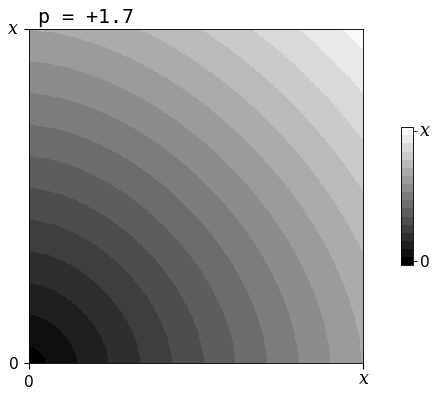


 48%|████▊     | 298/617 [02:21<02:30,  2.12it/s]

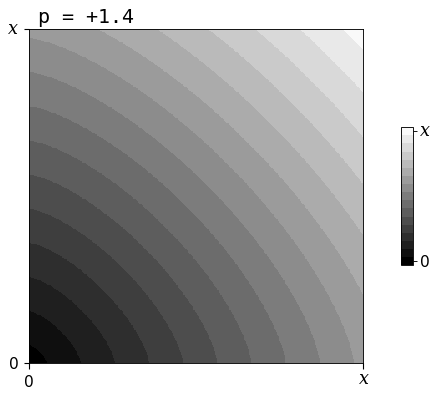


 48%|████▊     | 299/617 [02:22<02:28,  2.13it/s]

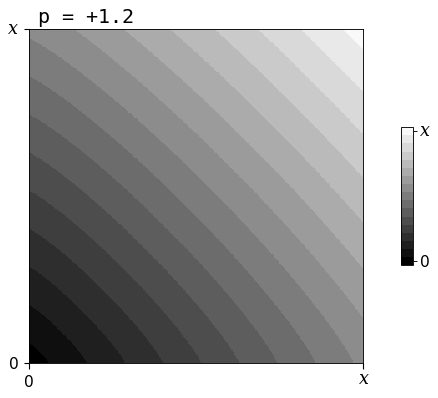


 49%|████▊     | 300/617 [02:22<02:29,  2.13it/s]

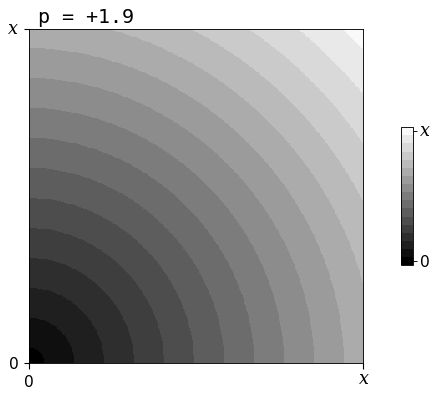


 49%|████▉     | 301/617 [02:23<02:29,  2.12it/s]

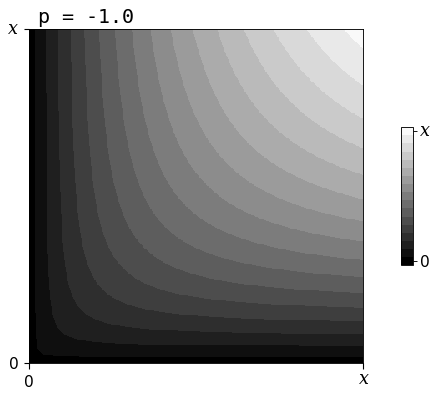


 49%|████▉     | 302/617 [02:23<02:28,  2.12it/s]

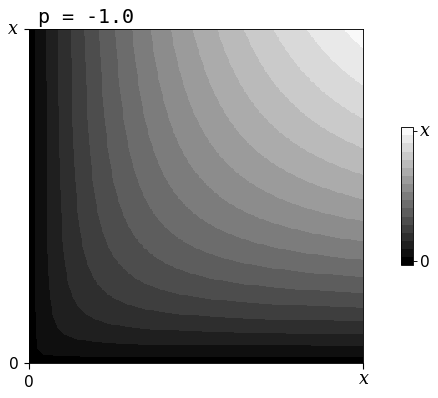


 49%|████▉     | 303/617 [02:24<02:27,  2.13it/s]

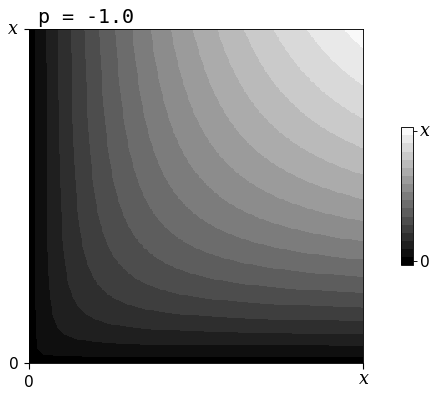


 49%|████▉     | 304/617 [02:24<02:26,  2.13it/s]

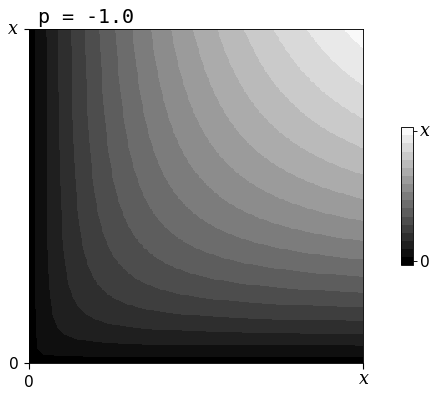


 49%|████▉     | 305/617 [02:25<02:31,  2.06it/s]

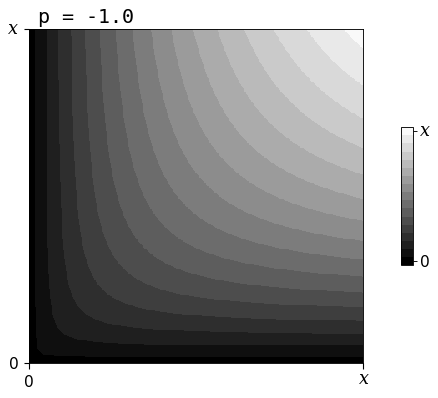


 50%|████▉     | 306/617 [02:25<02:29,  2.08it/s]

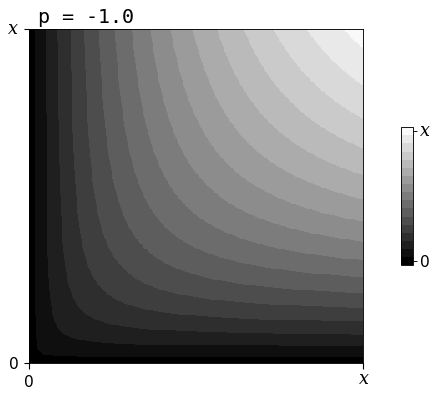


 50%|████▉     | 307/617 [02:26<02:27,  2.10it/s]

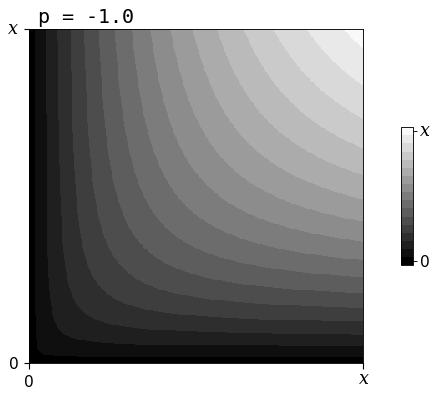


 50%|████▉     | 308/617 [02:26<02:26,  2.11it/s]

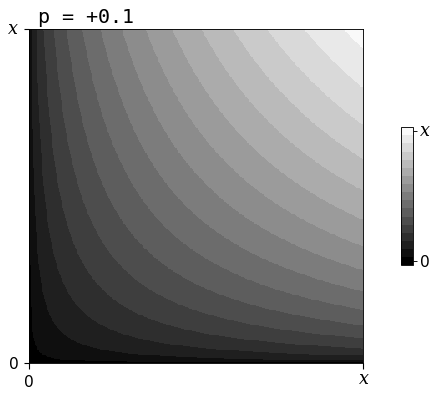


 50%|█████     | 309/617 [02:26<02:25,  2.12it/s]

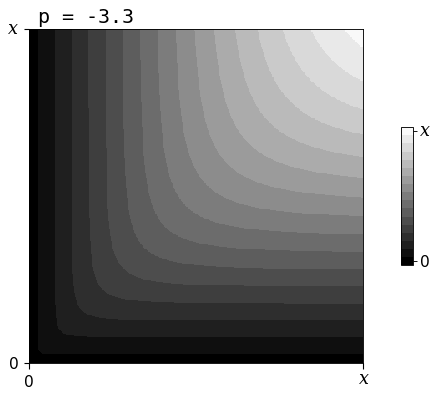


 50%|█████     | 310/617 [02:27<02:24,  2.12it/s]

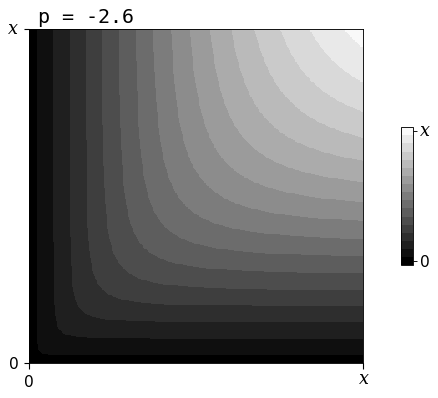


 50%|█████     | 311/617 [02:27<02:23,  2.13it/s]

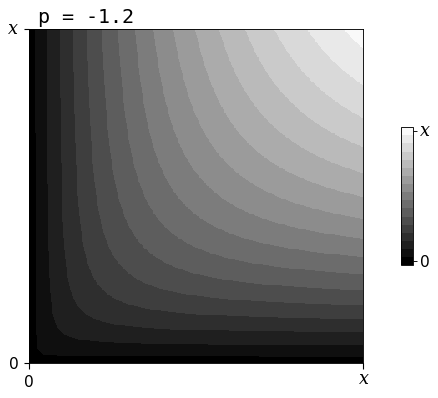


 51%|█████     | 312/617 [02:28<02:23,  2.13it/s]

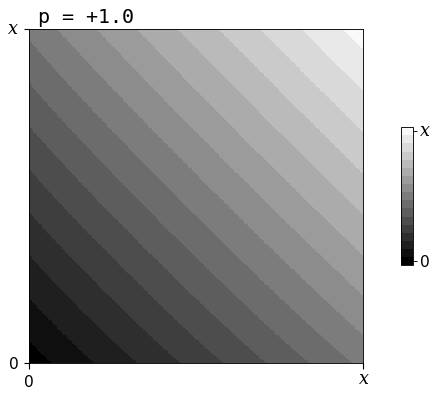


 51%|█████     | 313/617 [02:28<02:22,  2.14it/s]

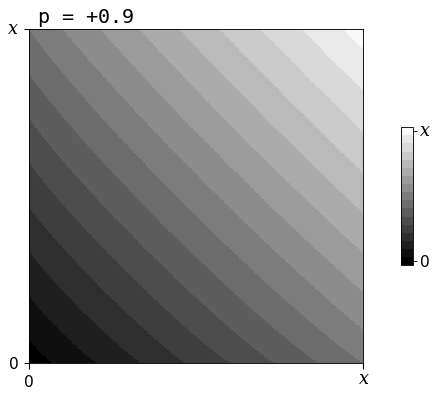


 51%|█████     | 314/617 [02:29<02:21,  2.14it/s]

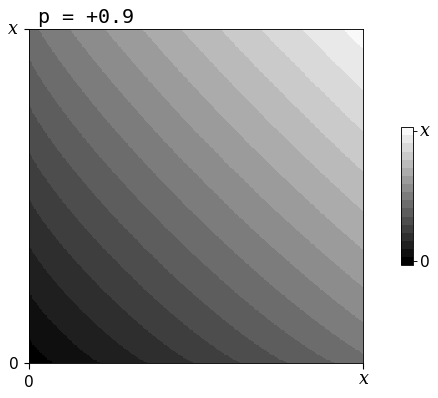


 51%|█████     | 315/617 [02:29<02:21,  2.14it/s]

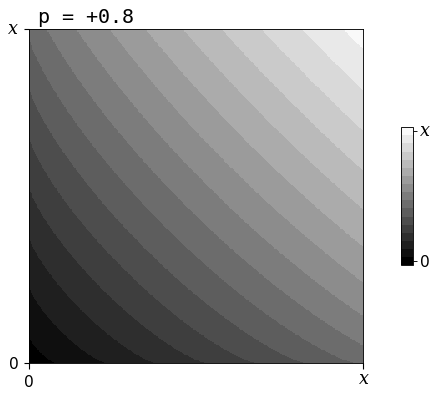


 51%|█████     | 316/617 [02:30<02:24,  2.09it/s]

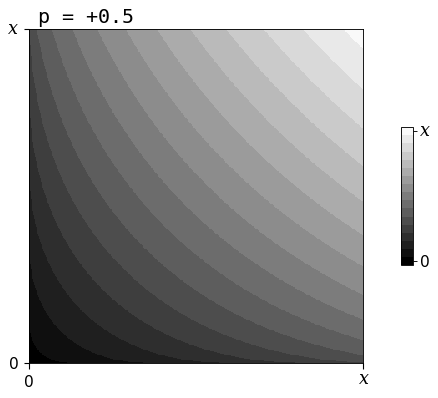


 51%|█████▏    | 317/617 [02:30<02:22,  2.10it/s]

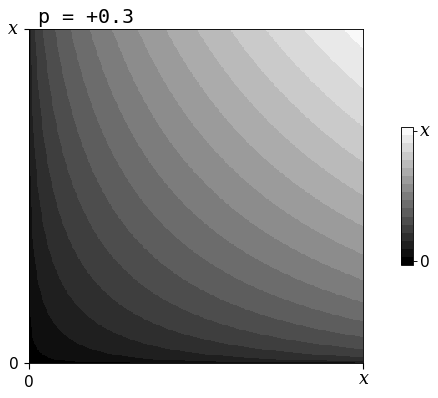


 52%|█████▏    | 318/617 [02:31<02:22,  2.10it/s]

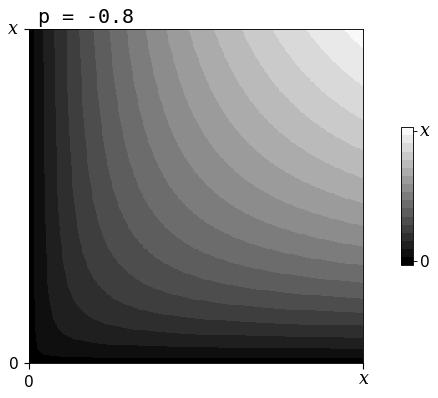


 52%|█████▏    | 319/617 [02:31<02:21,  2.11it/s]

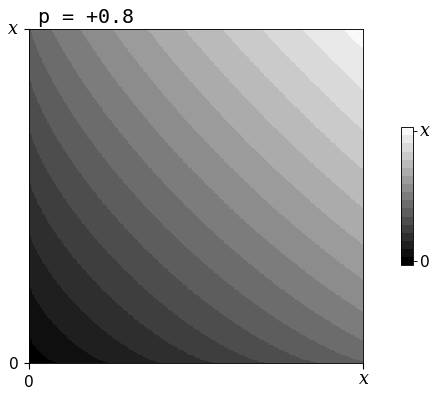


 52%|█████▏    | 320/617 [02:32<02:20,  2.11it/s]

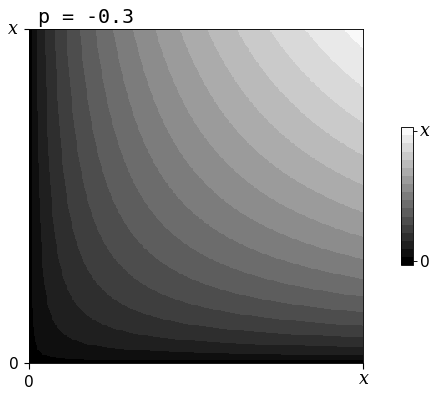


 52%|█████▏    | 321/617 [02:32<02:19,  2.12it/s]

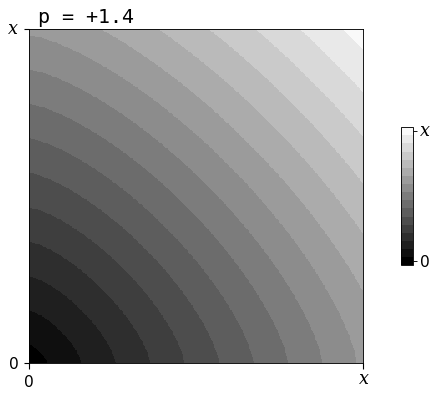


 52%|█████▏    | 322/617 [02:33<02:18,  2.13it/s]

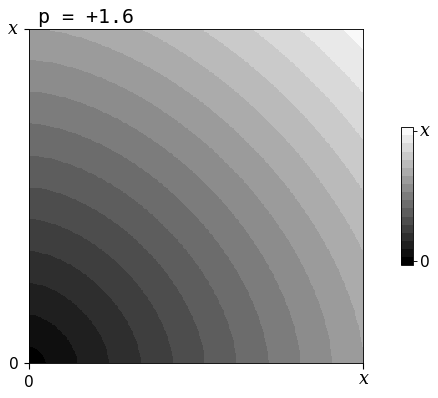


 52%|█████▏    | 323/617 [02:33<02:19,  2.11it/s]

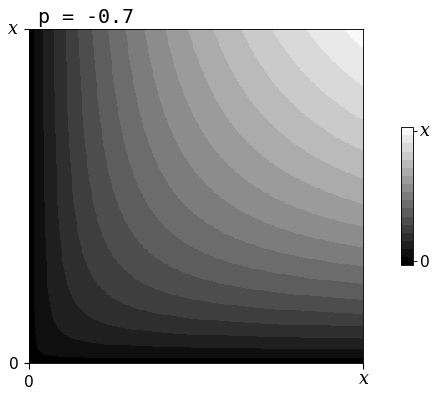


 53%|█████▎    | 324/617 [02:34<02:17,  2.12it/s]

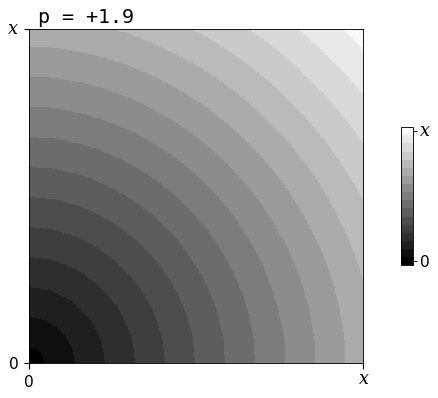


 53%|█████▎    | 325/617 [02:34<02:16,  2.13it/s]

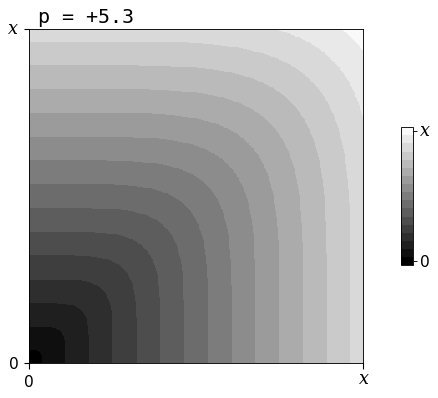


 53%|█████▎    | 326/617 [02:34<02:16,  2.14it/s]

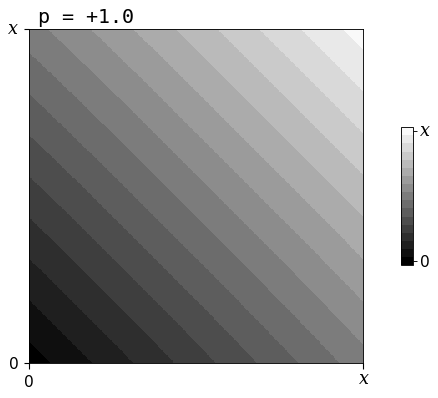


 53%|█████▎    | 327/617 [02:35<02:20,  2.07it/s]

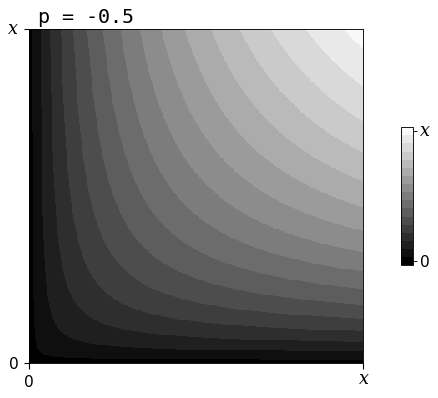


 53%|█████▎    | 328/617 [02:35<02:18,  2.09it/s]

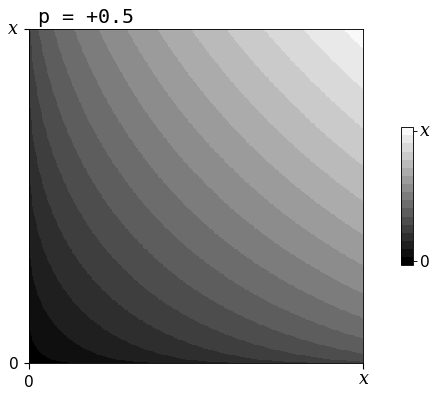


 53%|█████▎    | 329/617 [02:36<02:17,  2.10it/s]

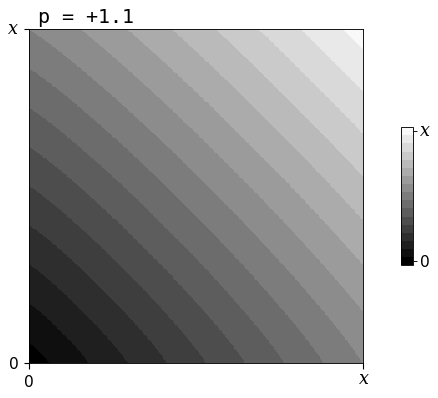


 53%|█████▎    | 330/617 [02:36<02:15,  2.11it/s]

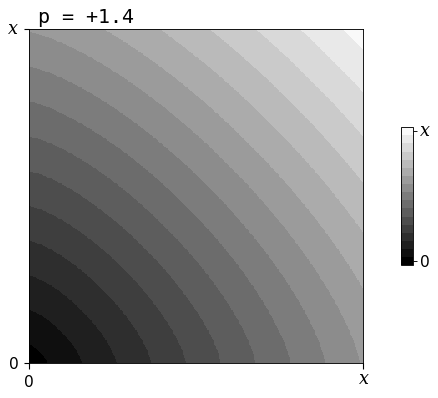


 54%|█████▎    | 331/617 [02:37<02:14,  2.13it/s]

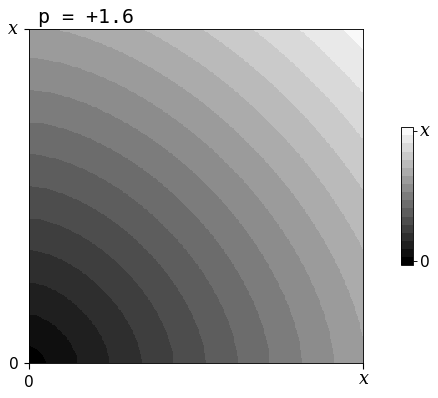


 54%|█████▍    | 332/617 [02:37<02:13,  2.13it/s]

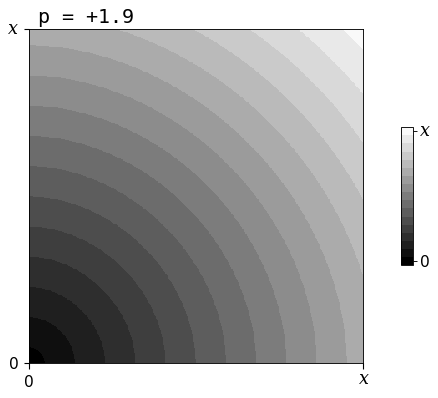


 54%|█████▍    | 333/617 [02:38<02:12,  2.14it/s]

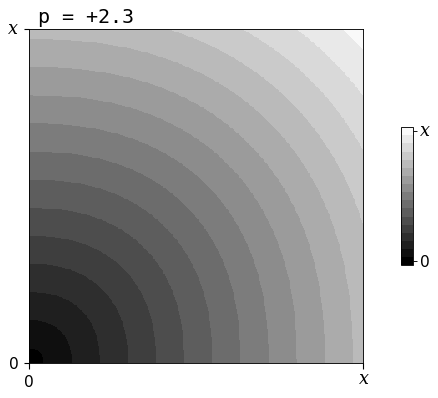


 54%|█████▍    | 334/617 [02:38<02:12,  2.14it/s]

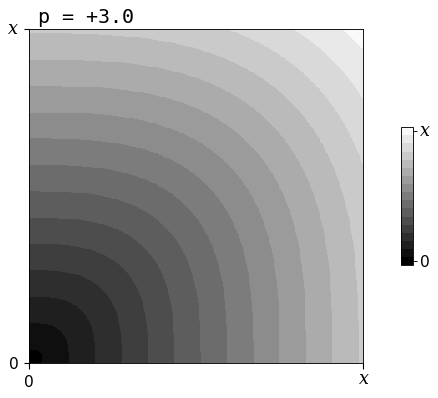


 54%|█████▍    | 335/617 [02:39<02:12,  2.13it/s]

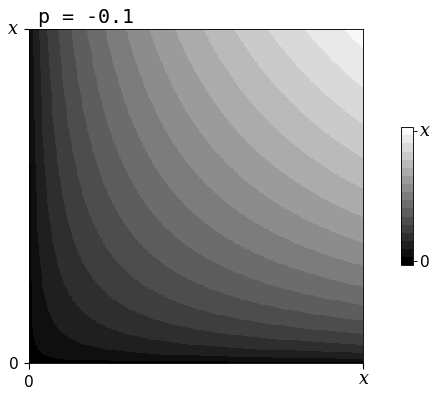


 54%|█████▍    | 336/617 [02:39<02:11,  2.14it/s]

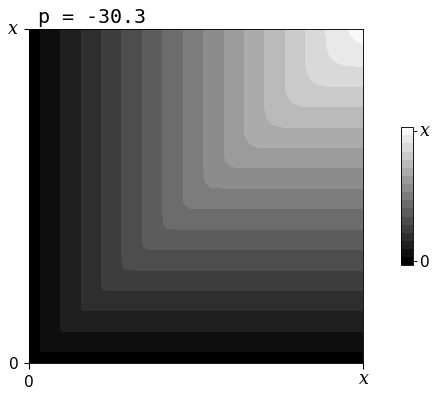


 55%|█████▍    | 337/617 [02:40<02:10,  2.14it/s]

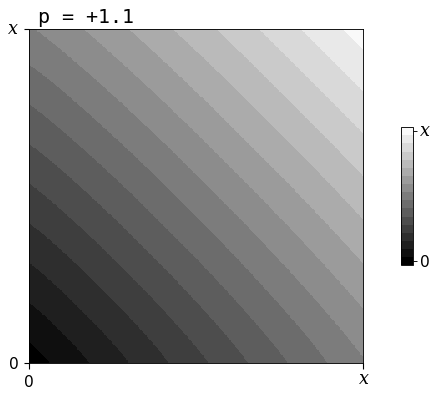


 55%|█████▍    | 338/617 [02:40<02:13,  2.09it/s]

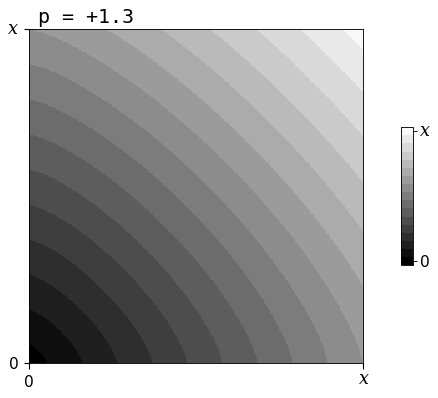


 55%|█████▍    | 339/617 [02:41<02:12,  2.10it/s]

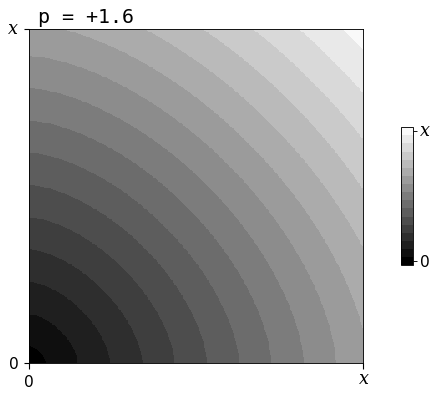


 55%|█████▌    | 340/617 [02:41<02:10,  2.12it/s]

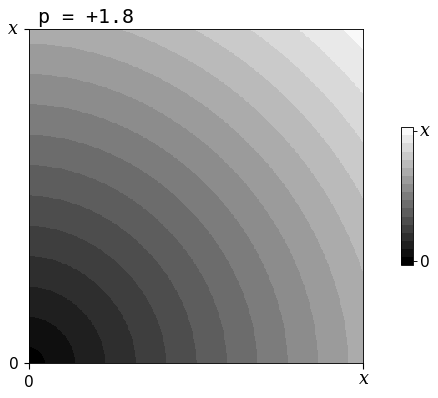


 55%|█████▌    | 341/617 [02:42<02:09,  2.13it/s]

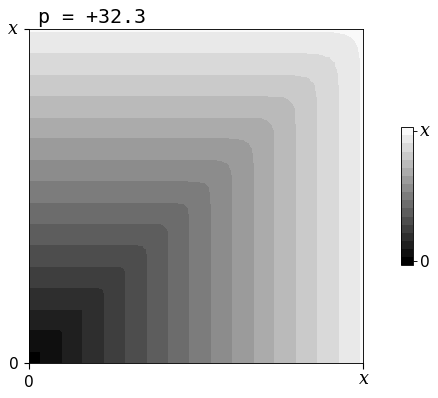


 55%|█████▌    | 342/617 [02:42<02:09,  2.13it/s]

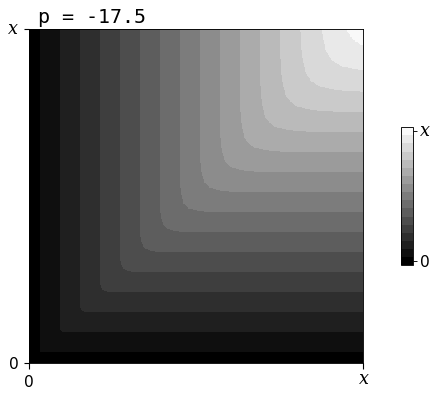


 56%|█████▌    | 343/617 [02:42<02:08,  2.13it/s]

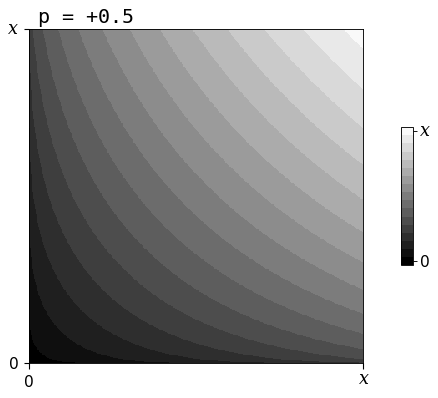


 56%|█████▌    | 344/617 [02:43<02:08,  2.13it/s]

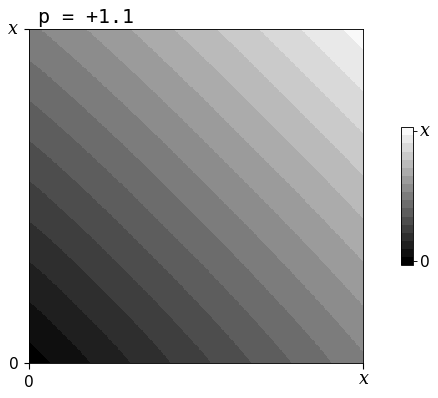


 56%|█████▌    | 345/617 [02:43<02:07,  2.13it/s]

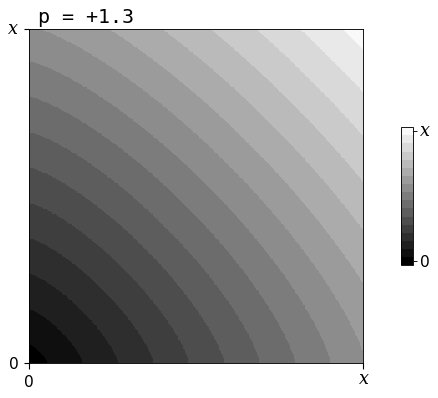


 56%|█████▌    | 346/617 [02:44<02:06,  2.14it/s]

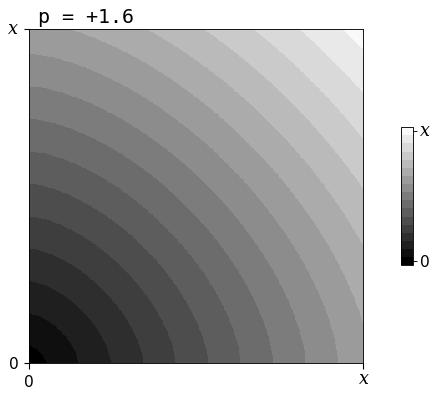


 56%|█████▌    | 347/617 [02:44<02:06,  2.14it/s]

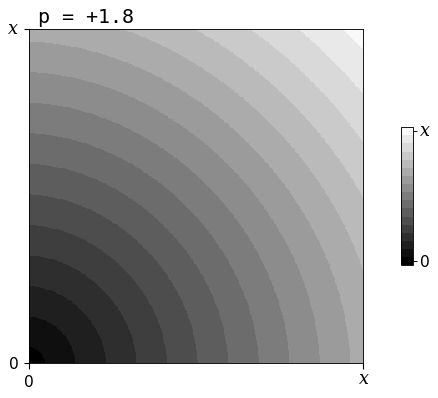


 56%|█████▋    | 348/617 [02:45<02:05,  2.14it/s]

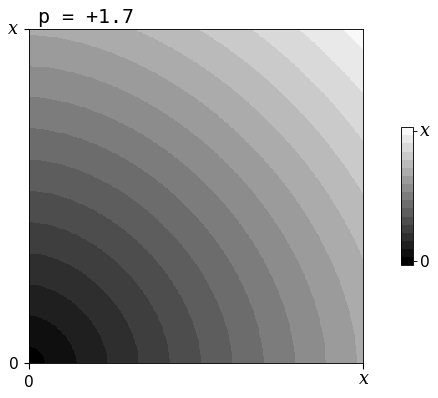


 57%|█████▋    | 349/617 [02:45<02:09,  2.07it/s]

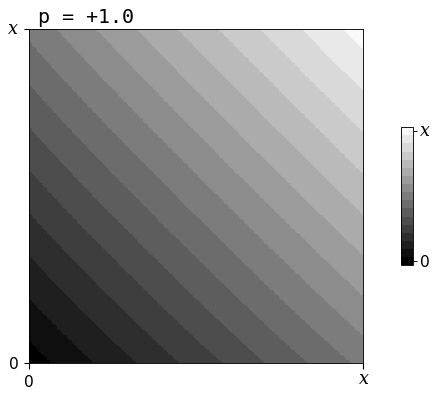


 57%|█████▋    | 350/617 [02:46<02:07,  2.09it/s]

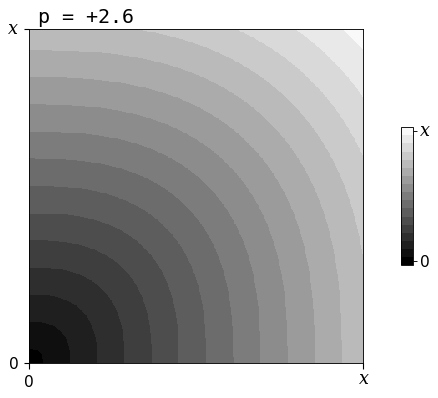


 57%|█████▋    | 351/617 [02:46<02:06,  2.10it/s]

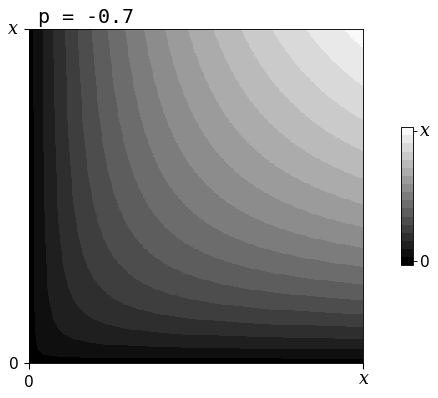


 57%|█████▋    | 352/617 [02:47<02:05,  2.11it/s]

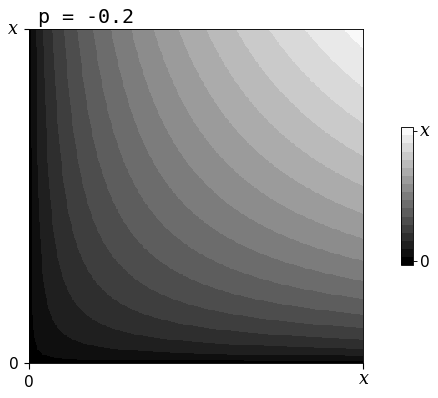


 57%|█████▋    | 353/617 [02:47<02:04,  2.12it/s]

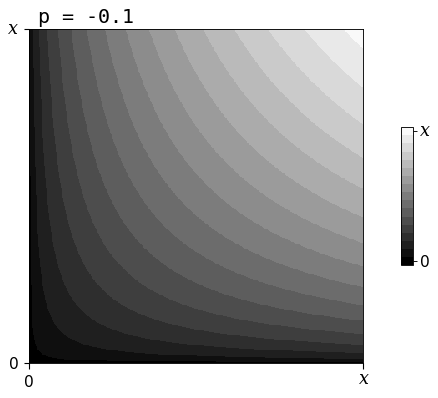


 57%|█████▋    | 354/617 [02:48<02:04,  2.11it/s]

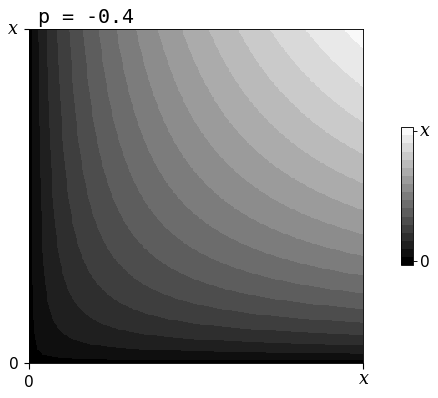


 58%|█████▊    | 355/617 [02:48<02:03,  2.12it/s]

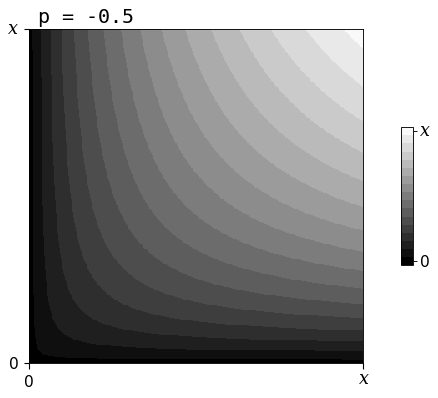


 58%|█████▊    | 356/617 [02:49<02:03,  2.11it/s]

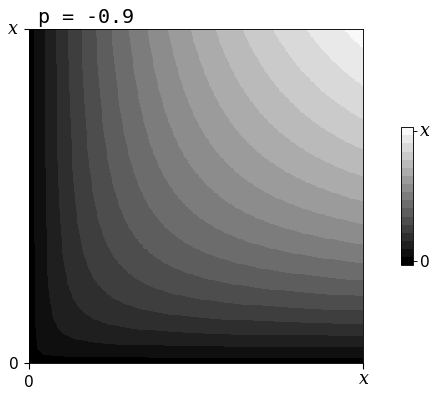


 58%|█████▊    | 357/617 [02:49<02:02,  2.12it/s]

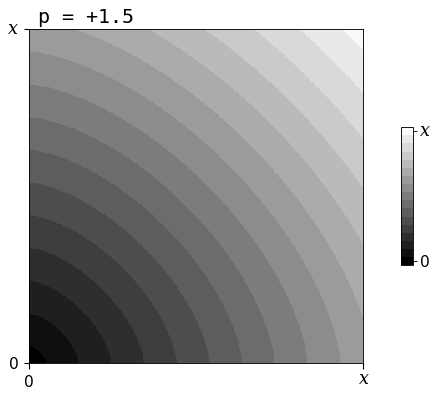


 58%|█████▊    | 358/617 [02:50<02:01,  2.13it/s]

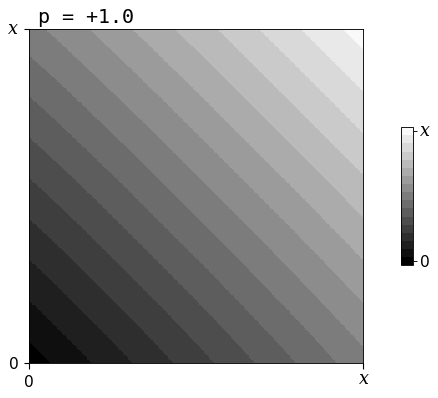


 58%|█████▊    | 359/617 [02:50<02:00,  2.13it/s]

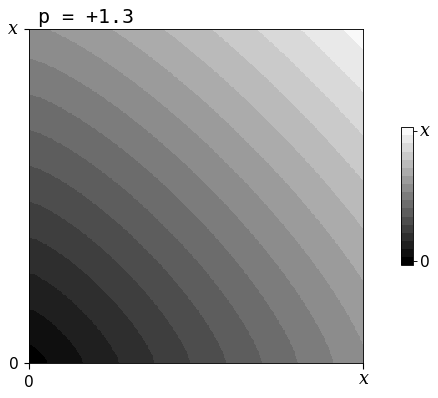


 58%|█████▊    | 360/617 [02:51<02:04,  2.07it/s]

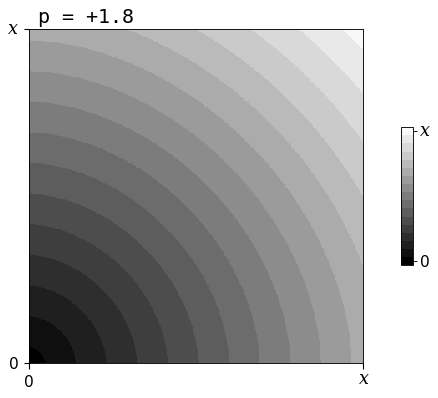


 59%|█████▊    | 361/617 [02:51<02:02,  2.10it/s]

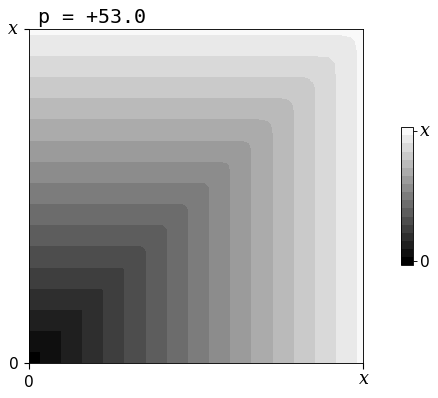


 59%|█████▊    | 362/617 [02:51<02:00,  2.11it/s]

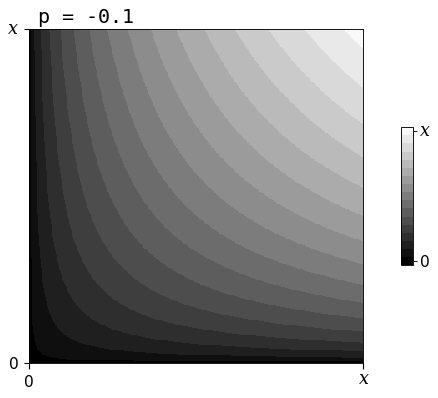


 59%|█████▉    | 363/617 [02:52<01:59,  2.12it/s]

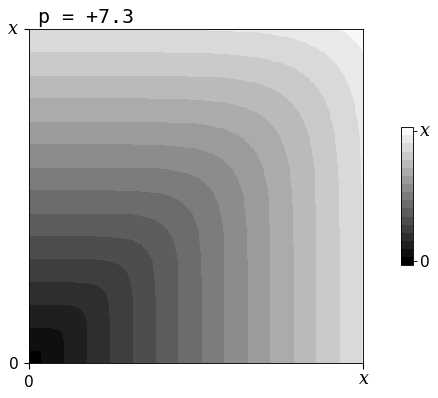


 59%|█████▉    | 364/617 [02:52<01:59,  2.12it/s]

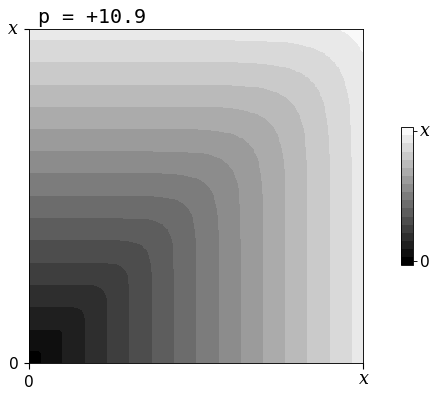


 59%|█████▉    | 365/617 [02:53<01:59,  2.11it/s]

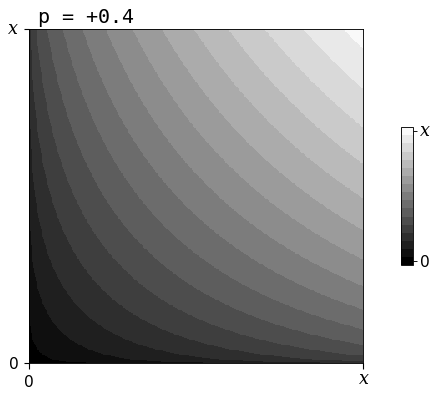


 59%|█████▉    | 366/617 [02:53<01:58,  2.12it/s]

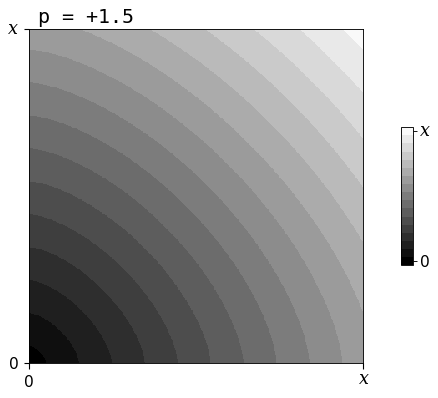


 59%|█████▉    | 367/617 [02:54<01:57,  2.13it/s]

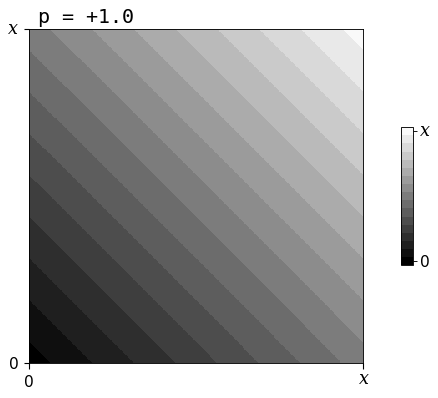


 60%|█████▉    | 368/617 [02:54<01:56,  2.14it/s]

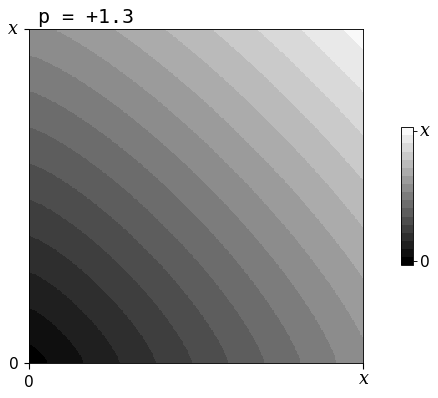


 60%|█████▉    | 369/617 [02:55<01:55,  2.14it/s]

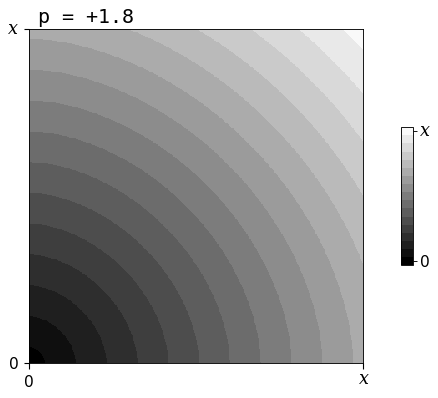


 60%|█████▉    | 370/617 [02:55<01:55,  2.14it/s]

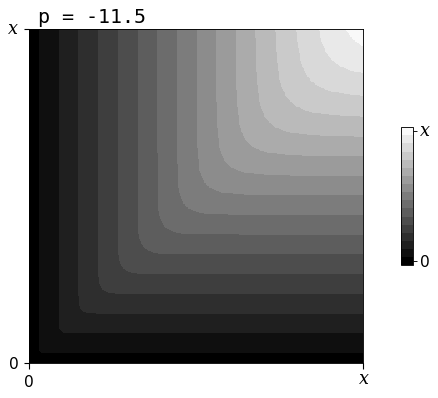


 60%|██████    | 371/617 [02:56<01:59,  2.06it/s]

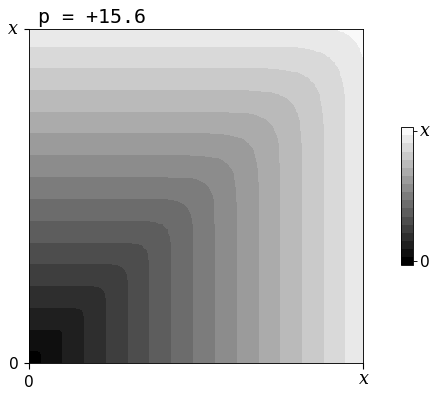


 60%|██████    | 372/617 [02:56<01:57,  2.09it/s]

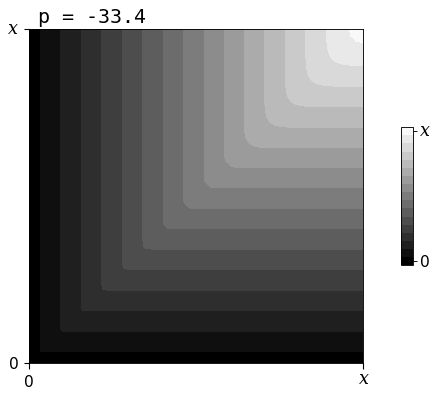


 60%|██████    | 373/617 [02:57<01:56,  2.09it/s]

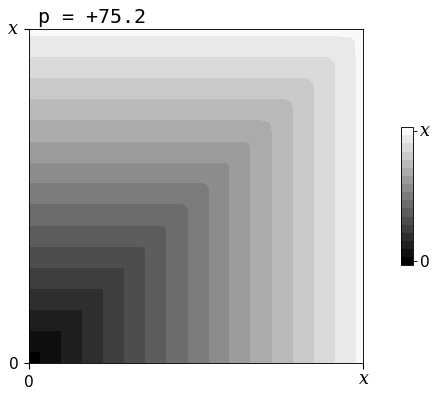


 61%|██████    | 374/617 [02:57<01:55,  2.10it/s]

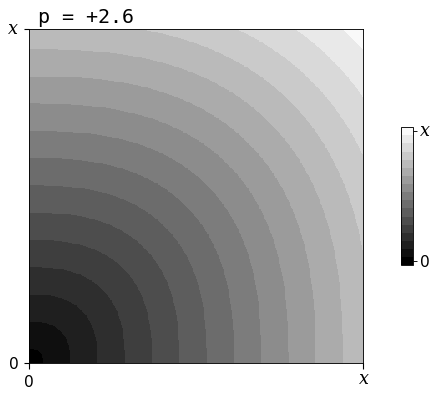


 61%|██████    | 375/617 [02:58<01:55,  2.10it/s]

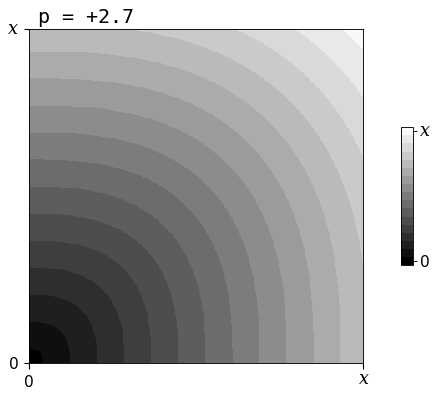


 61%|██████    | 376/617 [02:58<01:53,  2.11it/s]

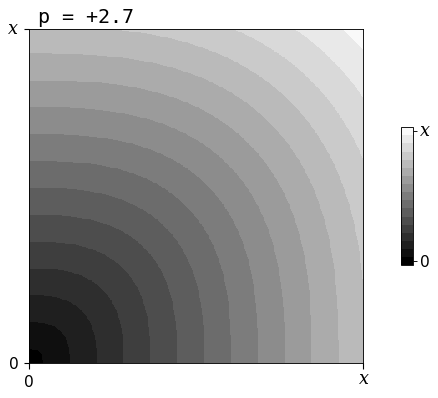


 61%|██████    | 377/617 [02:59<01:53,  2.12it/s]

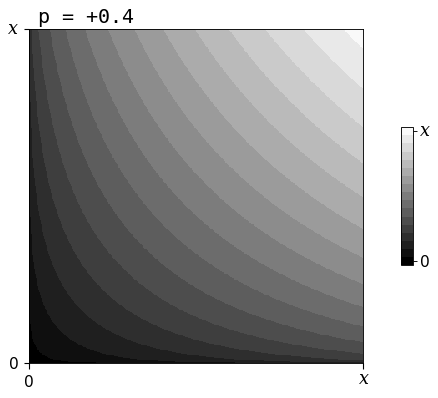


 61%|██████▏   | 378/617 [02:59<01:52,  2.12it/s]

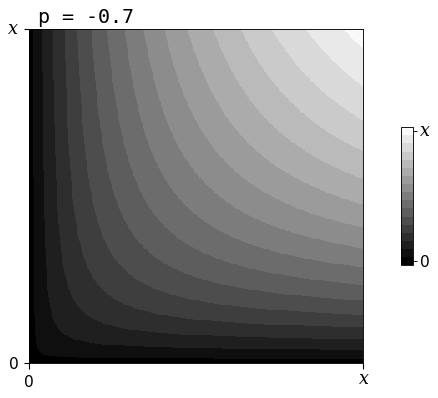


 61%|██████▏   | 379/617 [03:00<01:51,  2.13it/s]

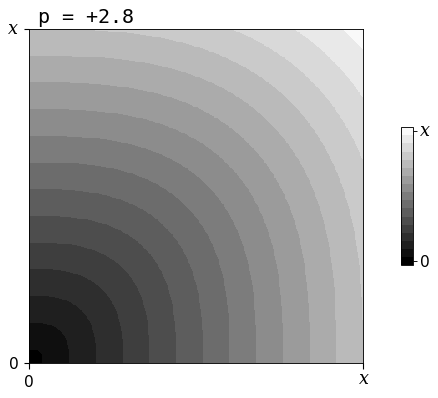


 62%|██████▏   | 380/617 [03:00<01:51,  2.12it/s]

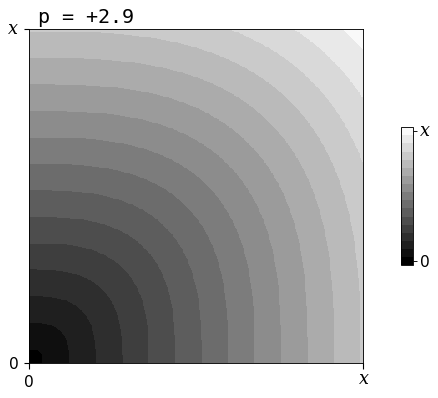


 62%|██████▏   | 381/617 [03:00<01:50,  2.13it/s]

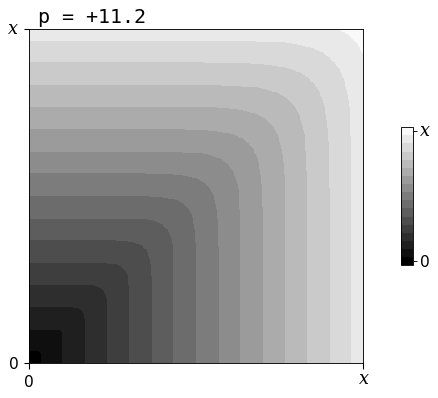


 62%|██████▏   | 382/617 [03:01<01:53,  2.07it/s]

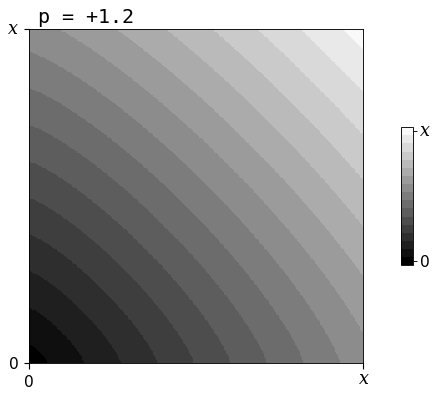


 62%|██████▏   | 383/617 [03:01<01:51,  2.09it/s]

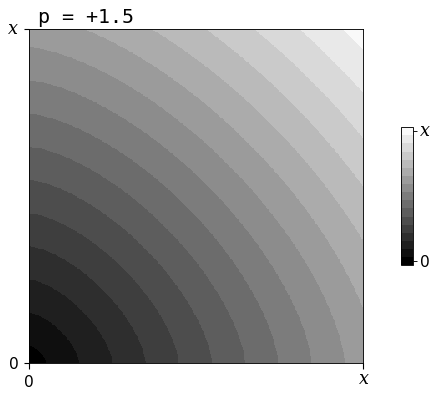


 62%|██████▏   | 384/617 [03:02<01:50,  2.11it/s]

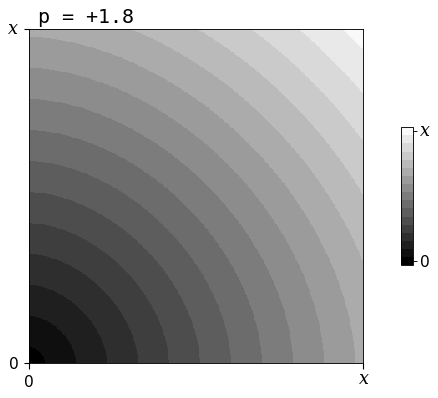


 62%|██████▏   | 385/617 [03:02<01:49,  2.12it/s]

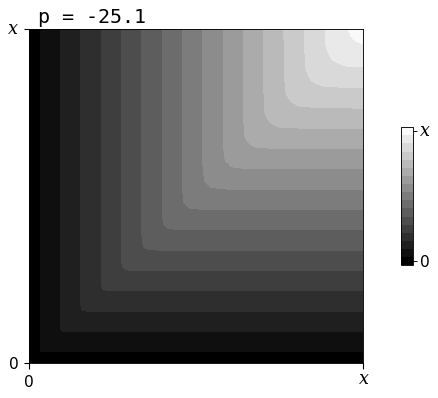


 63%|██████▎   | 386/617 [03:03<01:49,  2.11it/s]

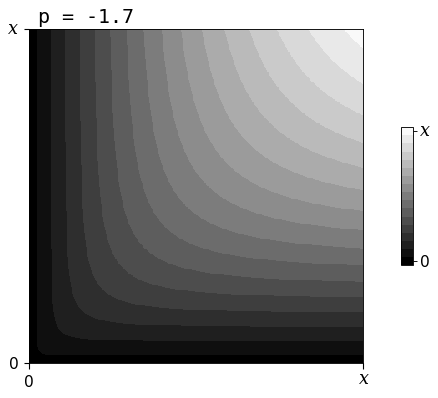


 63%|██████▎   | 387/617 [03:03<01:48,  2.12it/s]

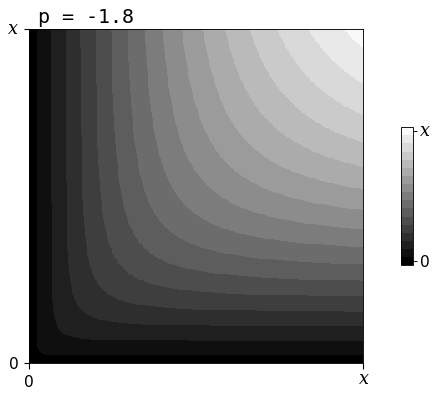


 63%|██████▎   | 388/617 [03:04<01:47,  2.13it/s]

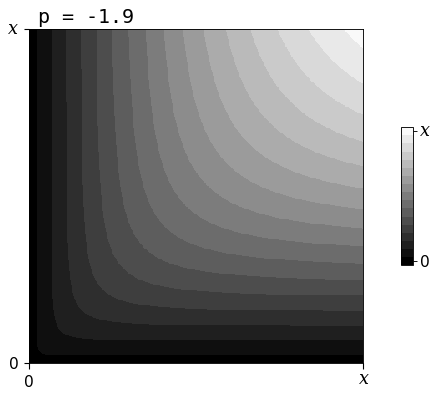


 63%|██████▎   | 389/617 [03:04<01:47,  2.13it/s]

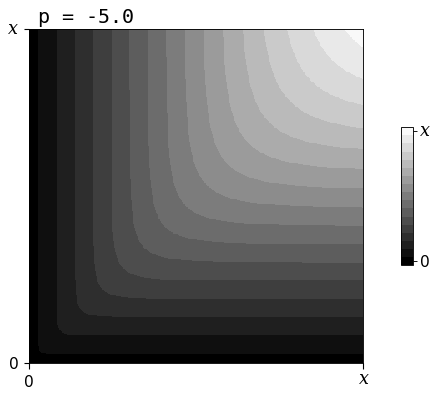


 63%|██████▎   | 390/617 [03:05<01:46,  2.13it/s]

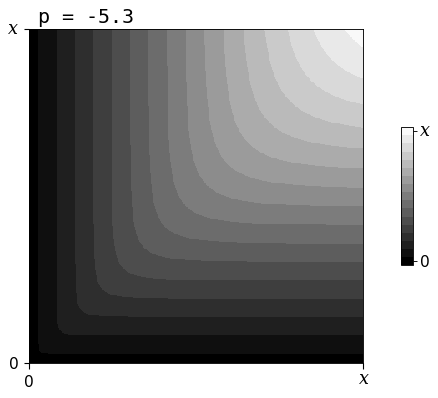


 63%|██████▎   | 391/617 [03:05<01:45,  2.13it/s]

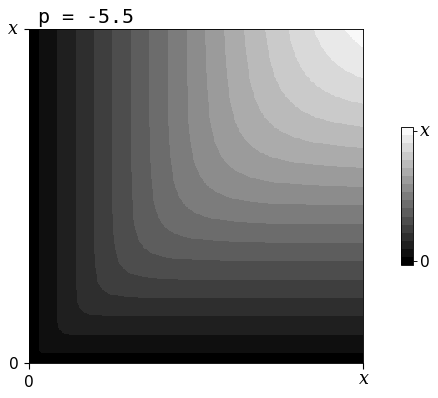


 64%|██████▎   | 392/617 [03:06<01:45,  2.13it/s]

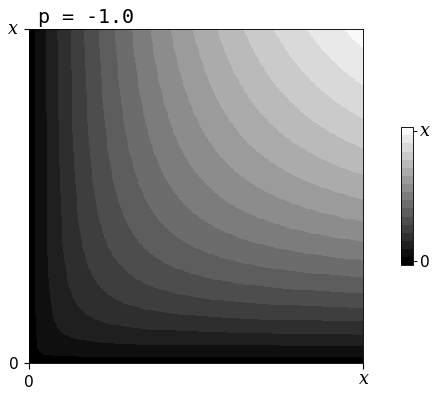


 64%|██████▎   | 393/617 [03:06<01:48,  2.07it/s]

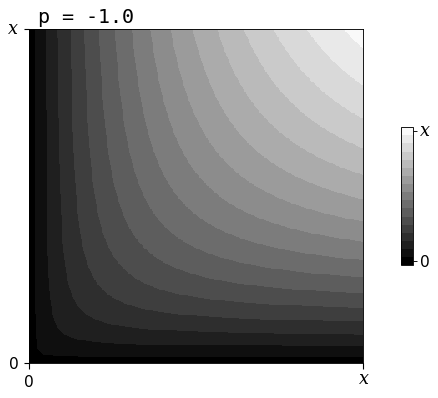


 64%|██████▍   | 394/617 [03:07<01:46,  2.09it/s]

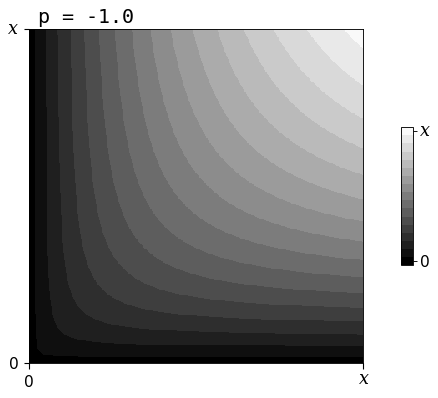


 64%|██████▍   | 395/617 [03:07<01:45,  2.10it/s]

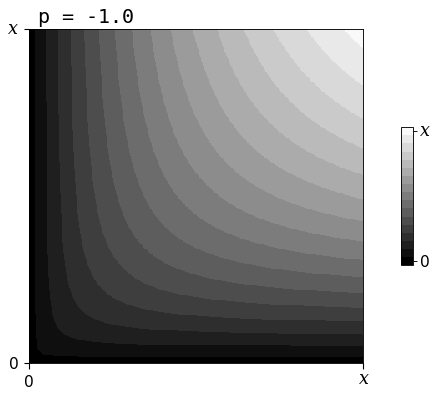


 64%|██████▍   | 396/617 [03:08<01:44,  2.11it/s]

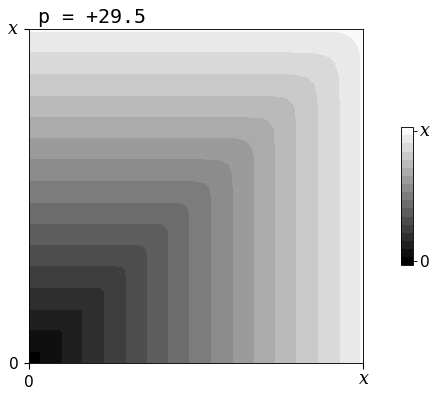


 64%|██████▍   | 397/617 [03:08<01:44,  2.10it/s]

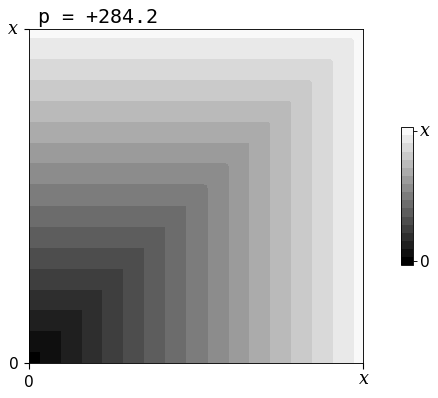


 65%|██████▍   | 398/617 [03:09<01:43,  2.11it/s]

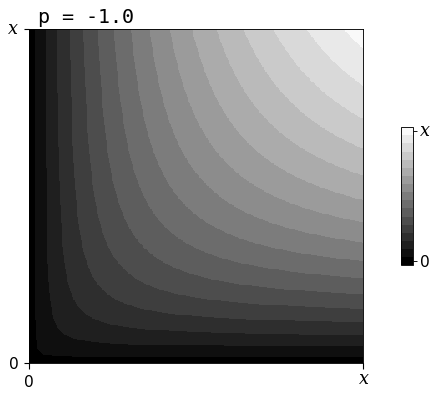


 65%|██████▍   | 399/617 [03:09<01:43,  2.11it/s]

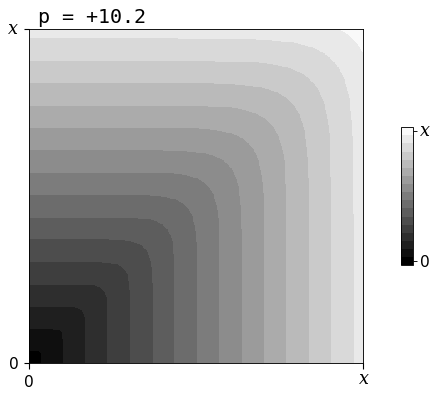


 65%|██████▍   | 400/617 [03:09<01:42,  2.12it/s]

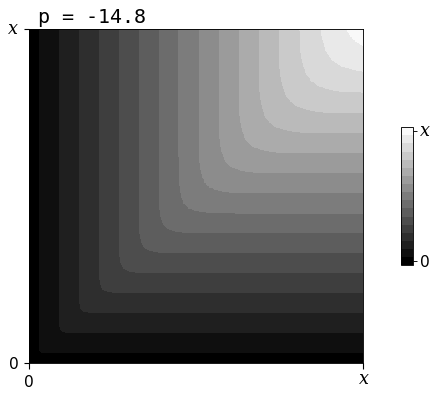


 65%|██████▍   | 401/617 [03:10<01:41,  2.12it/s]

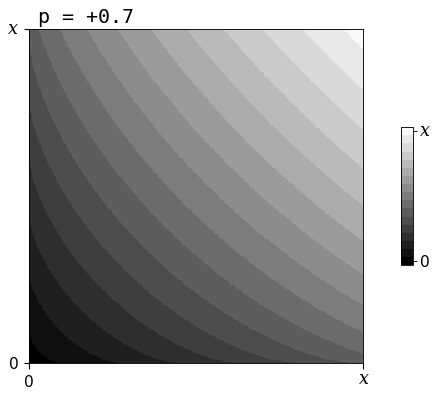


 65%|██████▌   | 402/617 [03:10<01:40,  2.13it/s]

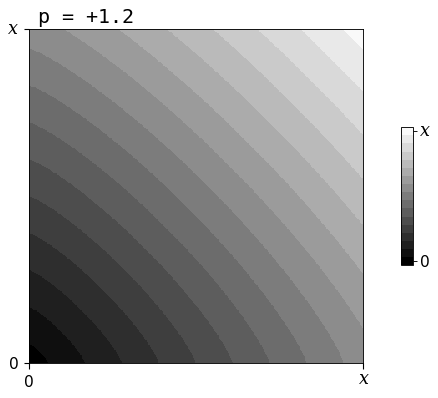


 65%|██████▌   | 403/617 [03:11<01:40,  2.13it/s]

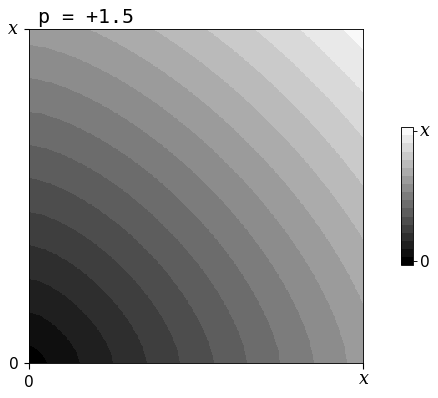


 65%|██████▌   | 404/617 [03:11<01:43,  2.06it/s]

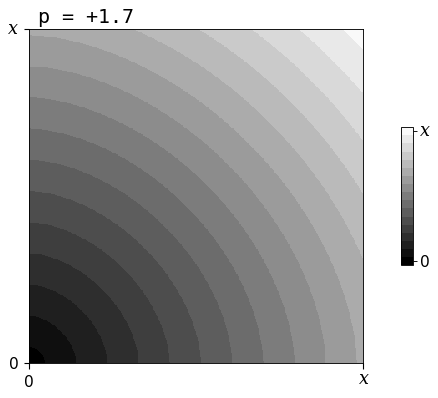


 66%|██████▌   | 405/617 [03:12<01:41,  2.09it/s]

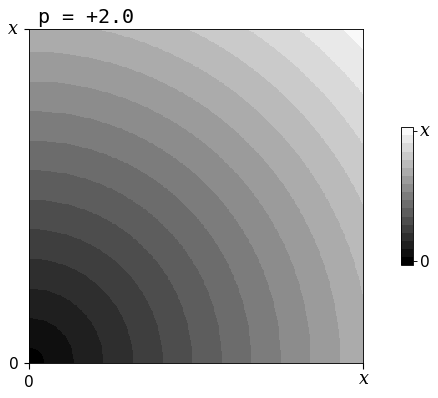


 66%|██████▌   | 406/617 [03:12<01:40,  2.11it/s]

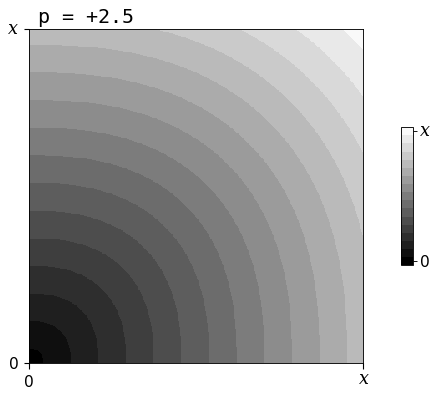


 66%|██████▌   | 407/617 [03:13<01:39,  2.12it/s]

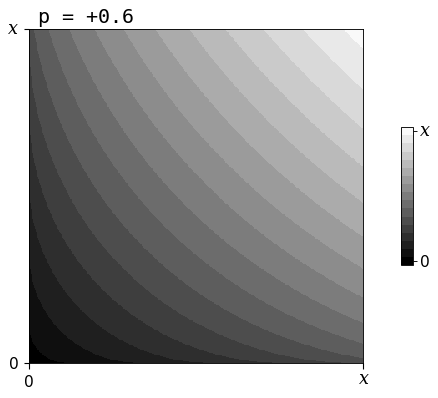


 66%|██████▌   | 408/617 [03:13<01:38,  2.12it/s]

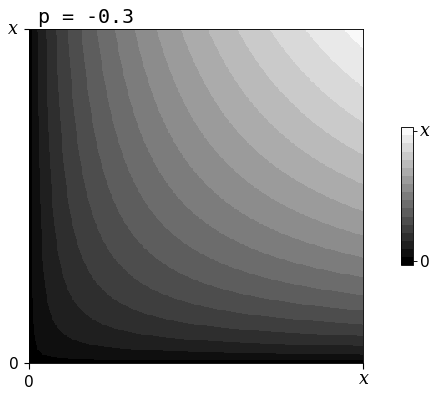


 66%|██████▋   | 409/617 [03:14<01:37,  2.13it/s]

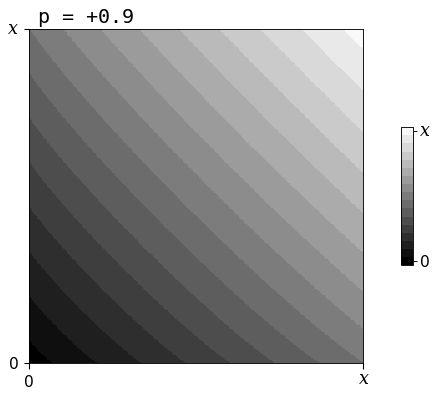


 66%|██████▋   | 410/617 [03:14<01:37,  2.12it/s]

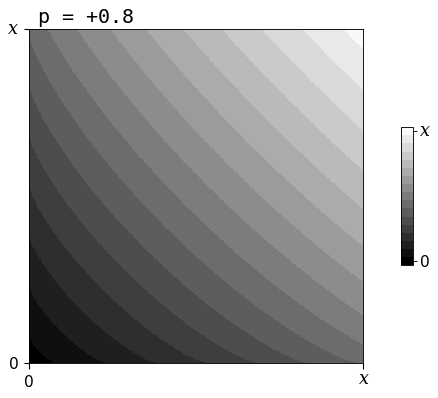


 67%|██████▋   | 411/617 [03:15<01:37,  2.12it/s]

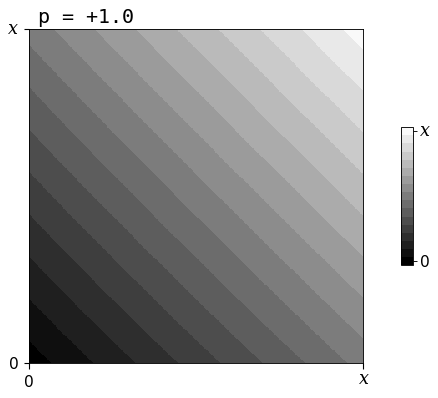


 67%|██████▋   | 412/617 [03:15<01:36,  2.13it/s]

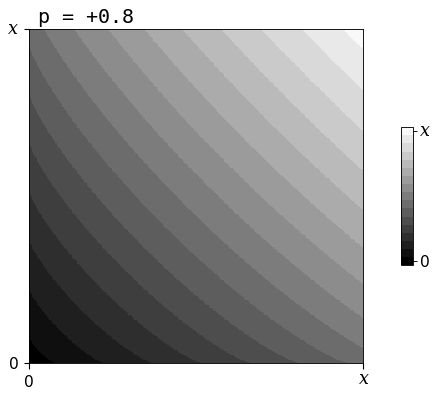


 67%|██████▋   | 413/617 [03:16<01:35,  2.14it/s]

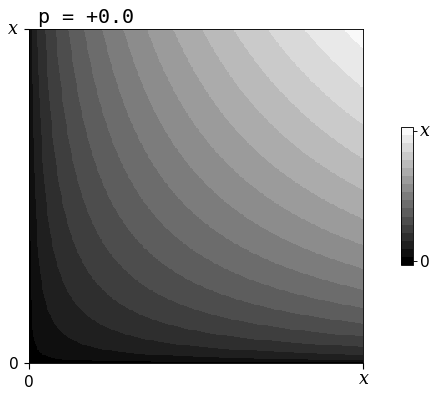


 67%|██████▋   | 414/617 [03:16<01:35,  2.14it/s]

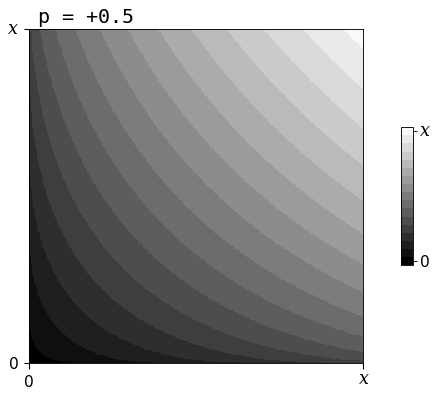


 67%|██████▋   | 415/617 [03:17<01:37,  2.08it/s]

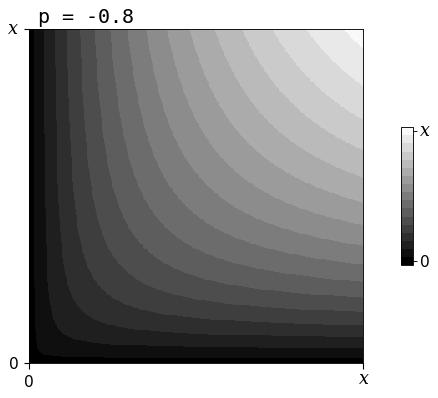


 67%|██████▋   | 416/617 [03:17<01:35,  2.10it/s]

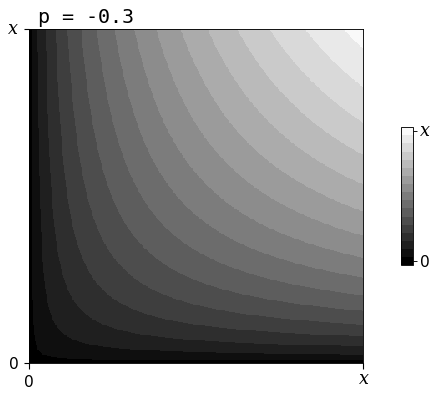


 68%|██████▊   | 417/617 [03:17<01:34,  2.12it/s]

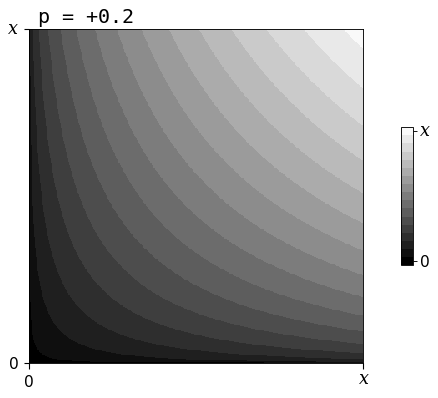


 68%|██████▊   | 418/617 [03:18<01:33,  2.12it/s]

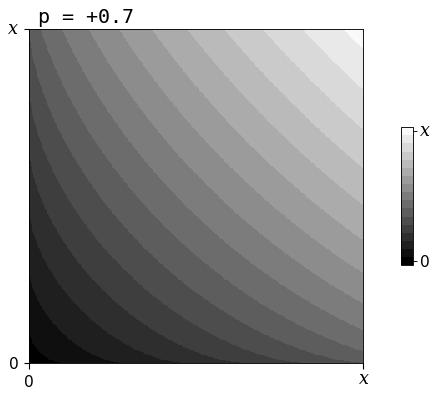


 68%|██████▊   | 419/617 [03:18<01:33,  2.13it/s]

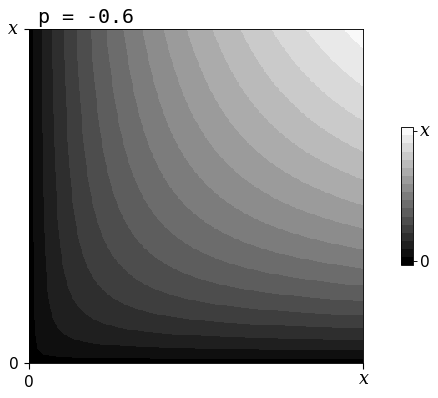


 68%|██████▊   | 420/617 [03:19<01:32,  2.13it/s]

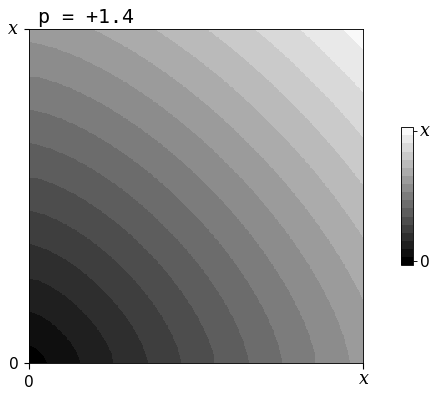


 68%|██████▊   | 421/617 [03:19<01:31,  2.14it/s]

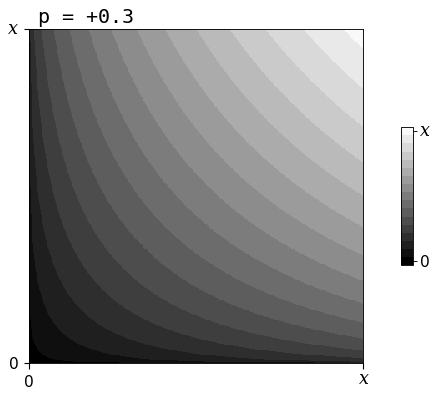


 68%|██████▊   | 422/617 [03:20<01:31,  2.13it/s]

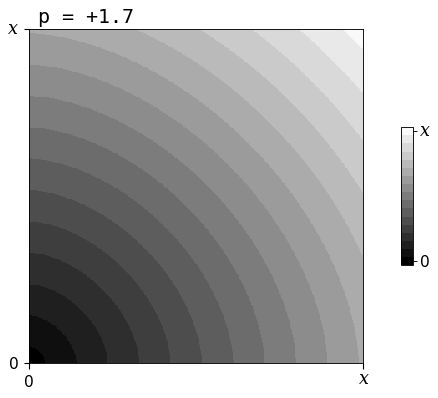


 69%|██████▊   | 423/617 [03:20<01:30,  2.14it/s]

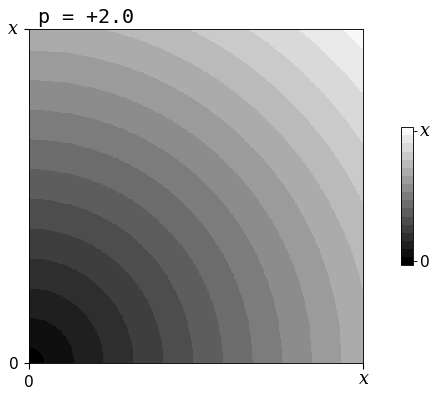


 69%|██████▊   | 424/617 [03:21<01:30,  2.14it/s]

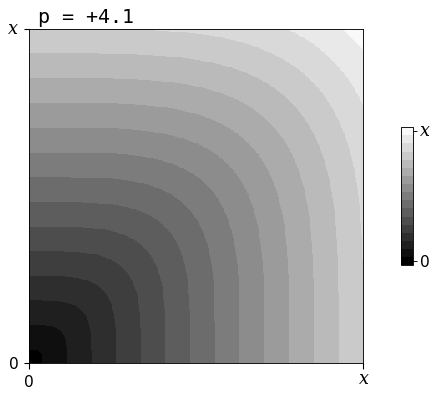


 69%|██████▉   | 425/617 [03:21<01:29,  2.15it/s]

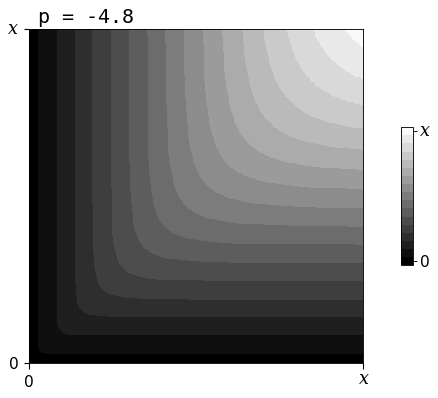


 69%|██████▉   | 426/617 [03:22<01:32,  2.06it/s]

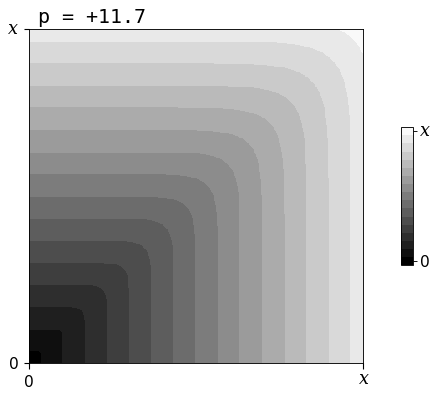


 69%|██████▉   | 427/617 [03:22<01:30,  2.09it/s]

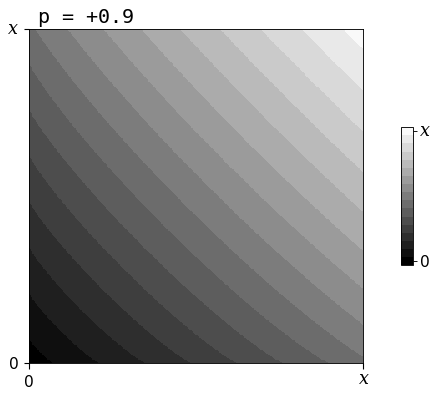


 69%|██████▉   | 428/617 [03:23<01:29,  2.10it/s]

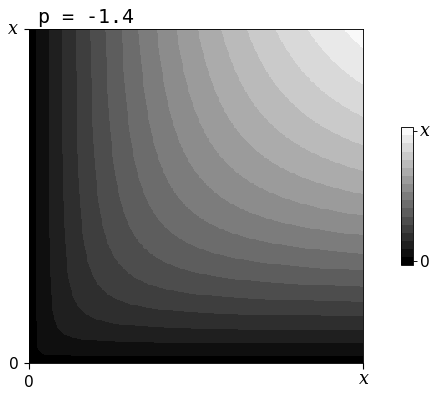


 70%|██████▉   | 429/617 [03:23<01:28,  2.11it/s]

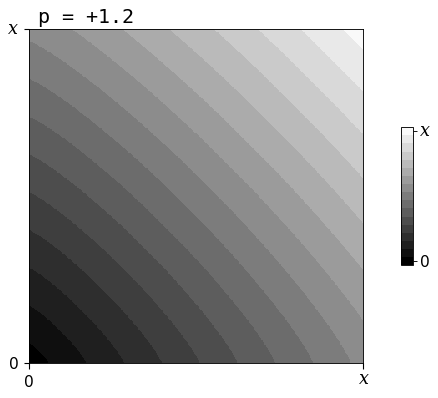


 70%|██████▉   | 430/617 [03:24<01:27,  2.13it/s]

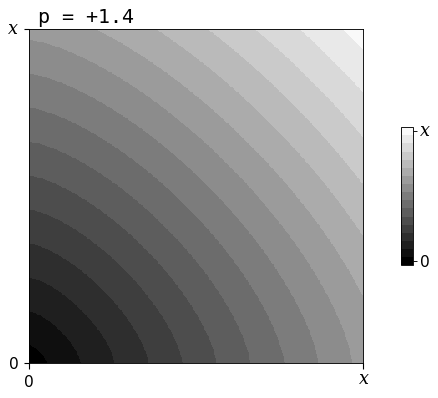


 70%|██████▉   | 431/617 [03:24<01:26,  2.14it/s]

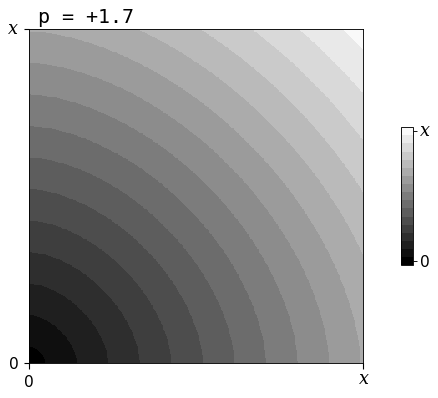


 70%|███████   | 432/617 [03:25<01:26,  2.15it/s]

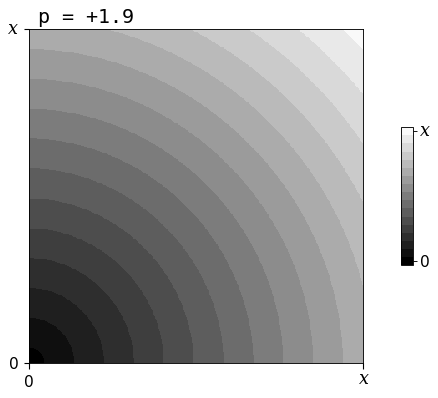


 70%|███████   | 433/617 [03:25<01:26,  2.13it/s]

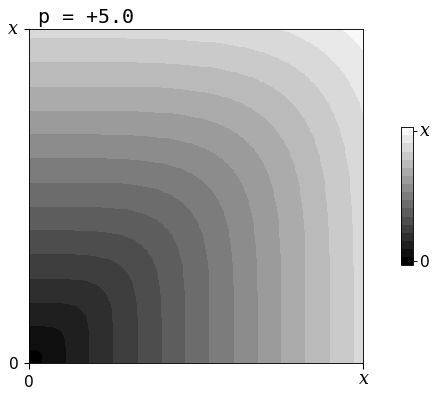


 70%|███████   | 434/617 [03:25<01:25,  2.13it/s]

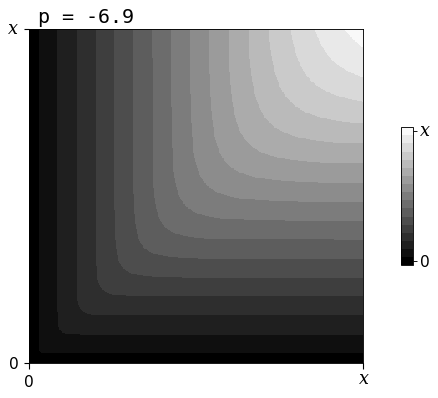


 71%|███████   | 435/617 [03:26<01:25,  2.13it/s]

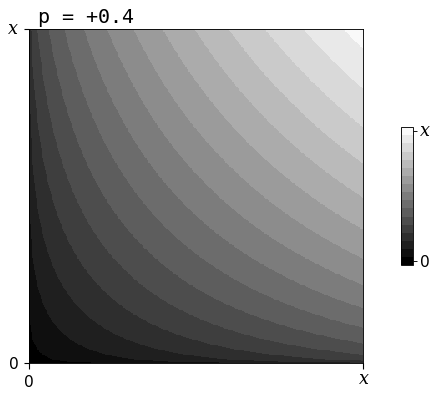


 71%|███████   | 436/617 [03:26<01:24,  2.14it/s]

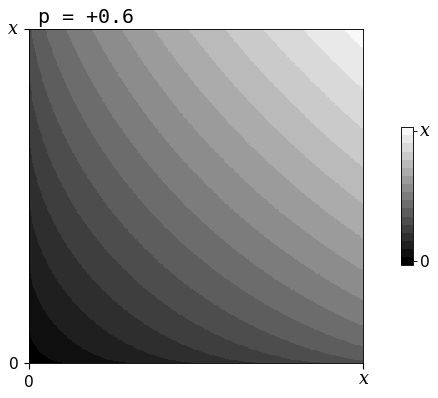


 71%|███████   | 437/617 [03:27<01:27,  2.06it/s]

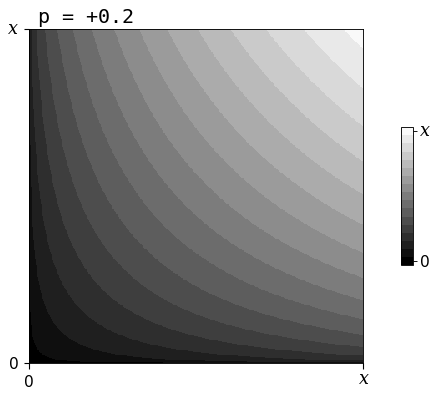


 71%|███████   | 438/617 [03:27<01:25,  2.08it/s]

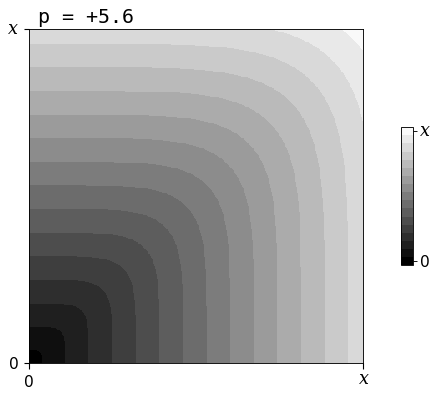


 71%|███████   | 439/617 [03:28<01:24,  2.10it/s]

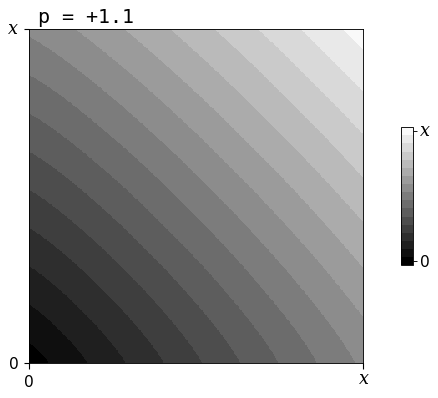


 71%|███████▏  | 440/617 [03:28<01:24,  2.10it/s]

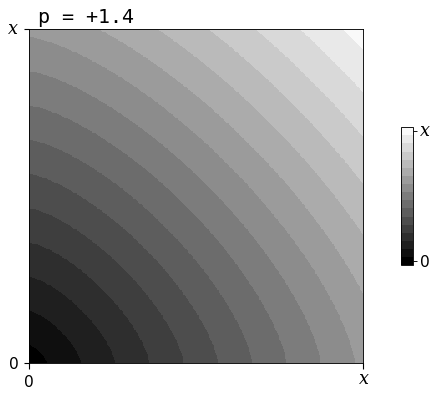


 71%|███████▏  | 441/617 [03:29<01:23,  2.11it/s]

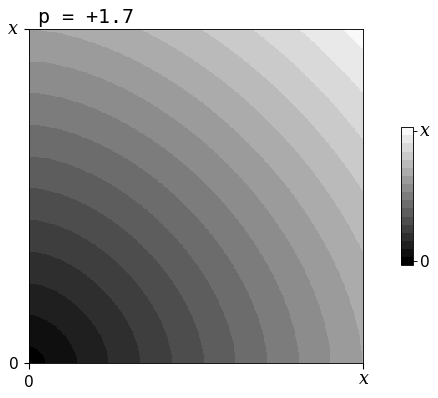


 72%|███████▏  | 442/617 [03:29<01:22,  2.12it/s]

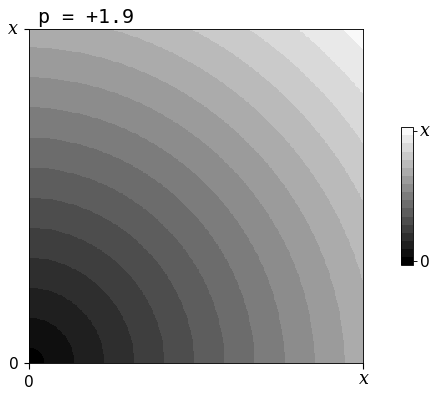


 72%|███████▏  | 443/617 [03:30<01:21,  2.14it/s]

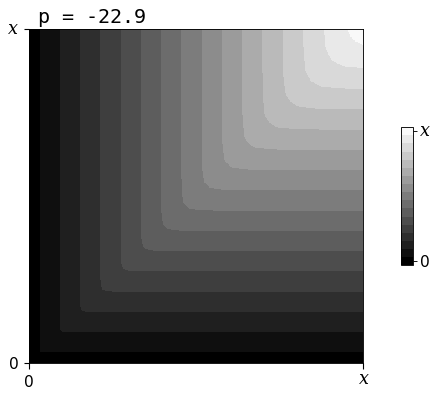


 72%|███████▏  | 444/617 [03:30<01:21,  2.13it/s]

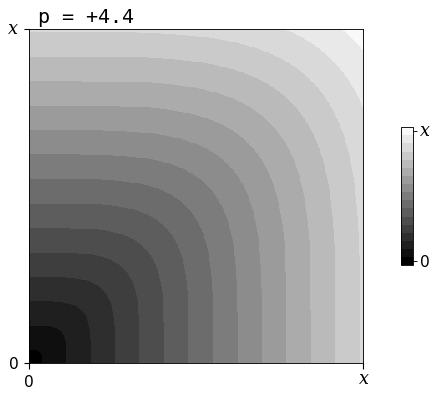


 72%|███████▏  | 445/617 [03:31<01:20,  2.14it/s]/Users/lu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


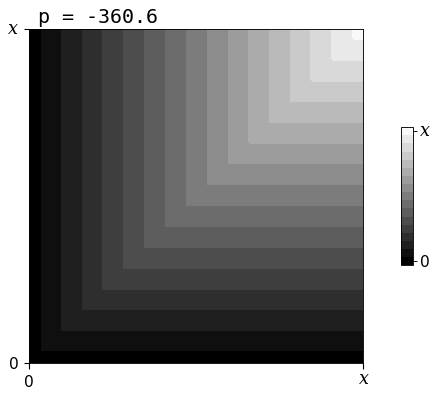


 72%|███████▏  | 446/617 [03:31<01:21,  2.09it/s]

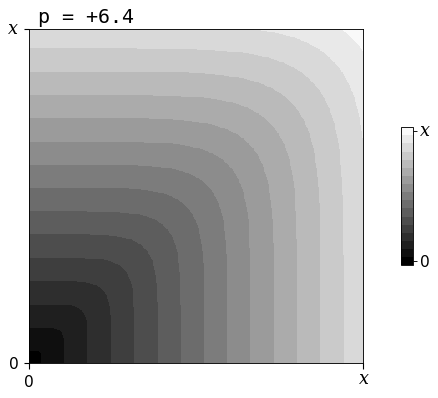


 72%|███████▏  | 447/617 [03:32<01:20,  2.10it/s]

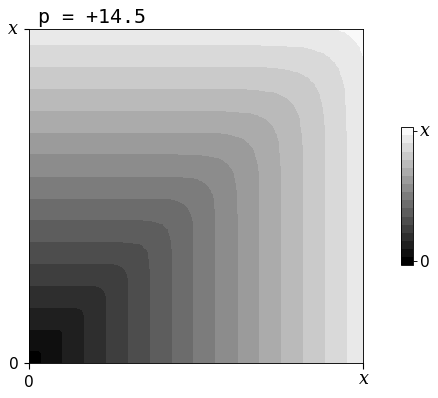


 73%|███████▎  | 448/617 [03:32<01:22,  2.04it/s]

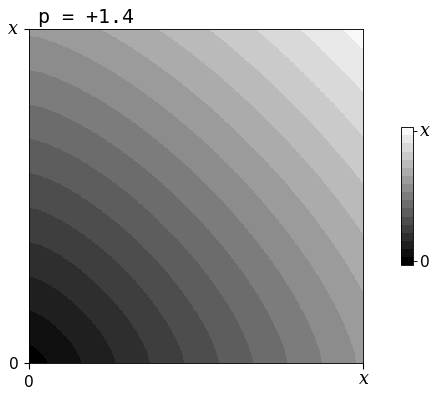


 73%|███████▎  | 449/617 [03:33<01:20,  2.07it/s]

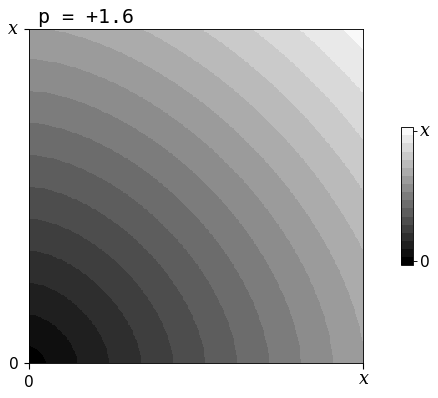


 73%|███████▎  | 450/617 [03:33<01:19,  2.09it/s]

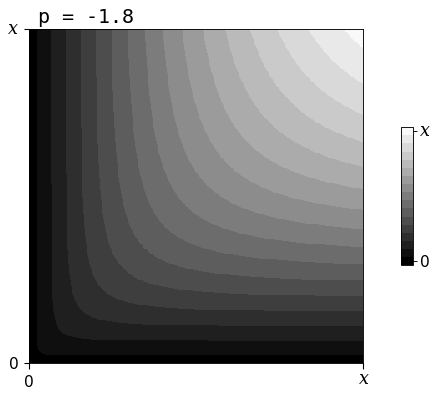


 73%|███████▎  | 451/617 [03:34<01:18,  2.12it/s]

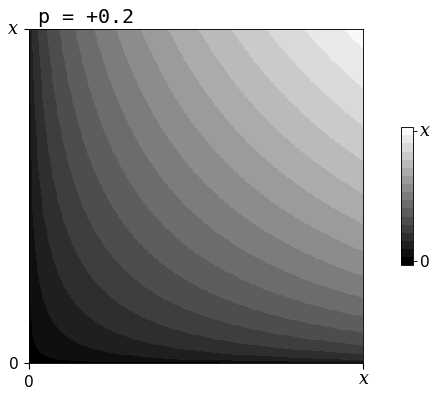


 73%|███████▎  | 452/617 [03:34<01:17,  2.13it/s]

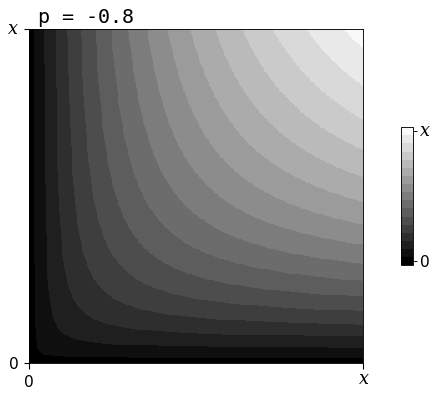


 73%|███████▎  | 453/617 [03:35<01:16,  2.14it/s]

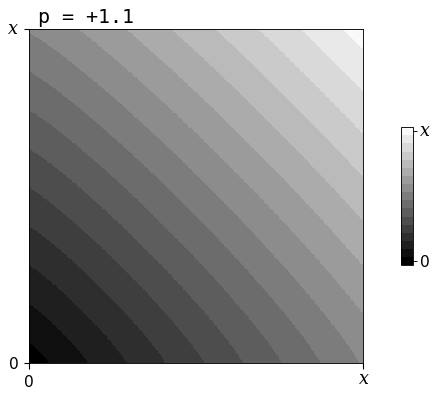


 74%|███████▎  | 454/617 [03:35<01:16,  2.14it/s]

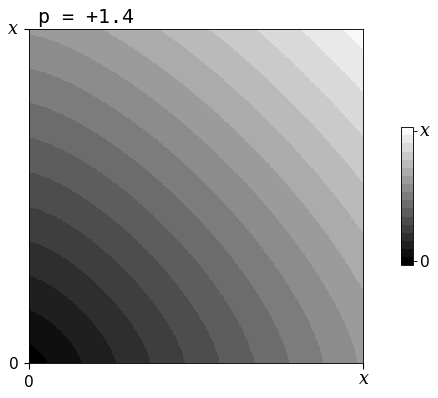


 74%|███████▎  | 455/617 [03:35<01:15,  2.14it/s]

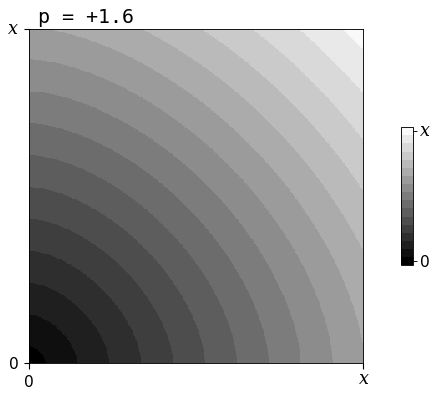


 74%|███████▍  | 456/617 [03:36<01:14,  2.15it/s]

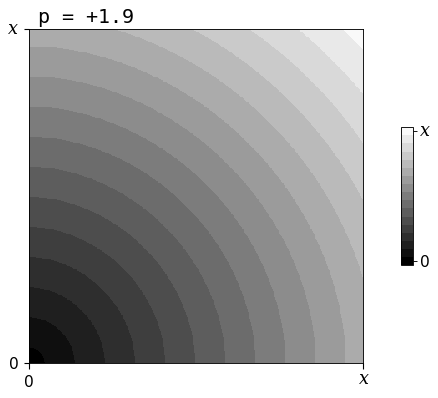


 74%|███████▍  | 457/617 [03:36<01:14,  2.15it/s]

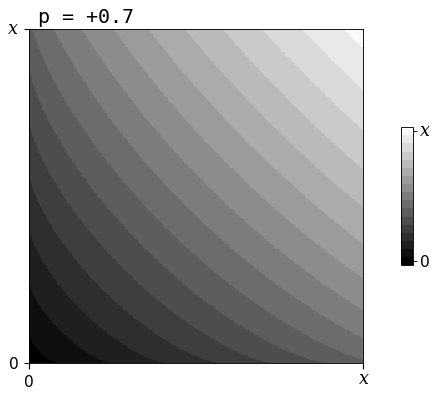


 74%|███████▍  | 458/617 [03:37<01:13,  2.15it/s]

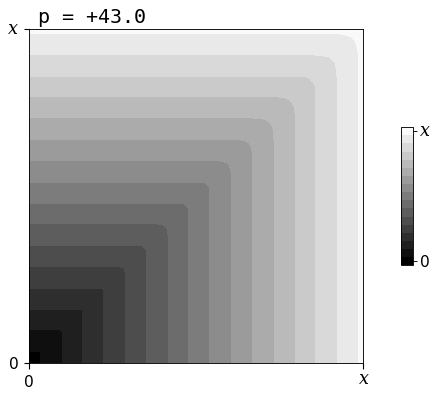


 74%|███████▍  | 459/617 [03:37<01:16,  2.07it/s]

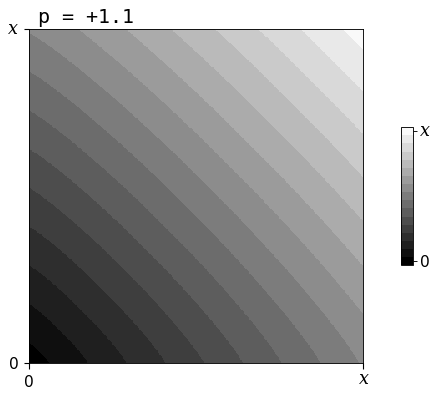


 75%|███████▍  | 460/617 [03:38<01:15,  2.09it/s]

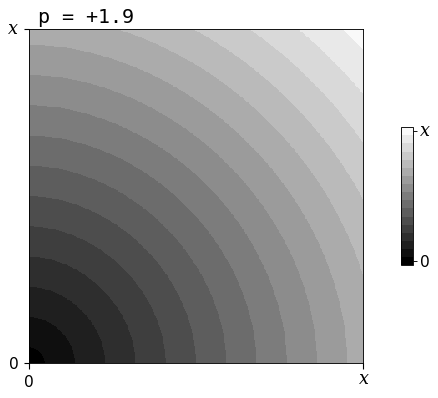


 75%|███████▍  | 461/617 [03:38<01:14,  2.10it/s]

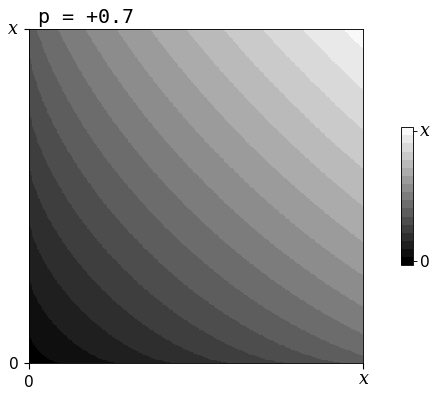


 75%|███████▍  | 462/617 [03:39<01:13,  2.11it/s]

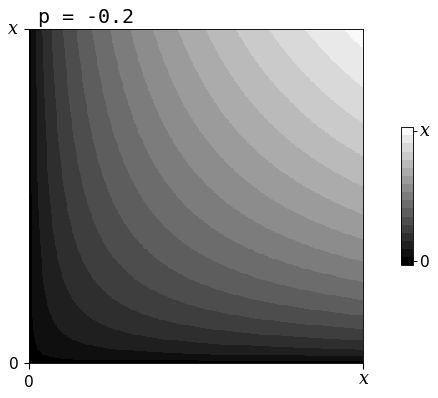


 75%|███████▌  | 463/617 [03:39<01:12,  2.11it/s]

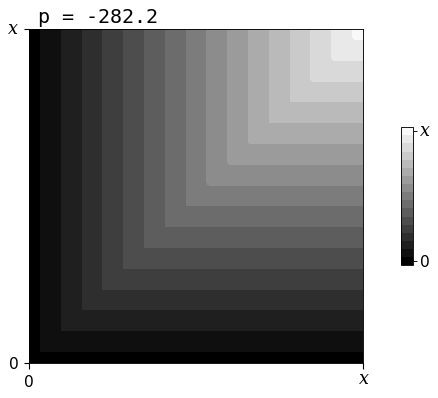


 75%|███████▌  | 464/617 [03:40<01:12,  2.10it/s]

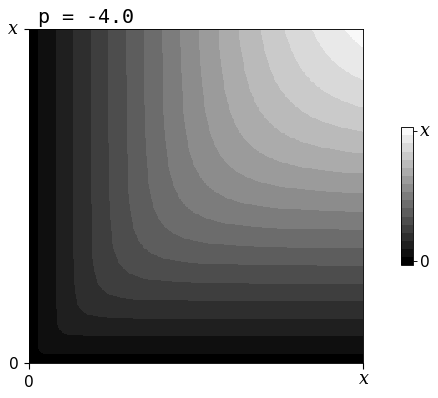


 75%|███████▌  | 465/617 [03:40<01:12,  2.11it/s]

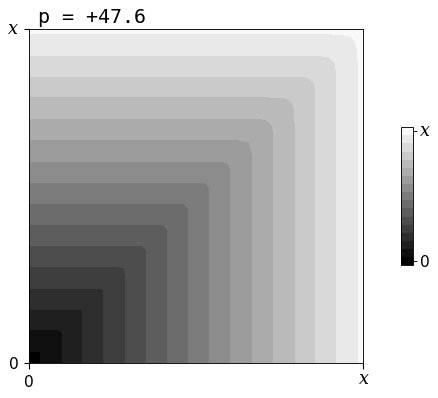


 76%|███████▌  | 466/617 [03:41<01:11,  2.11it/s]

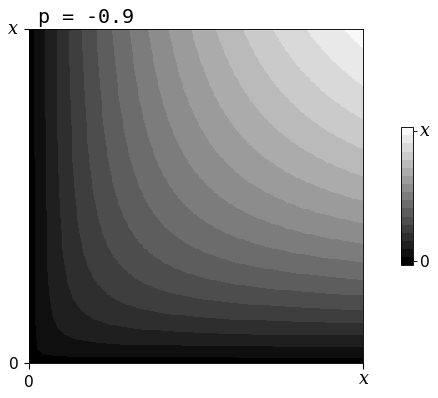


 76%|███████▌  | 467/617 [03:41<01:11,  2.11it/s]

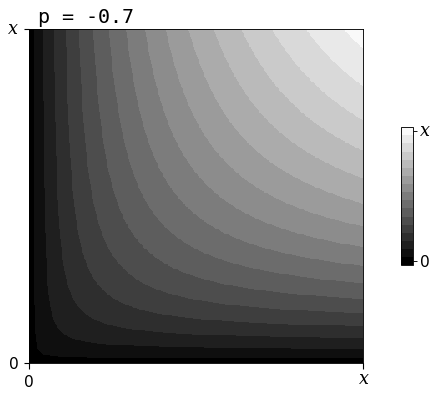


 76%|███████▌  | 468/617 [03:42<01:10,  2.12it/s]

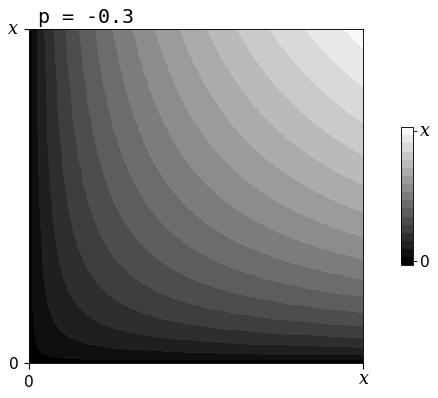


 76%|███████▌  | 469/617 [03:42<01:10,  2.11it/s]

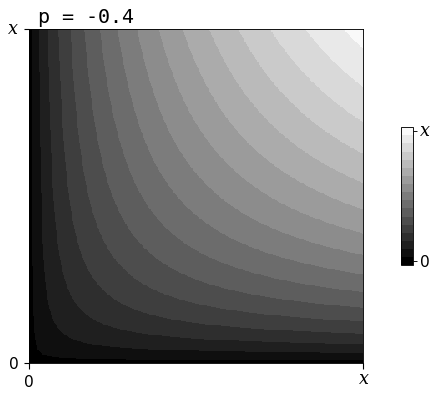


 76%|███████▌  | 470/617 [03:43<01:12,  2.03it/s]

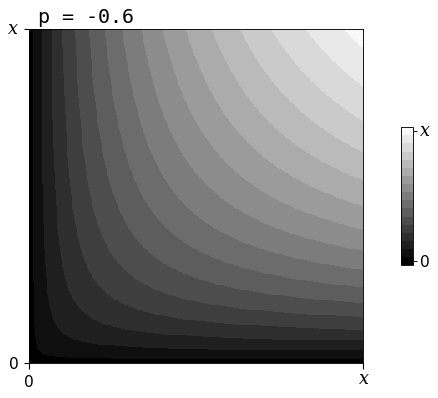


 76%|███████▋  | 471/617 [03:43<01:10,  2.06it/s]

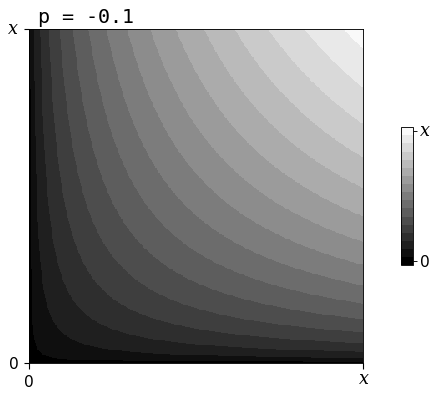


 76%|███████▋  | 472/617 [03:44<01:09,  2.08it/s]

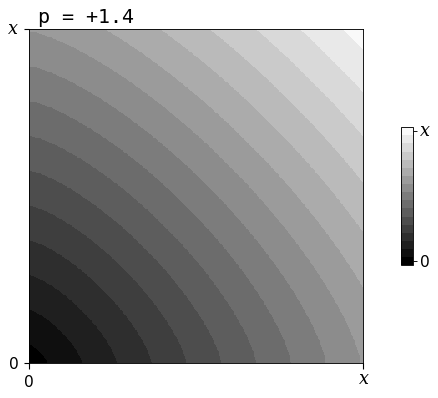


 77%|███████▋  | 473/617 [03:44<01:08,  2.11it/s]

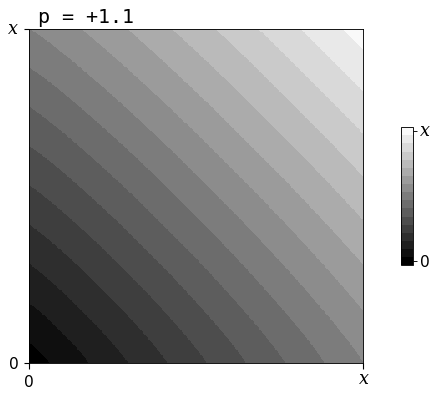


 77%|███████▋  | 474/617 [03:44<01:07,  2.12it/s]

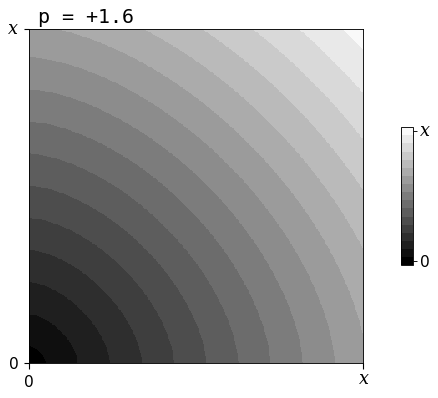


 77%|███████▋  | 475/617 [03:45<01:06,  2.13it/s]

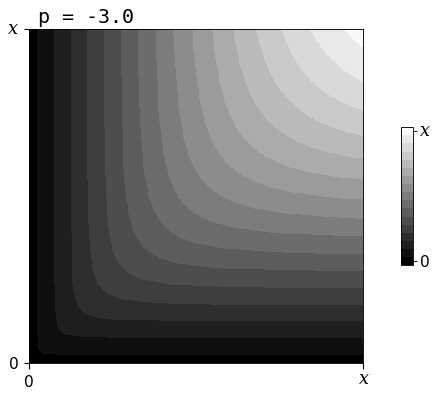


 77%|███████▋  | 476/617 [03:45<01:06,  2.13it/s]

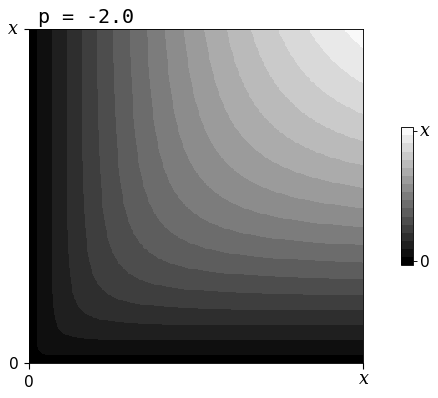


 77%|███████▋  | 477/617 [03:46<01:05,  2.13it/s]

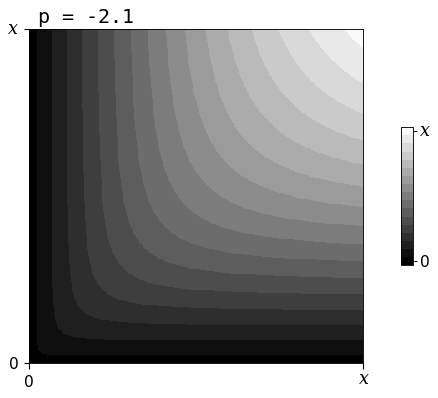


 77%|███████▋  | 478/617 [03:46<01:05,  2.14it/s]

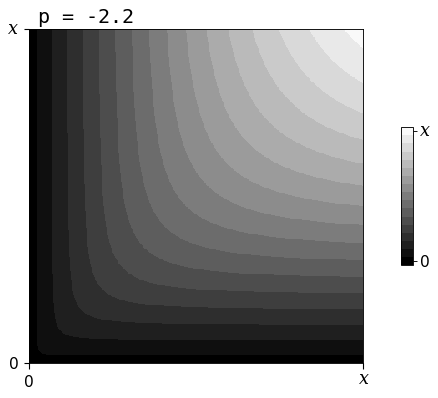


 78%|███████▊  | 479/617 [03:47<01:04,  2.14it/s]

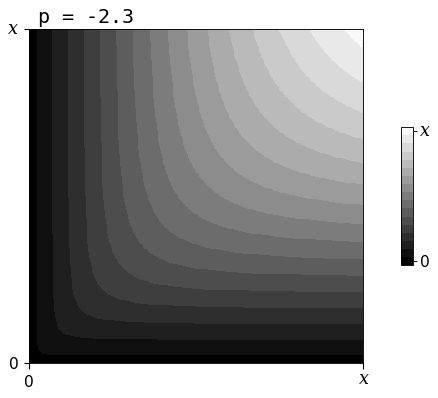


 78%|███████▊  | 480/617 [03:47<01:04,  2.13it/s]

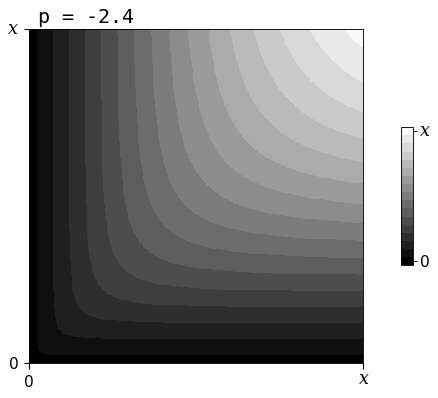


 78%|███████▊  | 481/617 [03:48<01:05,  2.06it/s]

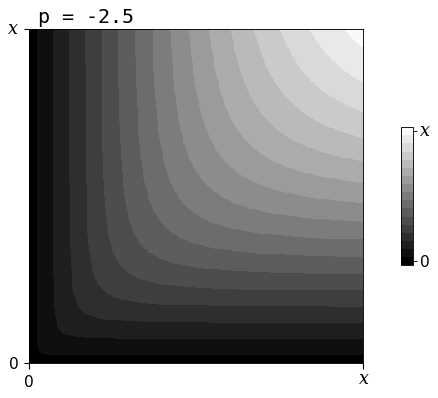


 78%|███████▊  | 482/617 [03:48<01:04,  2.08it/s]

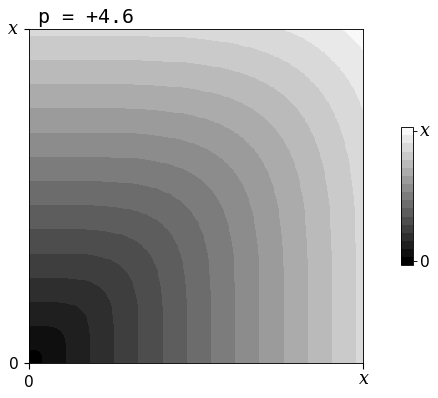


 78%|███████▊  | 483/617 [03:49<01:03,  2.11it/s]

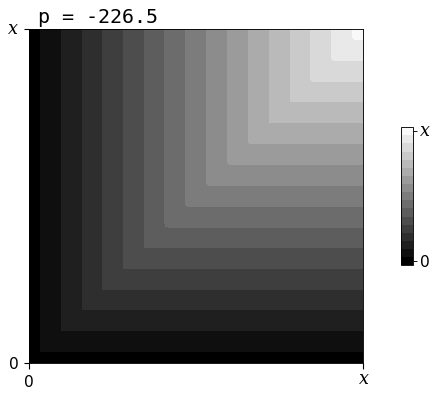


 78%|███████▊  | 484/617 [03:49<01:03,  2.10it/s]

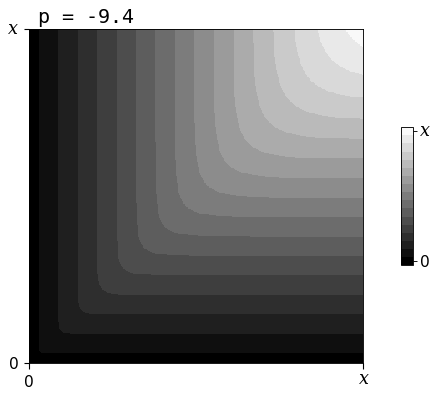


 79%|███████▊  | 485/617 [03:50<01:02,  2.12it/s]

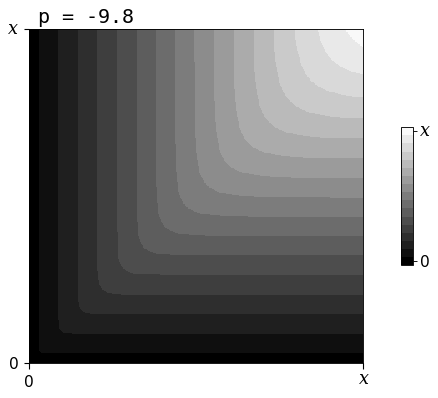


 79%|███████▉  | 486/617 [03:50<01:01,  2.13it/s]

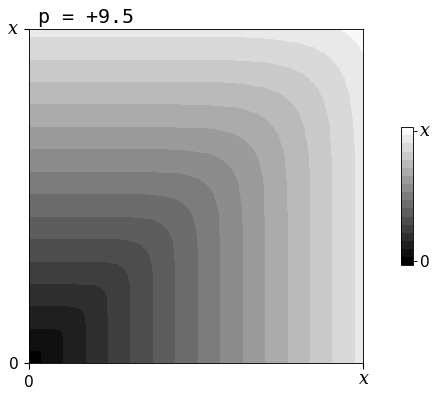


 79%|███████▉  | 487/617 [03:51<01:00,  2.13it/s]

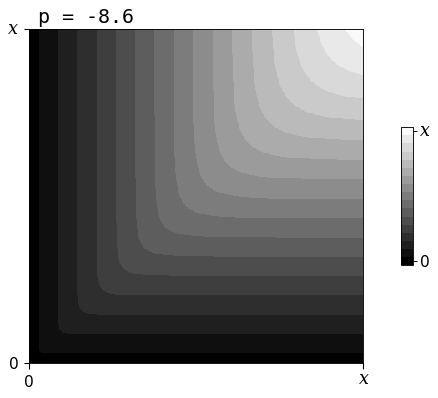


 79%|███████▉  | 488/617 [03:51<01:00,  2.12it/s]

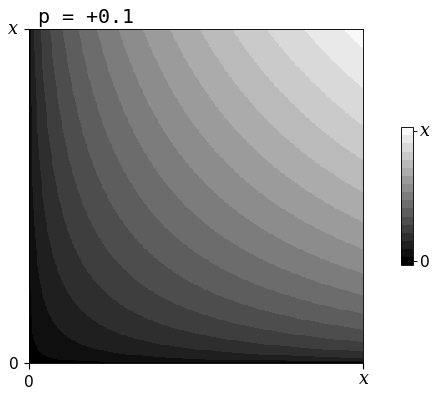


 79%|███████▉  | 489/617 [03:52<01:00,  2.13it/s]

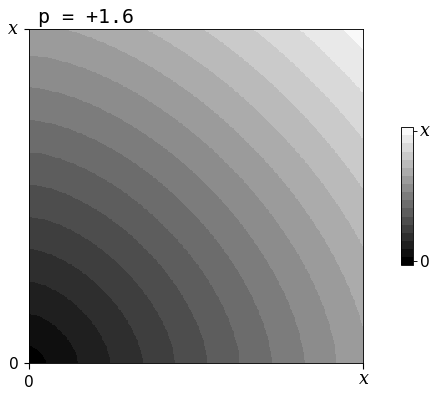


 79%|███████▉  | 490/617 [03:52<00:59,  2.14it/s]

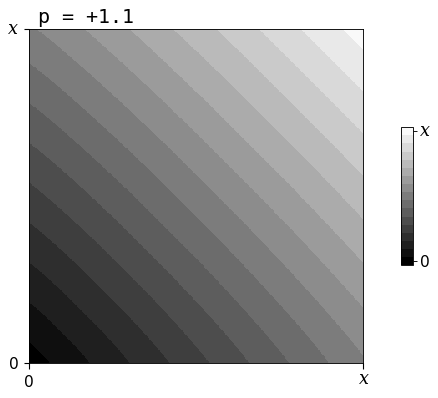


 80%|███████▉  | 491/617 [03:52<00:58,  2.15it/s]

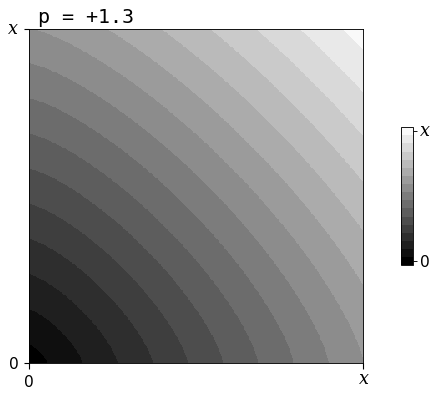


 80%|███████▉  | 492/617 [03:53<01:00,  2.07it/s]

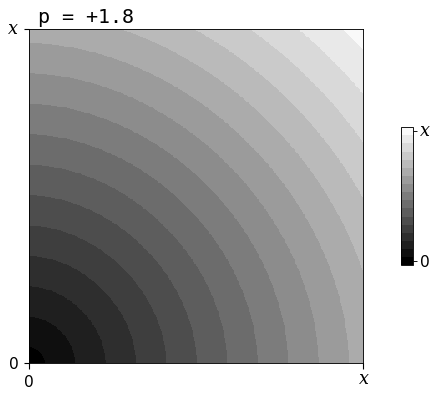


 80%|███████▉  | 493/617 [03:53<00:59,  2.10it/s]

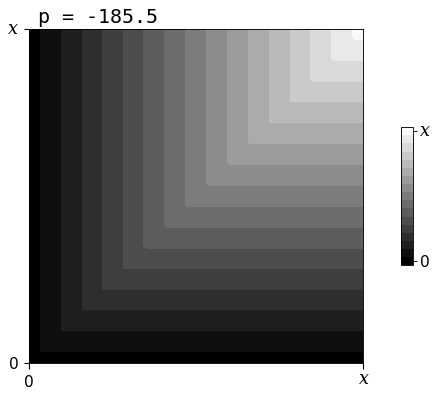


 80%|████████  | 494/617 [03:54<00:58,  2.10it/s]

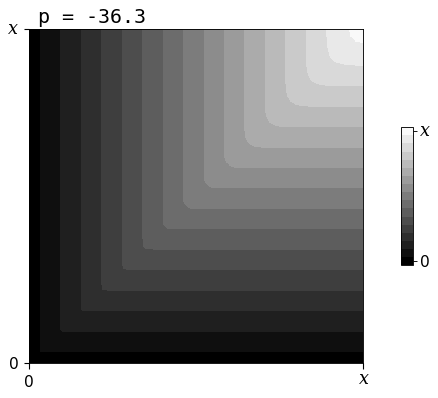


 80%|████████  | 495/617 [03:54<00:57,  2.11it/s]

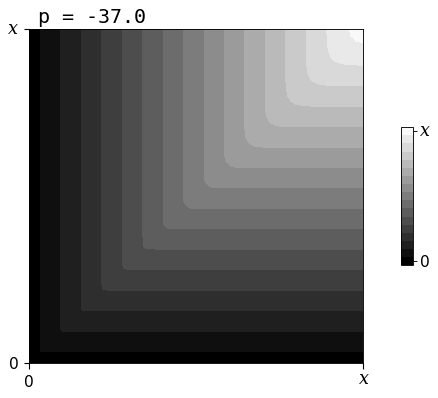


 80%|████████  | 496/617 [03:55<00:57,  2.12it/s]

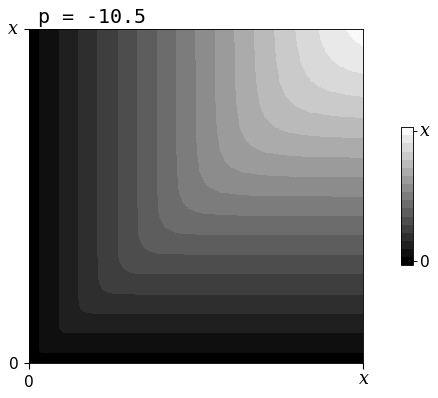


 81%|████████  | 497/617 [03:55<00:56,  2.12it/s]

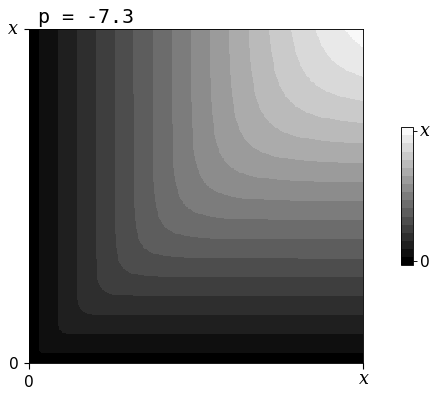


 81%|████████  | 498/617 [03:56<00:56,  2.12it/s]

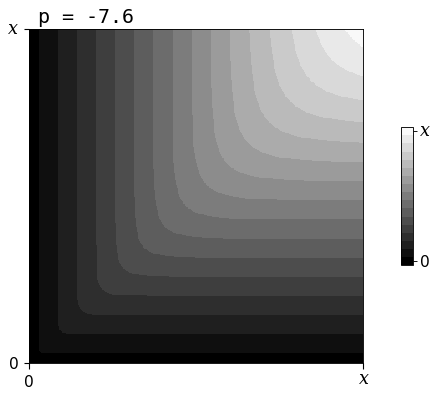


 81%|████████  | 499/617 [03:56<00:55,  2.12it/s]

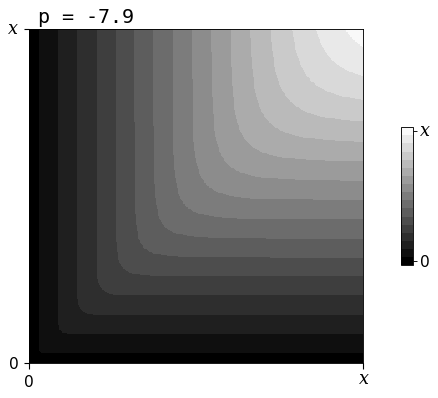


 81%|████████  | 500/617 [03:57<00:54,  2.13it/s]

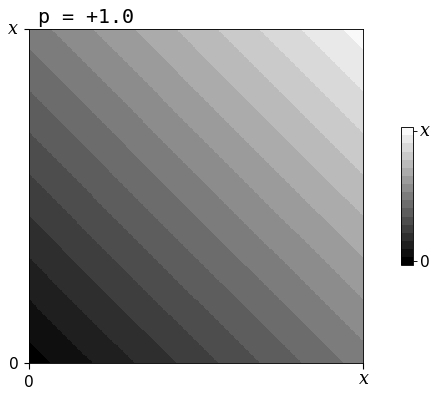


 81%|████████  | 501/617 [03:57<00:54,  2.14it/s]

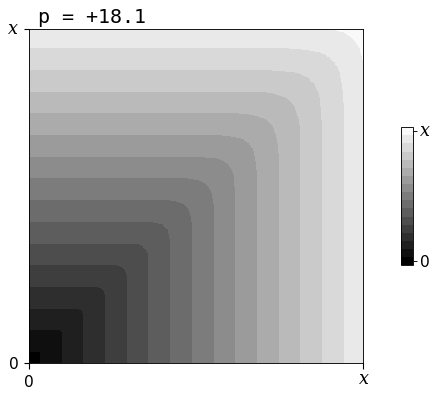


 81%|████████▏ | 502/617 [03:58<00:53,  2.13it/s]

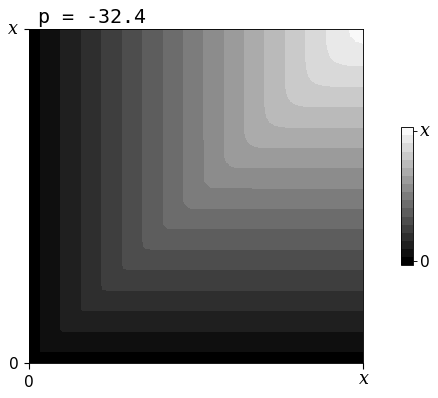


 82%|████████▏ | 503/617 [03:58<00:55,  2.07it/s]

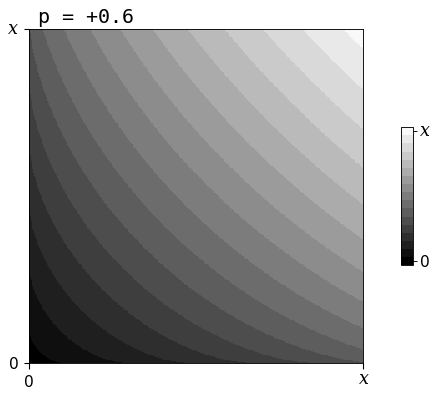


 82%|████████▏ | 504/617 [03:59<00:54,  2.09it/s]

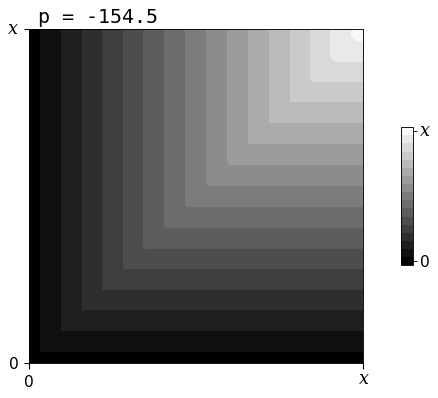


 82%|████████▏ | 505/617 [03:59<00:53,  2.09it/s]

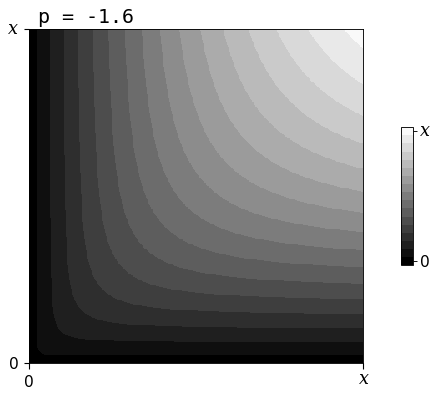


 82%|████████▏ | 506/617 [04:00<00:52,  2.11it/s]

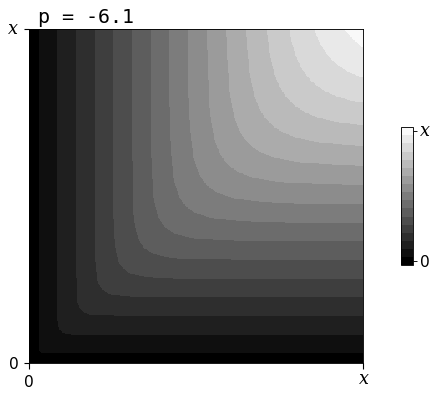


 82%|████████▏ | 507/617 [04:00<00:52,  2.10it/s]

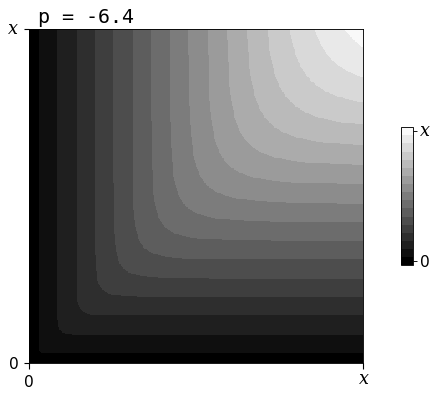


 82%|████████▏ | 508/617 [04:01<00:51,  2.12it/s]

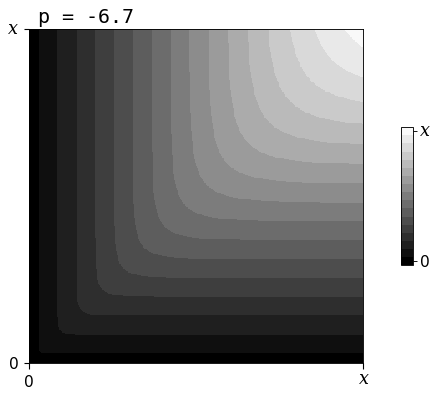


 82%|████████▏ | 509/617 [04:01<00:51,  2.12it/s]

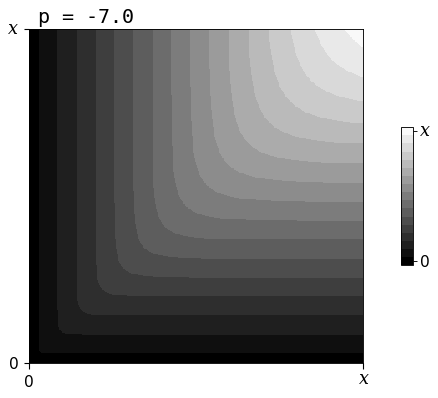


 83%|████████▎ | 510/617 [04:01<00:50,  2.12it/s]

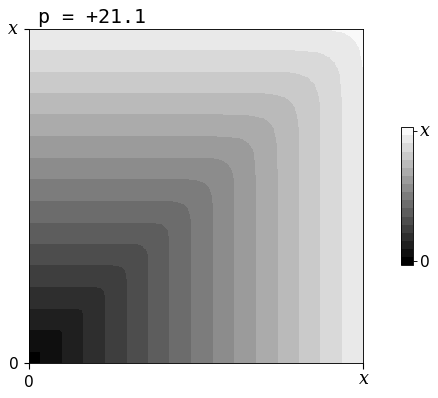


 83%|████████▎ | 511/617 [04:02<00:49,  2.13it/s]

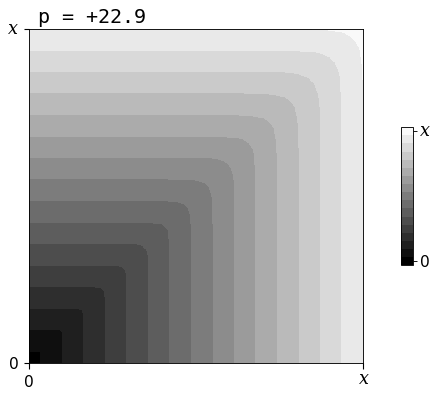


 83%|████████▎ | 512/617 [04:02<00:49,  2.13it/s]

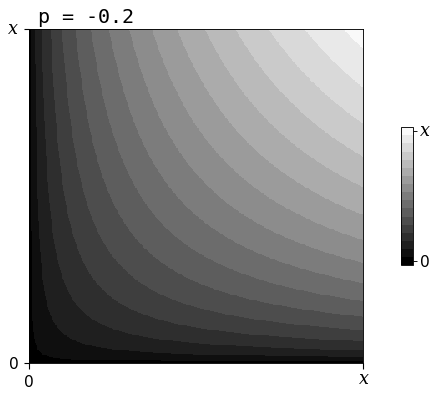


 83%|████████▎ | 513/617 [04:03<00:48,  2.12it/s]

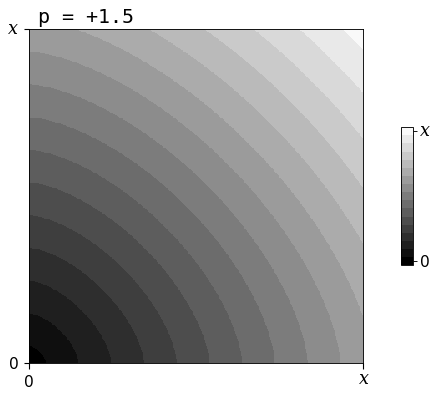


 83%|████████▎ | 514/617 [04:03<00:50,  2.05it/s]

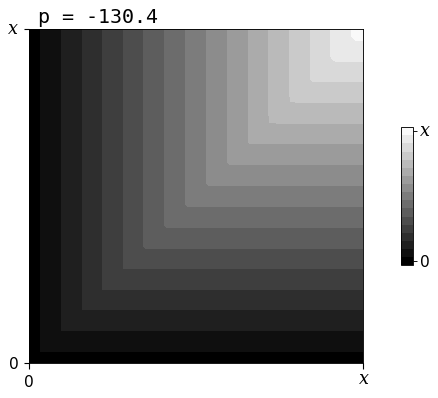


 83%|████████▎ | 515/617 [04:04<00:49,  2.07it/s]

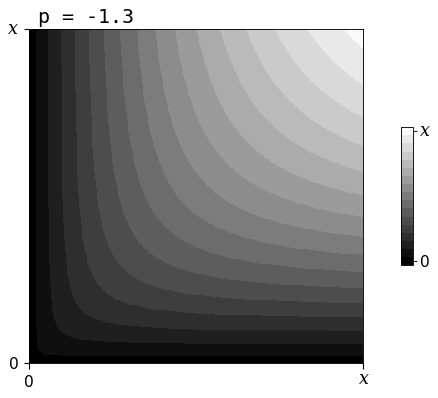


 84%|████████▎ | 516/617 [04:04<00:48,  2.09it/s]

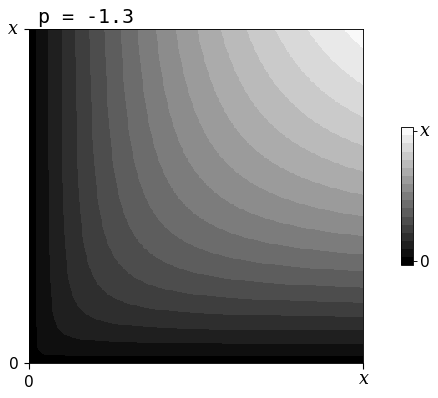


 84%|████████▍ | 517/617 [04:05<00:47,  2.09it/s]

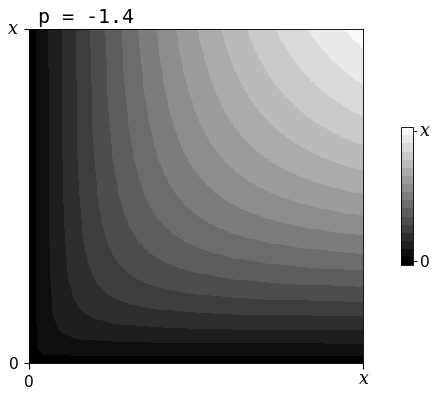


 84%|████████▍ | 518/617 [04:05<00:47,  2.10it/s]

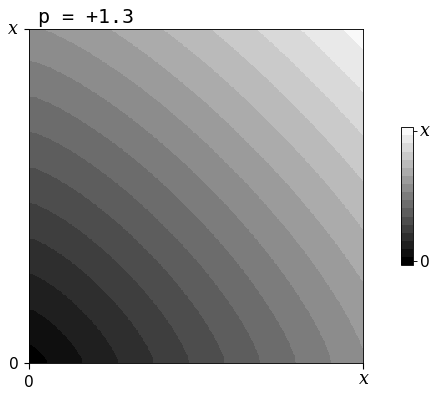


 84%|████████▍ | 519/617 [04:06<00:46,  2.10it/s]

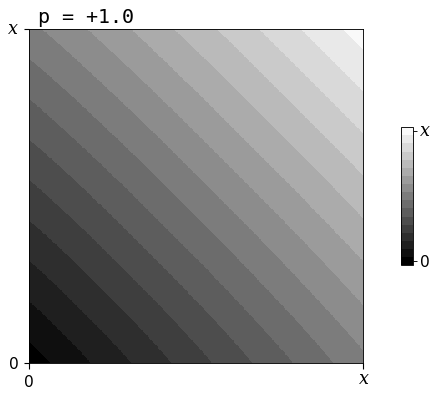


 84%|████████▍ | 520/617 [04:06<00:45,  2.11it/s]

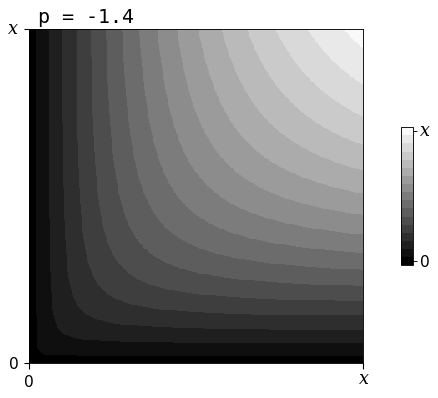


 84%|████████▍ | 521/617 [04:07<00:45,  2.11it/s]

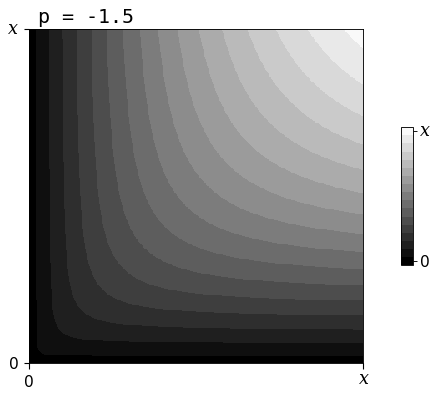


 85%|████████▍ | 522/617 [04:07<00:44,  2.11it/s]

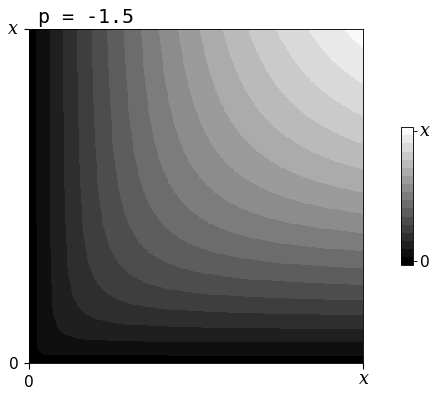


 85%|████████▍ | 523/617 [04:08<00:44,  2.11it/s]

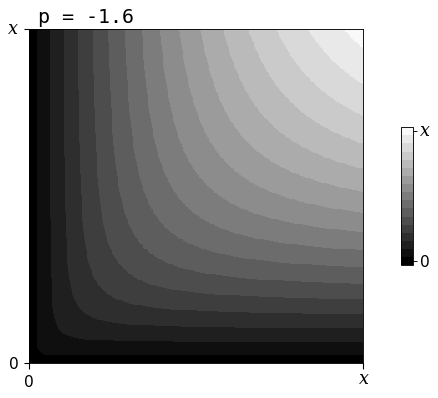


 85%|████████▍ | 524/617 [04:08<00:43,  2.12it/s]

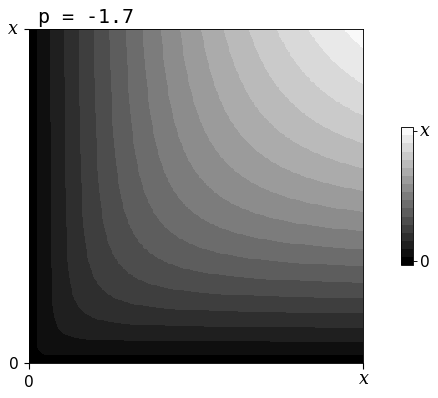


 85%|████████▌ | 525/617 [04:09<00:44,  2.06it/s]

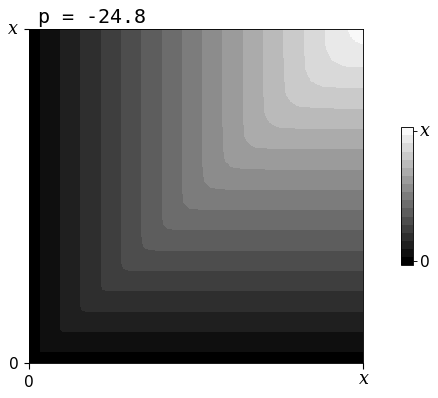


 85%|████████▌ | 526/617 [04:09<00:43,  2.08it/s]

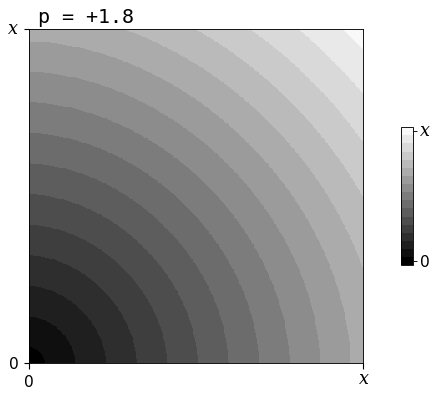


 85%|████████▌ | 527/617 [04:10<00:42,  2.10it/s]

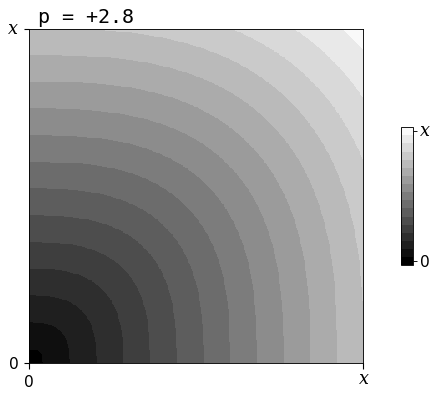


 86%|████████▌ | 528/617 [04:10<00:42,  2.11it/s]

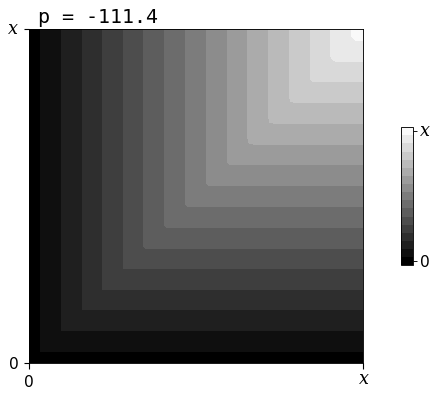


 86%|████████▌ | 529/617 [04:11<00:41,  2.10it/s]

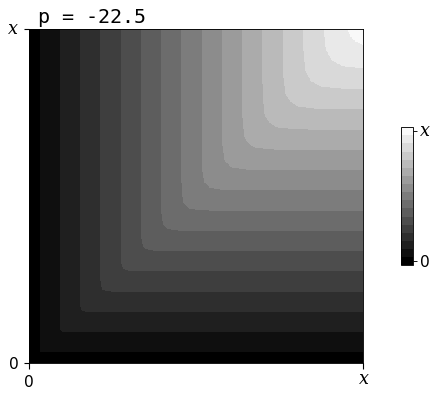


 86%|████████▌ | 530/617 [04:11<00:41,  2.11it/s]

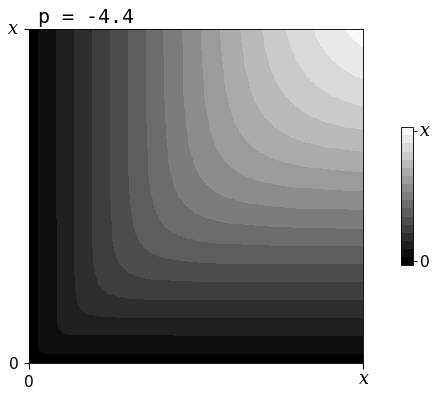


 86%|████████▌ | 531/617 [04:11<00:40,  2.12it/s]

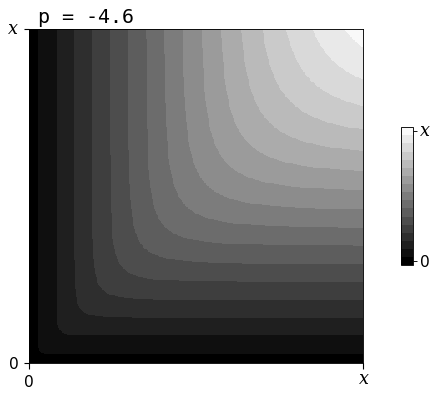


 86%|████████▌ | 532/617 [04:12<00:39,  2.13it/s]

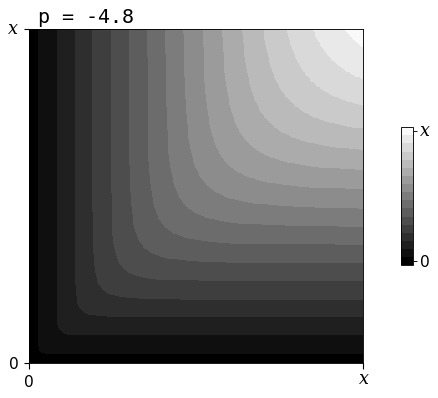


 86%|████████▋ | 533/617 [04:12<00:39,  2.13it/s]

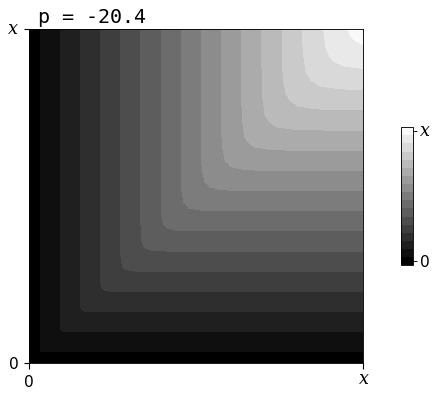


 87%|████████▋ | 534/617 [04:13<00:39,  2.13it/s]

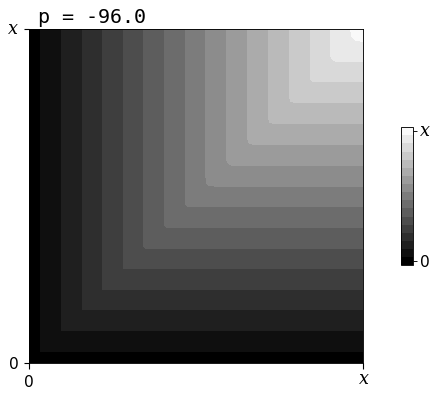


 87%|████████▋ | 535/617 [04:13<00:38,  2.12it/s]

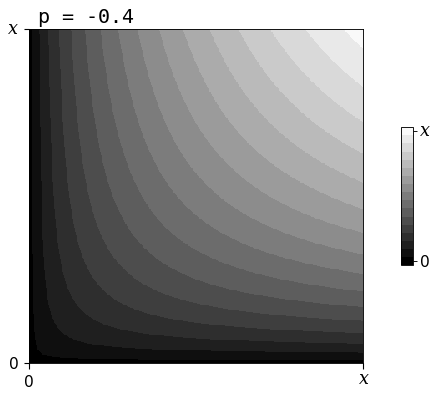


 87%|████████▋ | 536/617 [04:14<00:39,  2.07it/s]

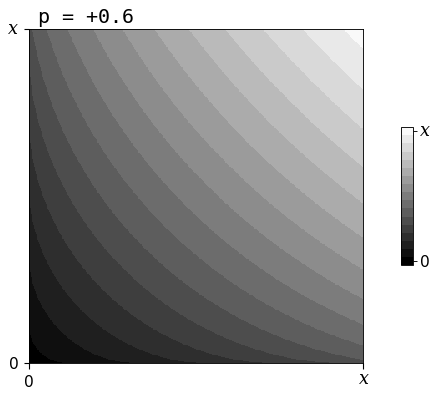


 87%|████████▋ | 537/617 [04:14<00:38,  2.08it/s]

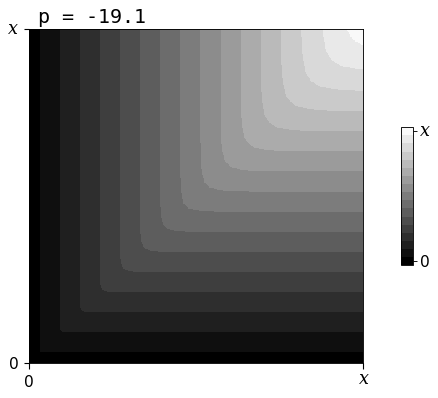


 87%|████████▋ | 538/617 [04:15<00:37,  2.09it/s]

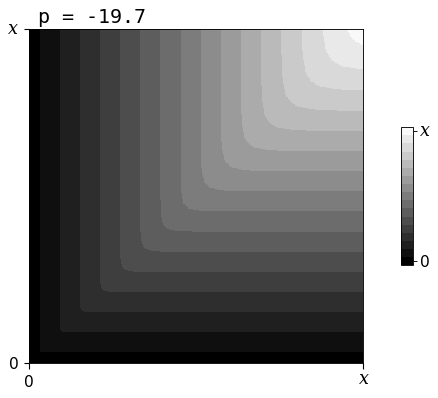


 87%|████████▋ | 539/617 [04:15<00:37,  2.11it/s]

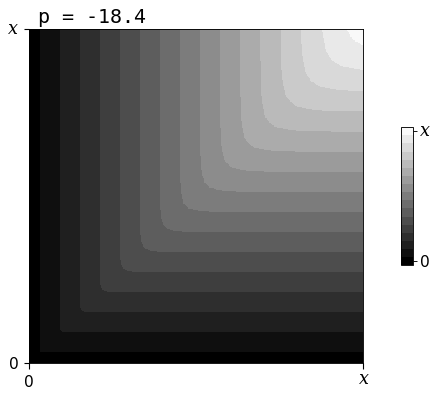


 88%|████████▊ | 540/617 [04:16<00:36,  2.11it/s]

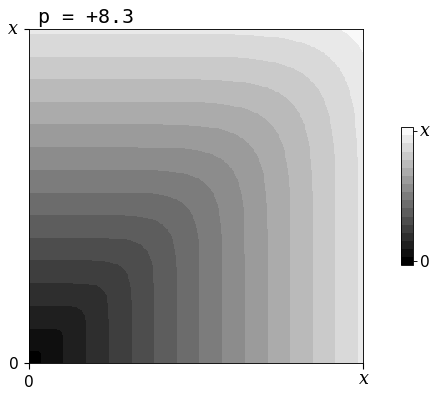


 88%|████████▊ | 541/617 [04:16<00:35,  2.12it/s]

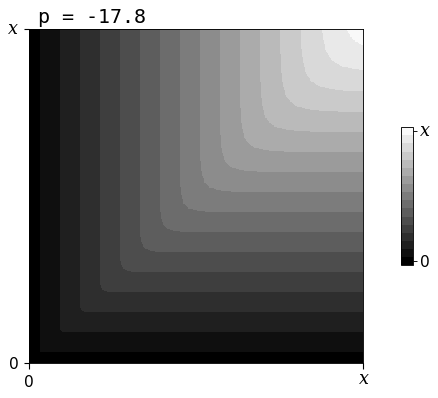


 88%|████████▊ | 542/617 [04:17<00:35,  2.12it/s]

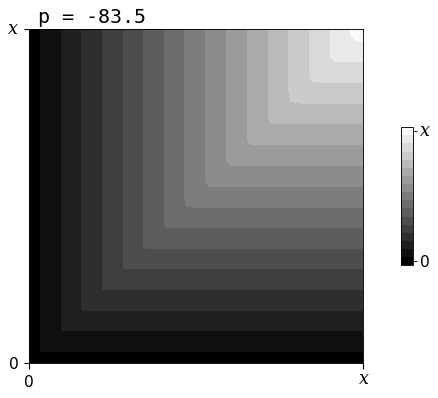


 88%|████████▊ | 543/617 [04:17<00:35,  2.11it/s]

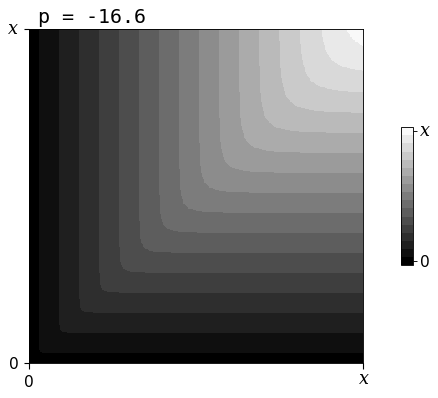


 88%|████████▊ | 544/617 [04:18<00:34,  2.11it/s]

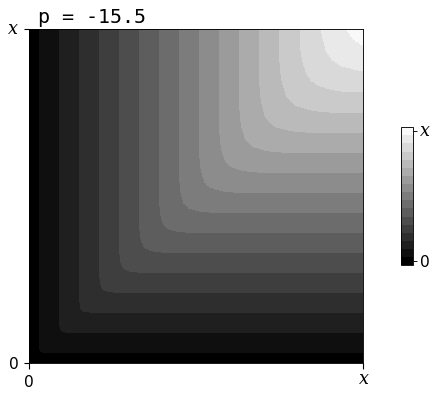


 88%|████████▊ | 545/617 [04:18<00:34,  2.11it/s]

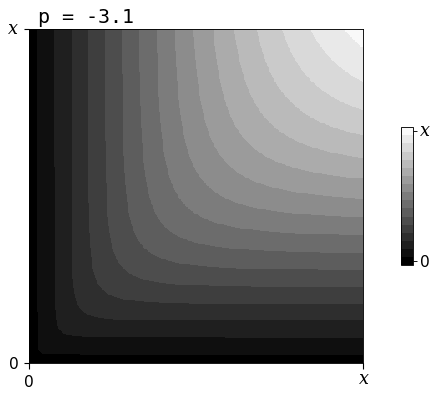


 88%|████████▊ | 546/617 [04:19<00:33,  2.12it/s]

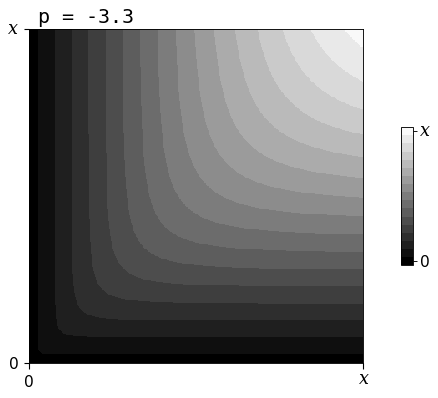


 89%|████████▊ | 547/617 [04:19<00:34,  2.05it/s]

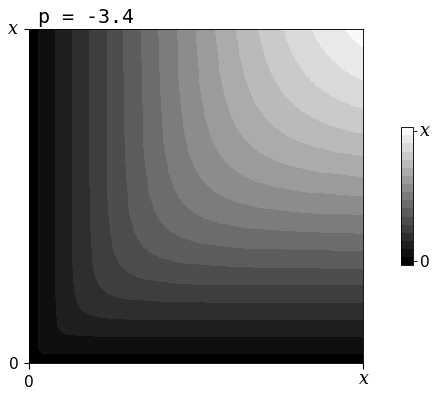


 89%|████████▉ | 548/617 [04:20<00:33,  2.08it/s]

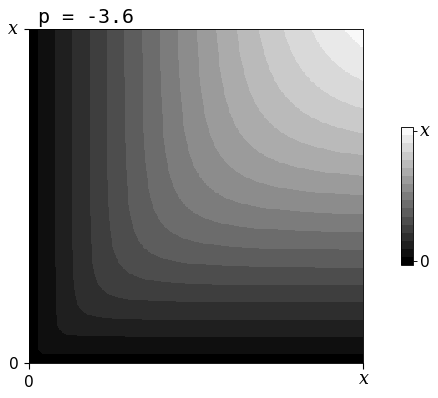


 89%|████████▉ | 549/617 [04:20<00:32,  2.10it/s]

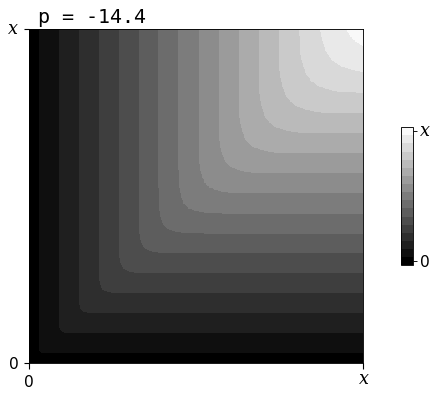


 89%|████████▉ | 550/617 [04:21<00:31,  2.11it/s]

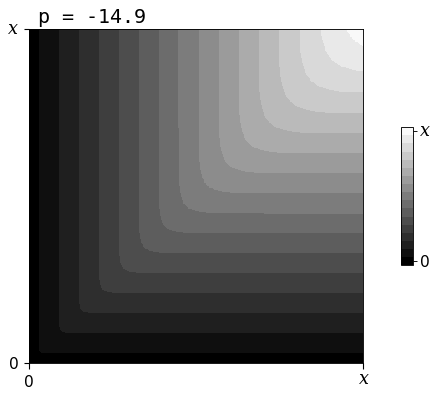


 89%|████████▉ | 551/617 [04:21<00:31,  2.12it/s]

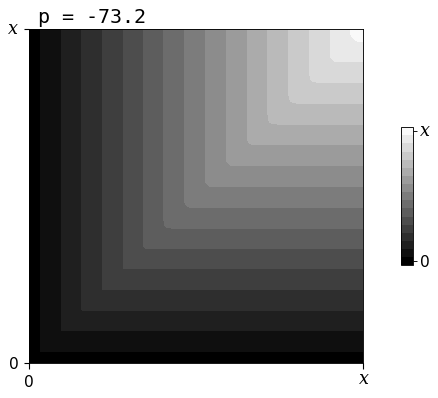


 89%|████████▉ | 552/617 [04:21<00:30,  2.12it/s]

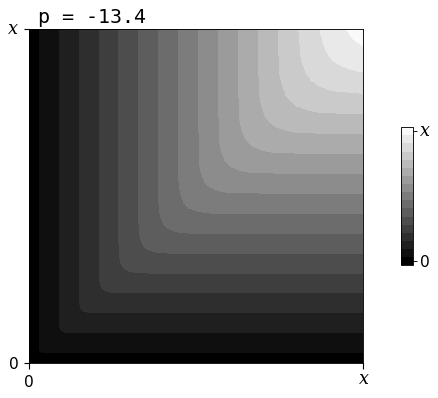


 90%|████████▉ | 553/617 [04:22<00:30,  2.10it/s]

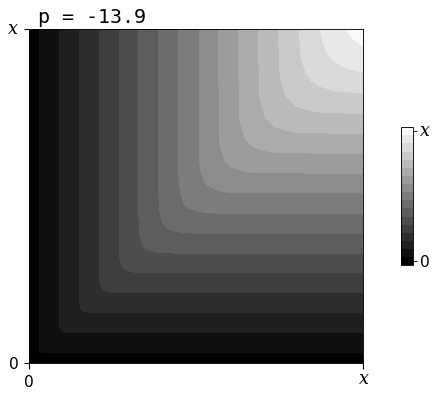


 90%|████████▉ | 554/617 [04:22<00:29,  2.11it/s]

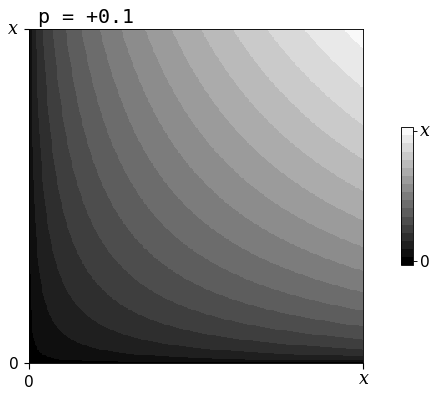


 90%|████████▉ | 555/617 [04:23<00:29,  2.10it/s]

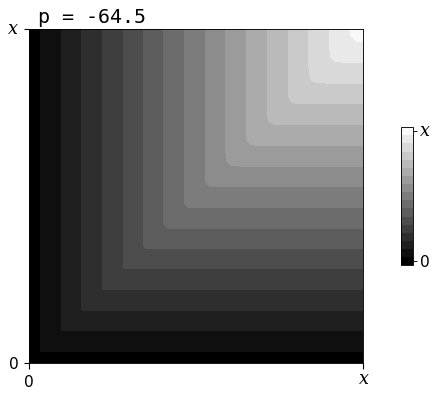


 90%|█████████ | 556/617 [04:23<00:28,  2.11it/s]

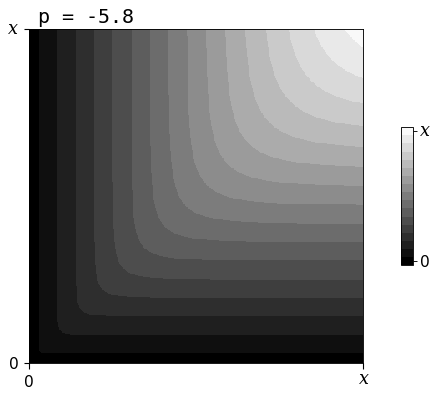


 90%|█████████ | 557/617 [04:24<00:28,  2.12it/s]

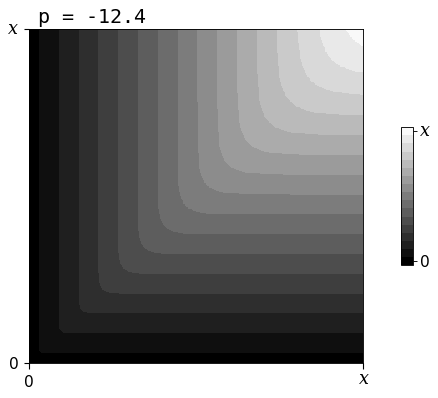


 90%|█████████ | 558/617 [04:24<00:28,  2.05it/s]

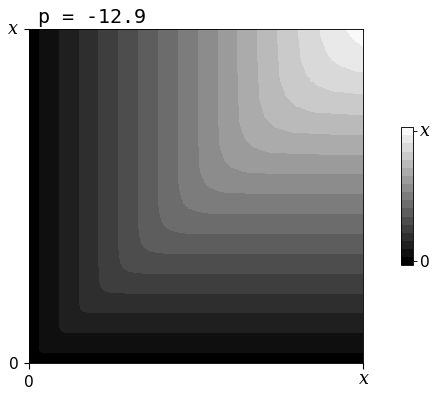


 91%|█████████ | 559/617 [04:25<00:27,  2.08it/s]

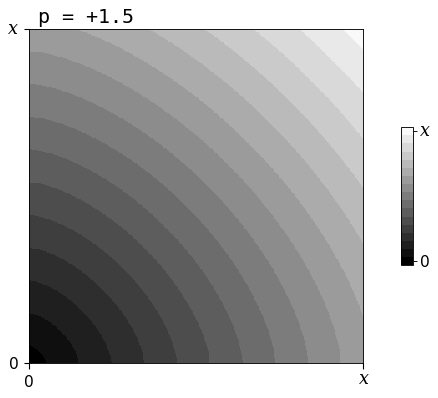


 91%|█████████ | 560/617 [04:25<00:27,  2.10it/s]

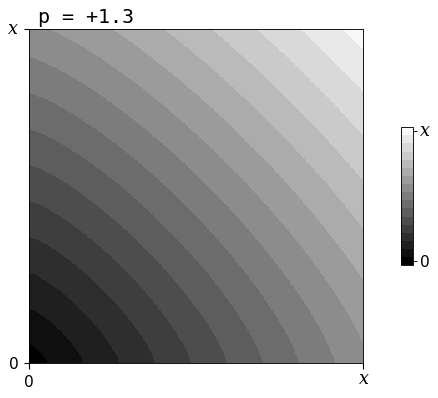


 91%|█████████ | 561/617 [04:26<00:26,  2.11it/s]

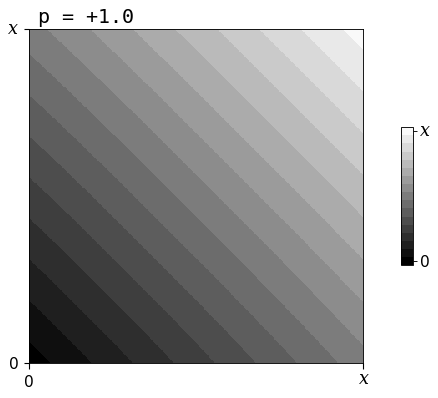


 91%|█████████ | 562/617 [04:26<00:25,  2.12it/s]

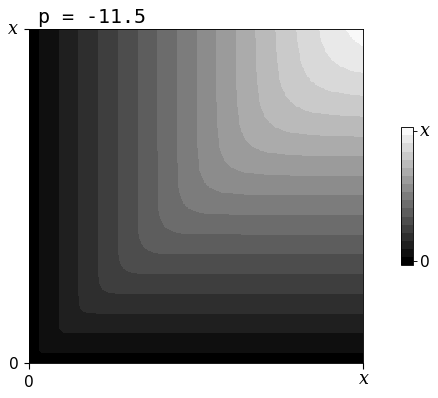


 91%|█████████ | 563/617 [04:27<00:25,  2.12it/s]

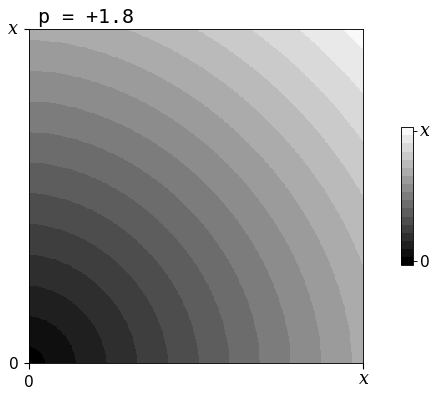


 91%|█████████▏| 564/617 [04:27<00:24,  2.13it/s]

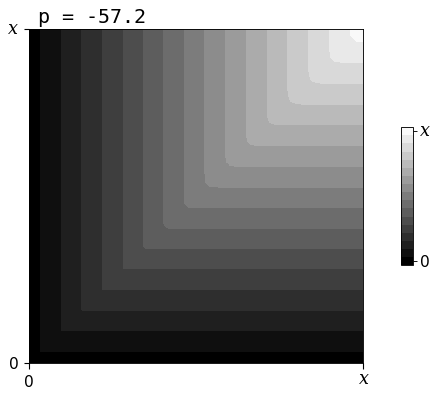


 92%|█████████▏| 565/617 [04:28<00:24,  2.12it/s]

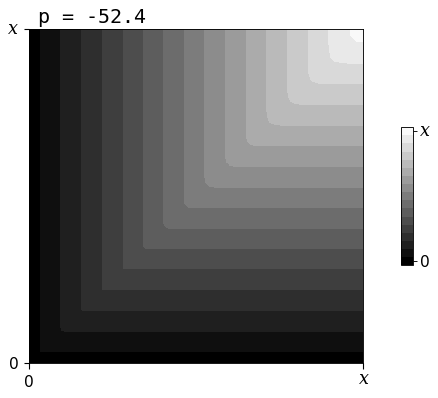


 92%|█████████▏| 566/617 [04:28<00:23,  2.13it/s]

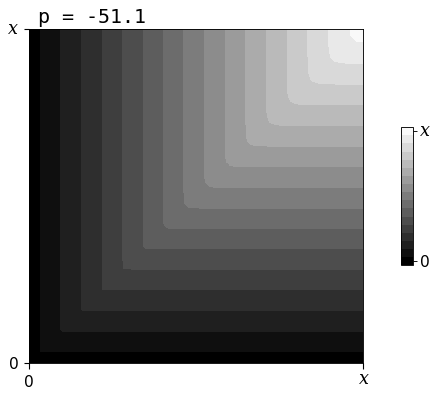


 92%|█████████▏| 567/617 [04:29<00:23,  2.13it/s]

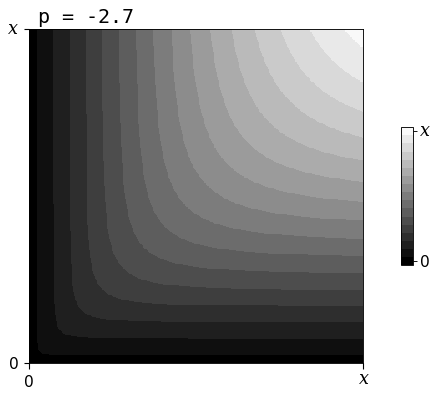


 92%|█████████▏| 568/617 [04:29<00:23,  2.13it/s]

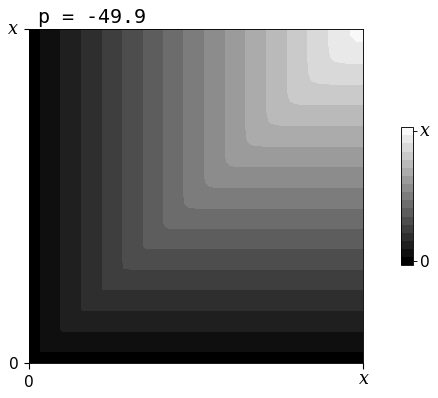


 92%|█████████▏| 569/617 [04:30<00:23,  2.06it/s]

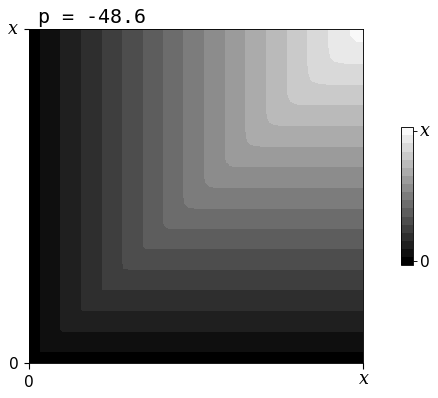


 92%|█████████▏| 570/617 [04:30<00:22,  2.08it/s]

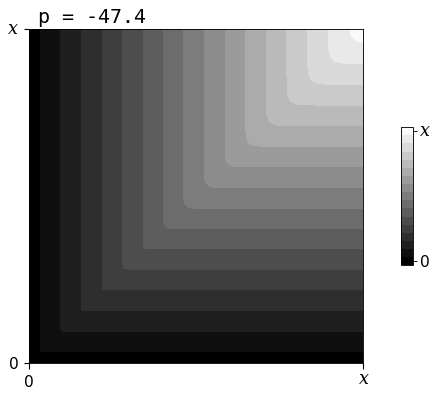


 93%|█████████▎| 571/617 [04:30<00:21,  2.11it/s]

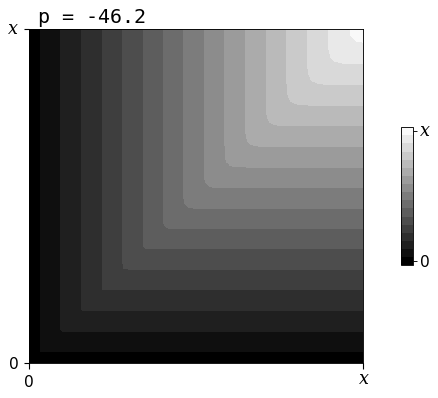


 93%|█████████▎| 572/617 [04:31<00:21,  2.12it/s]

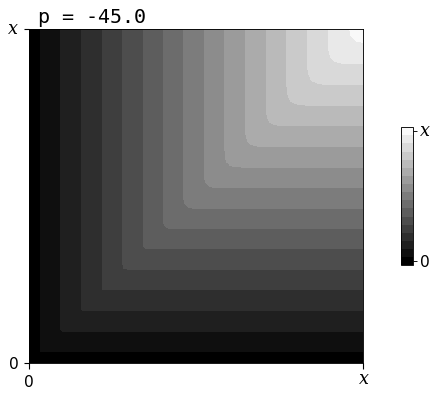


 93%|█████████▎| 573/617 [04:31<00:20,  2.12it/s]

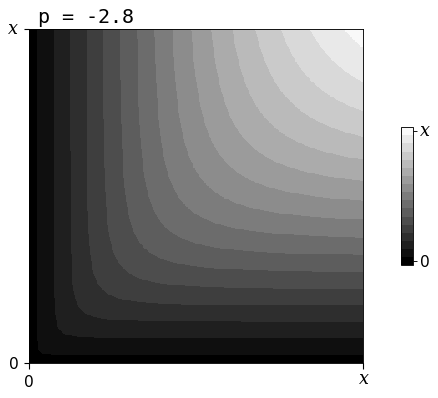


 93%|█████████▎| 574/617 [04:32<00:20,  2.13it/s]

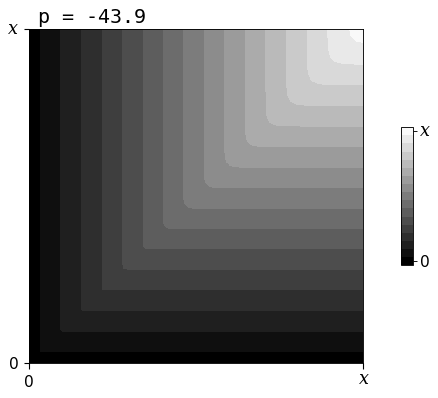


 93%|█████████▎| 575/617 [04:32<00:19,  2.14it/s]

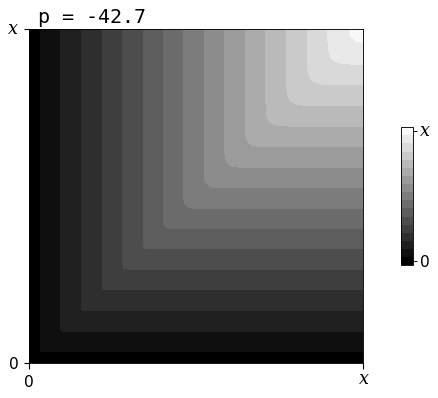


 93%|█████████▎| 576/617 [04:33<00:19,  2.13it/s]

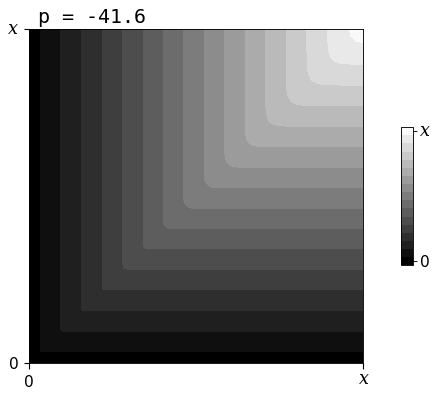


 94%|█████████▎| 577/617 [04:33<00:18,  2.12it/s]

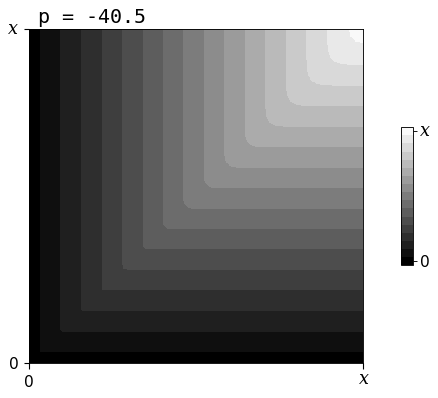


 94%|█████████▎| 578/617 [04:34<00:18,  2.12it/s]

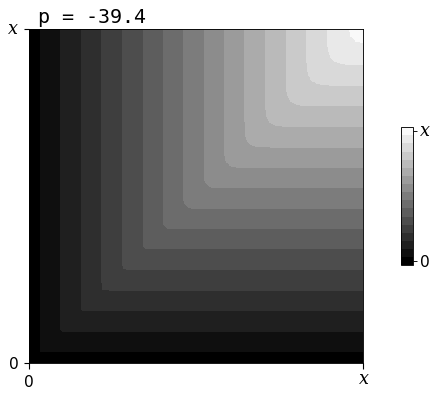


 94%|█████████▍| 579/617 [04:34<00:17,  2.12it/s]

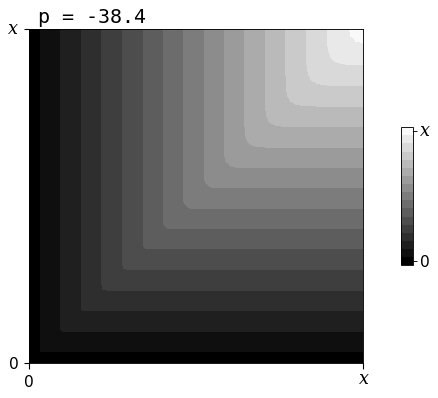


 94%|█████████▍| 580/617 [04:35<00:18,  2.05it/s]

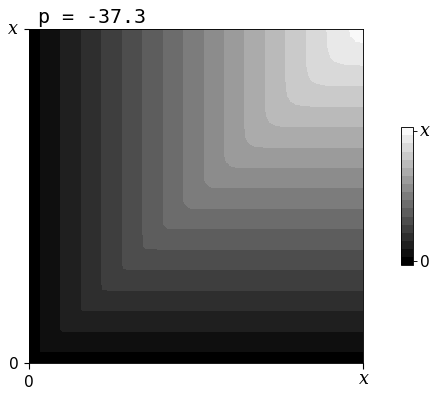


 94%|█████████▍| 581/617 [04:35<00:17,  2.08it/s]

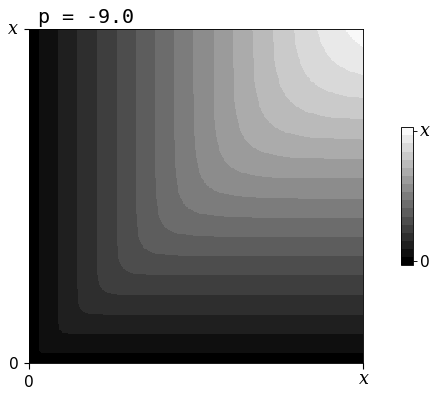


 94%|█████████▍| 582/617 [04:36<00:16,  2.09it/s]

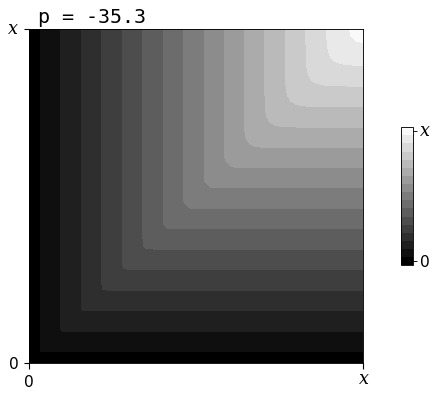


 94%|█████████▍| 583/617 [04:36<00:16,  2.10it/s]

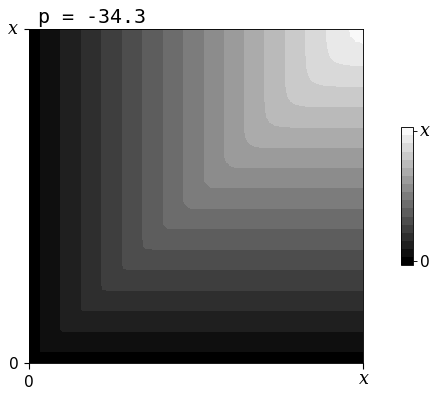


 95%|█████████▍| 584/617 [04:37<00:15,  2.11it/s]

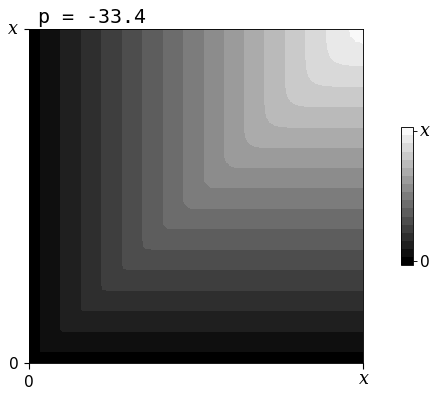


 95%|█████████▍| 585/617 [04:37<00:15,  2.11it/s]

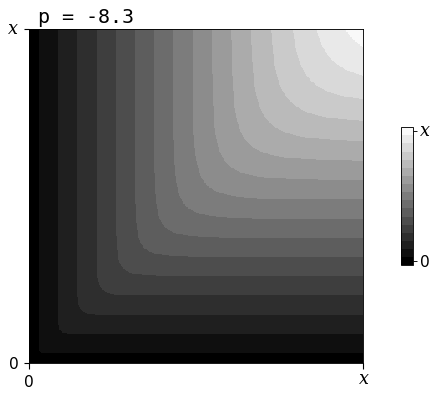


 95%|█████████▍| 586/617 [04:38<00:14,  2.12it/s]

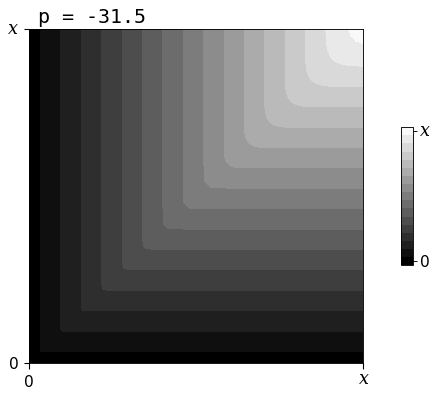


 95%|█████████▌| 587/617 [04:38<00:14,  2.12it/s]

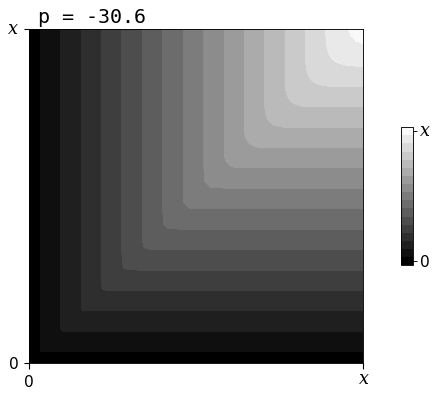


 95%|█████████▌| 588/617 [04:39<00:13,  2.13it/s]

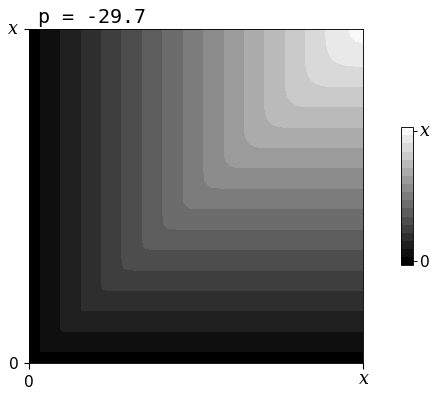


 95%|█████████▌| 589/617 [04:39<00:13,  2.13it/s]

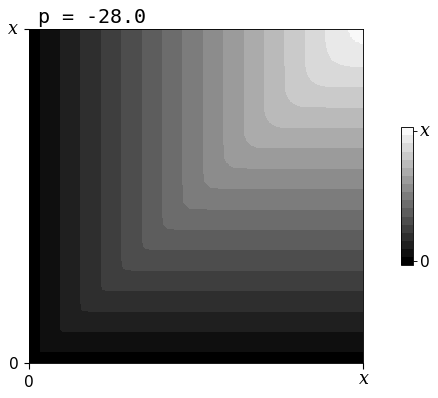


 96%|█████████▌| 590/617 [04:39<00:12,  2.13it/s]

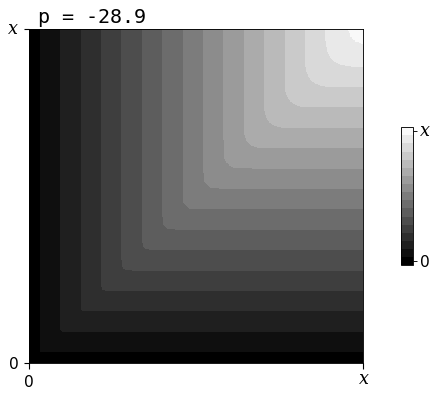


 96%|█████████▌| 591/617 [04:40<00:12,  2.07it/s]

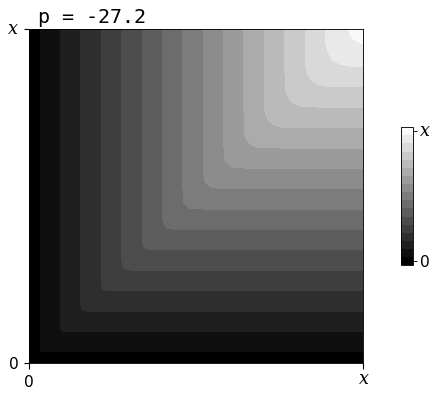


 96%|█████████▌| 592/617 [04:40<00:11,  2.09it/s]

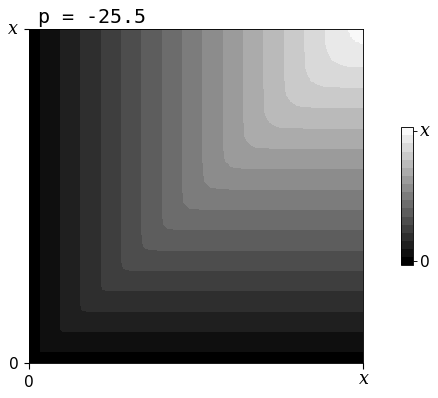


 96%|█████████▌| 593/617 [04:41<00:11,  2.11it/s]

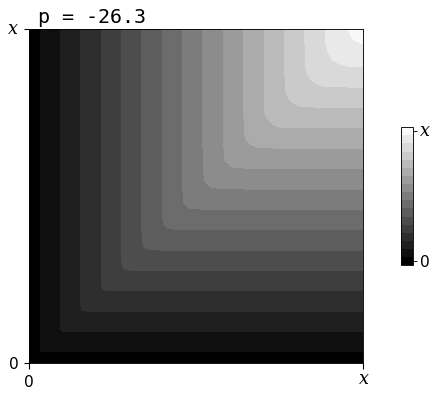


 96%|█████████▋| 594/617 [04:41<00:10,  2.11it/s]

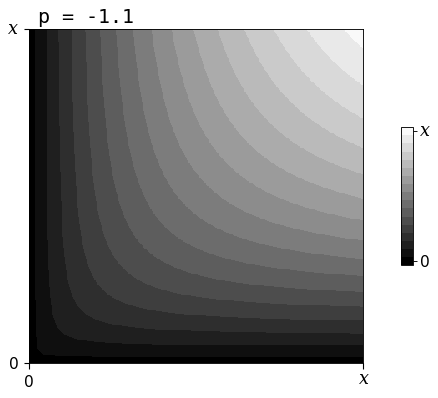


 96%|█████████▋| 595/617 [04:42<00:10,  2.12it/s]

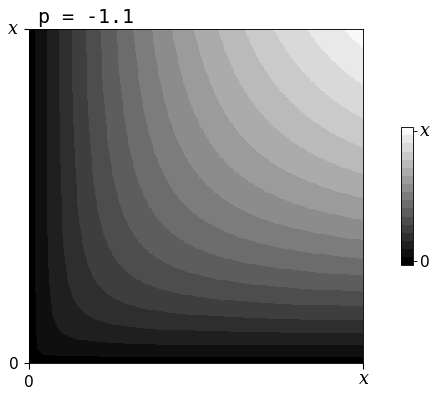


 97%|█████████▋| 596/617 [04:42<00:09,  2.12it/s]

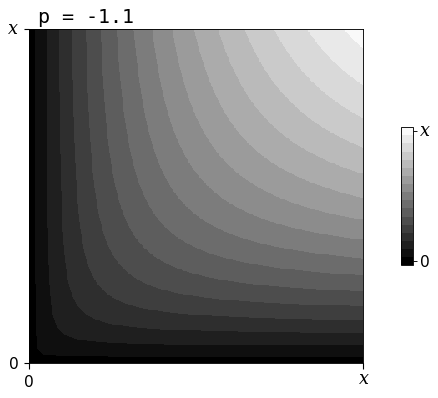


 97%|█████████▋| 597/617 [04:43<00:09,  2.13it/s]

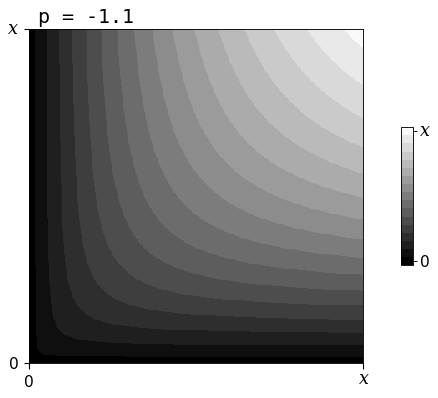


 97%|█████████▋| 598/617 [04:43<00:08,  2.12it/s]

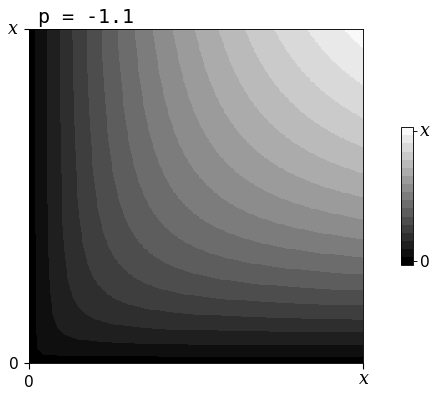


 97%|█████████▋| 599/617 [04:44<00:08,  2.13it/s]

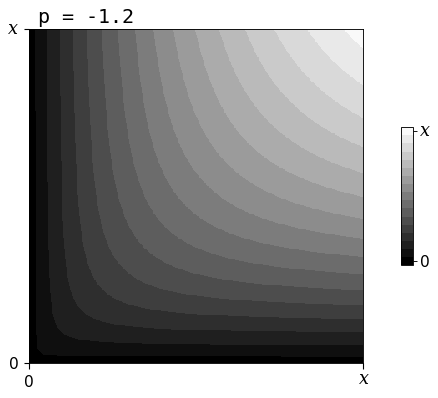


 97%|█████████▋| 600/617 [04:44<00:07,  2.13it/s]

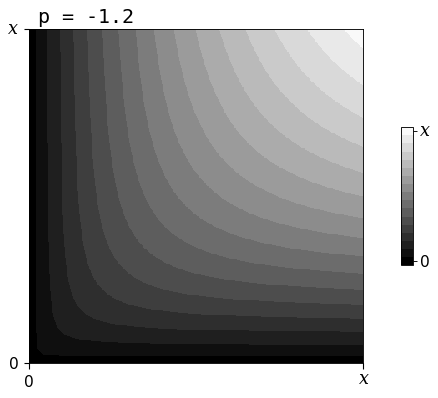


 97%|█████████▋| 601/617 [04:45<00:07,  2.14it/s]

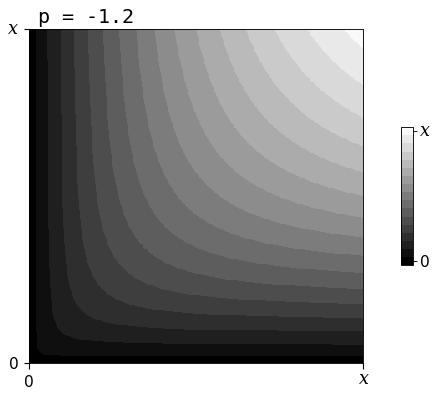


 98%|█████████▊| 602/617 [04:45<00:07,  2.06it/s]

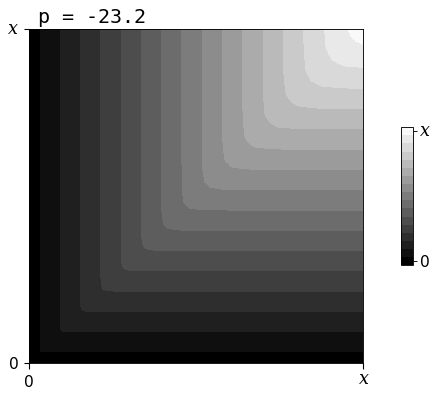


 98%|█████████▊| 603/617 [04:46<00:06,  2.08it/s]

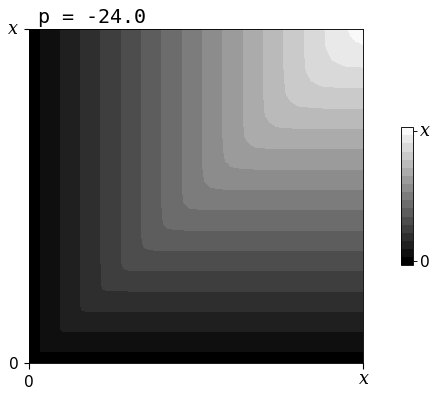


 98%|█████████▊| 604/617 [04:46<00:06,  2.10it/s]

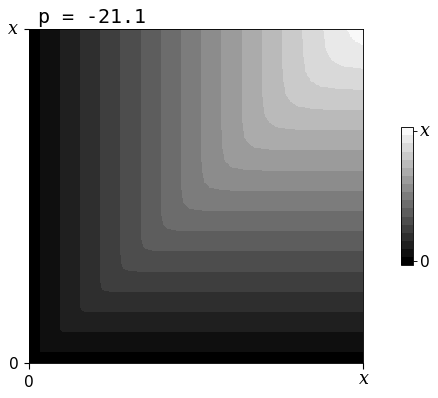


 98%|█████████▊| 605/617 [04:47<00:05,  2.11it/s]

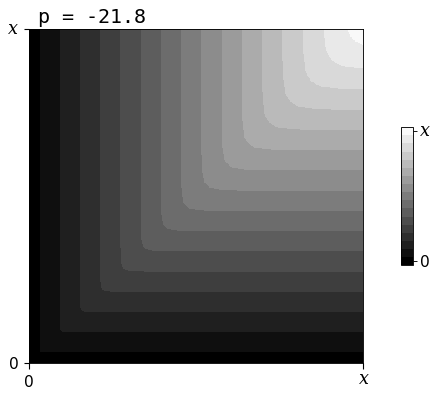


 98%|█████████▊| 606/617 [04:47<00:05,  2.13it/s]

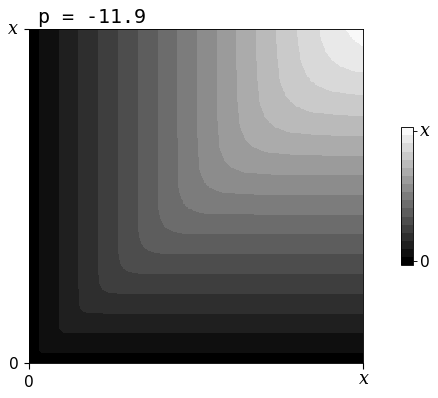


 98%|█████████▊| 607/617 [04:48<00:04,  2.13it/s]

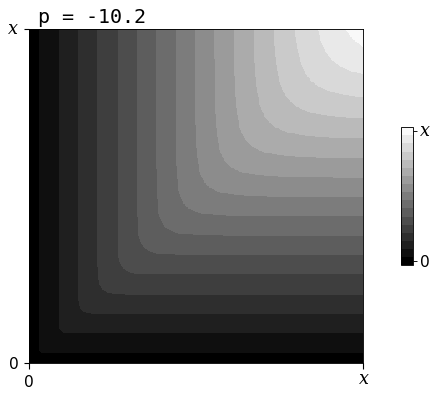


 99%|█████████▊| 608/617 [04:48<00:04,  2.13it/s]

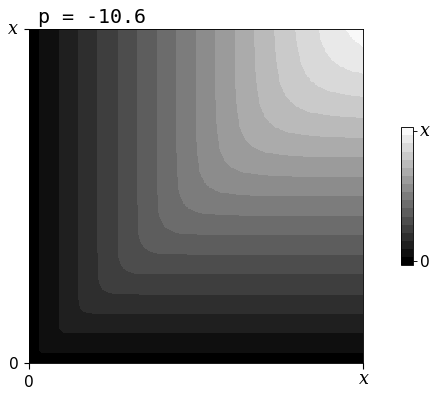


 99%|█████████▊| 609/617 [04:48<00:03,  2.13it/s]

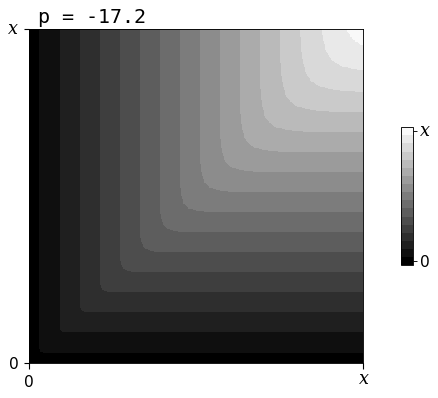


 99%|█████████▉| 610/617 [04:49<00:03,  2.13it/s]

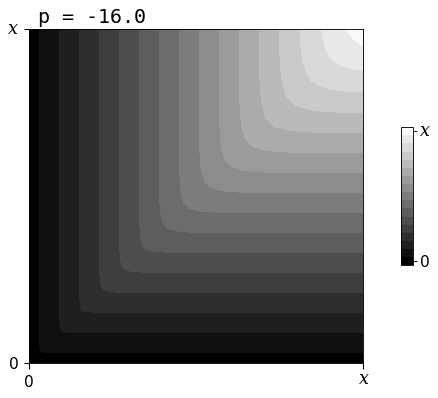


 99%|█████████▉| 611/617 [04:49<00:02,  2.13it/s]

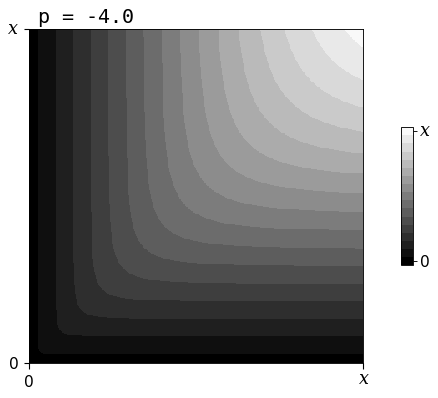


 99%|█████████▉| 612/617 [04:50<00:02,  2.13it/s]

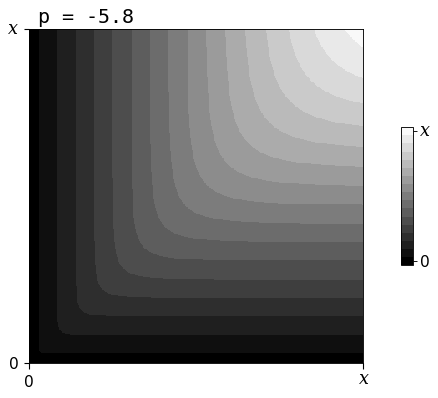


 99%|█████████▉| 613/617 [04:50<00:01,  2.07it/s]

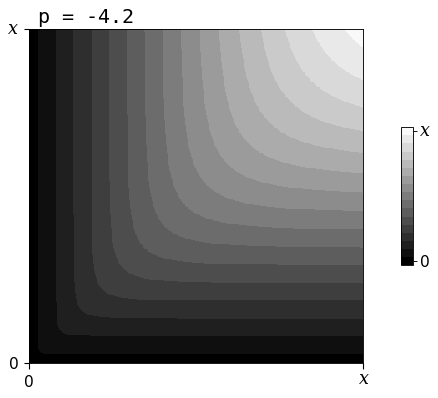


100%|█████████▉| 614/617 [04:51<00:01,  2.09it/s]

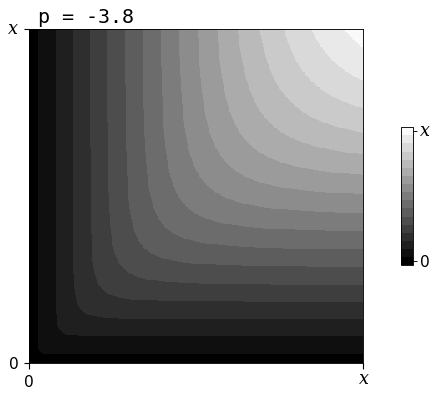


100%|█████████▉| 615/617 [04:51<00:00,  2.10it/s]

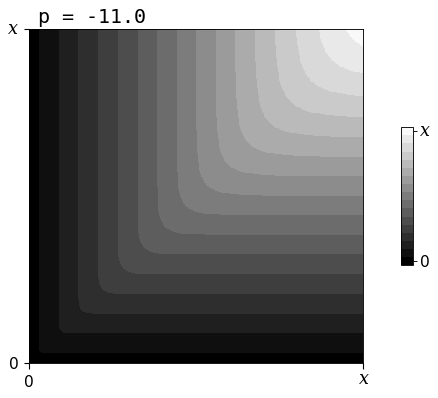


100%|█████████▉| 616/617 [04:52<00:00,  2.12it/s]

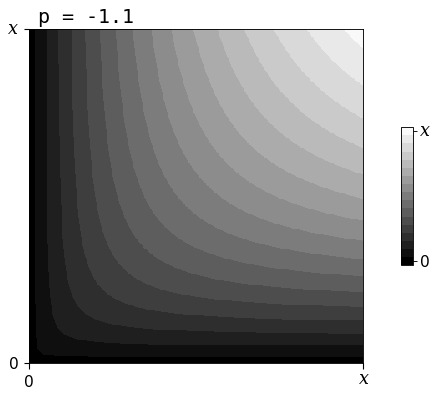


100%|██████████| 617/617 [04:52<00:00,  2.12it/s]

In [31]:
# render frames

all_frame_ps = list(set([
    p for anim in ANIMATIONS.values() for p in anim['frame_ps']
]))
generate_frames(tqdm.tqdm(all_frame_ps))

In [32]:
# compile frames into animated gifs

for name, anim in ANIMATIONS.items():
    print('reading')
    frames = [
        imageio.imread(frame_file(anim_frame_p))
        for anim_frame_p
        in anim['frame_ps']
    ]
    print('writing')
    imageio.mimwrite(
        f'animations/{name}.gif',
        tqdm.tqdm(frames),
        duration=anim['durations'],
        format='GIF-PIL' # to preserve transparency
    )

reading



  7%|▋         | 7/100 [00:00<00:01, 63.89it/s]

writing



100%|██████████| 100/100 [00:01<00:00, 64.10it/s]

reading



  6%|▌         | 7/120 [00:00<00:01, 68.06it/s]

writing



100%|██████████| 120/120 [00:01<00:00, 66.15it/s]

reading



  6%|▌         | 7/126 [00:00<00:01, 65.61it/s]

writing



100%|██████████| 126/126 [00:01<00:00, 66.08it/s]

reading



  6%|▌         | 7/120 [00:00<00:01, 68.56it/s]

writing



100%|██████████| 120/120 [00:01<00:00, 66.18it/s]

reading



  2%|▏         | 7/302 [00:00<00:04, 64.87it/s]

writing



100%|██████████| 302/302 [00:04<00:00, 67.69it/s]